# 응용통계학 (6주차) 4월 14일
> 모형 진단

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics, 모형 진단]

In [1]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

## 응용통계학 : 모형 진단

선형모형에서 추정량의 특정 성질이나 이후 추론과정들은 모형의 가정에 의존하게 된다. 즉, 가정에 대한 검토과정이 정당성을 획득하기 위해 필요한 절차이다. 모형 가정에 대한 이슈는 다음과 같이 요약될 수 있다.
- $y = X\beta + \epsilon$
1. 오차항 가정
2. 모형가정

1. 오차항 : 정규성, 등분산성, 독립성
    - stochastic part; Stochastic refers to the property of being well described by a random probability distribution.
2. 모형 : $ E(y)=Xβ $ : 선형성
    - deterministric part = symmetric part
3. 특이 관측치 : 간혹 소수의 관측치들이 모형에 잘 맞지 않아 모형 전체에 영향을 미칠 수 있다.
    - outlier 있나?
    - 어떻게 처리해서 모델을 봐 볼까?

## Checking error assumptions

오차항을 관측 불가하므로 잔차에 기반하여 가정을 검토한다.

$$e=y−X\hat{β}=(I−H)y.$$

오차항은 서로 독립이더라도 잔차들은 그렇지 않음을 유의하자.

### constant variance (등분산성)

$e_i$ vs $\hat{y}_i$(x축 vs y축) 산점도(residual plot)가 가장 기본이 되는 진단 방법이다. 만약 가정이 모두 만족된다면 수직축 기준으로 대칭적이고 일정한 정도를 보이는 변동만이 나타날 것이다.

- Note : 가로축에 설명변수를 넣은 산점도를 이용하기도 한다.
    - Simple linear에서 $\hat{y} = \hat{\beta}_0 + \hat{\beta}x$ 이니까 $\epsilon$ vs $\hat{y}$ 나 $\epsilon$ vs $x$ 나 거의 같다.

![](https://i.stack.imgur.com/rtn7e.png)

In [2]:
library(faraway)

In [3]:
data(savings,package="faraway")
str(savings)

'data.frame':	50 obs. of  5 variables:
 $ sr   : num  11.43 12.07 13.17 5.75 12.88 ...
 $ pop15: num  29.4 23.3 23.8 41.9 42.2 ...
 $ pop75: num  2.87 4.41 4.43 1.67 0.83 2.85 1.34 0.67 1.06 1.14 ...
 $ dpi  : num  2330 1508 2108 189 728 ...
 $ ddpi : num  2.87 3.93 3.82 0.22 4.56 2.43 2.67 6.51 3.08 2.8 ...


- `sr`: savings rate - personal saving divided by disposable income
- `pop15`: percent population under age of 15
- `pop75`: percent population over age of 75
- `dpi`: per-capita disposable income in dollars
- `ddpi`: percent growth rate of dpi

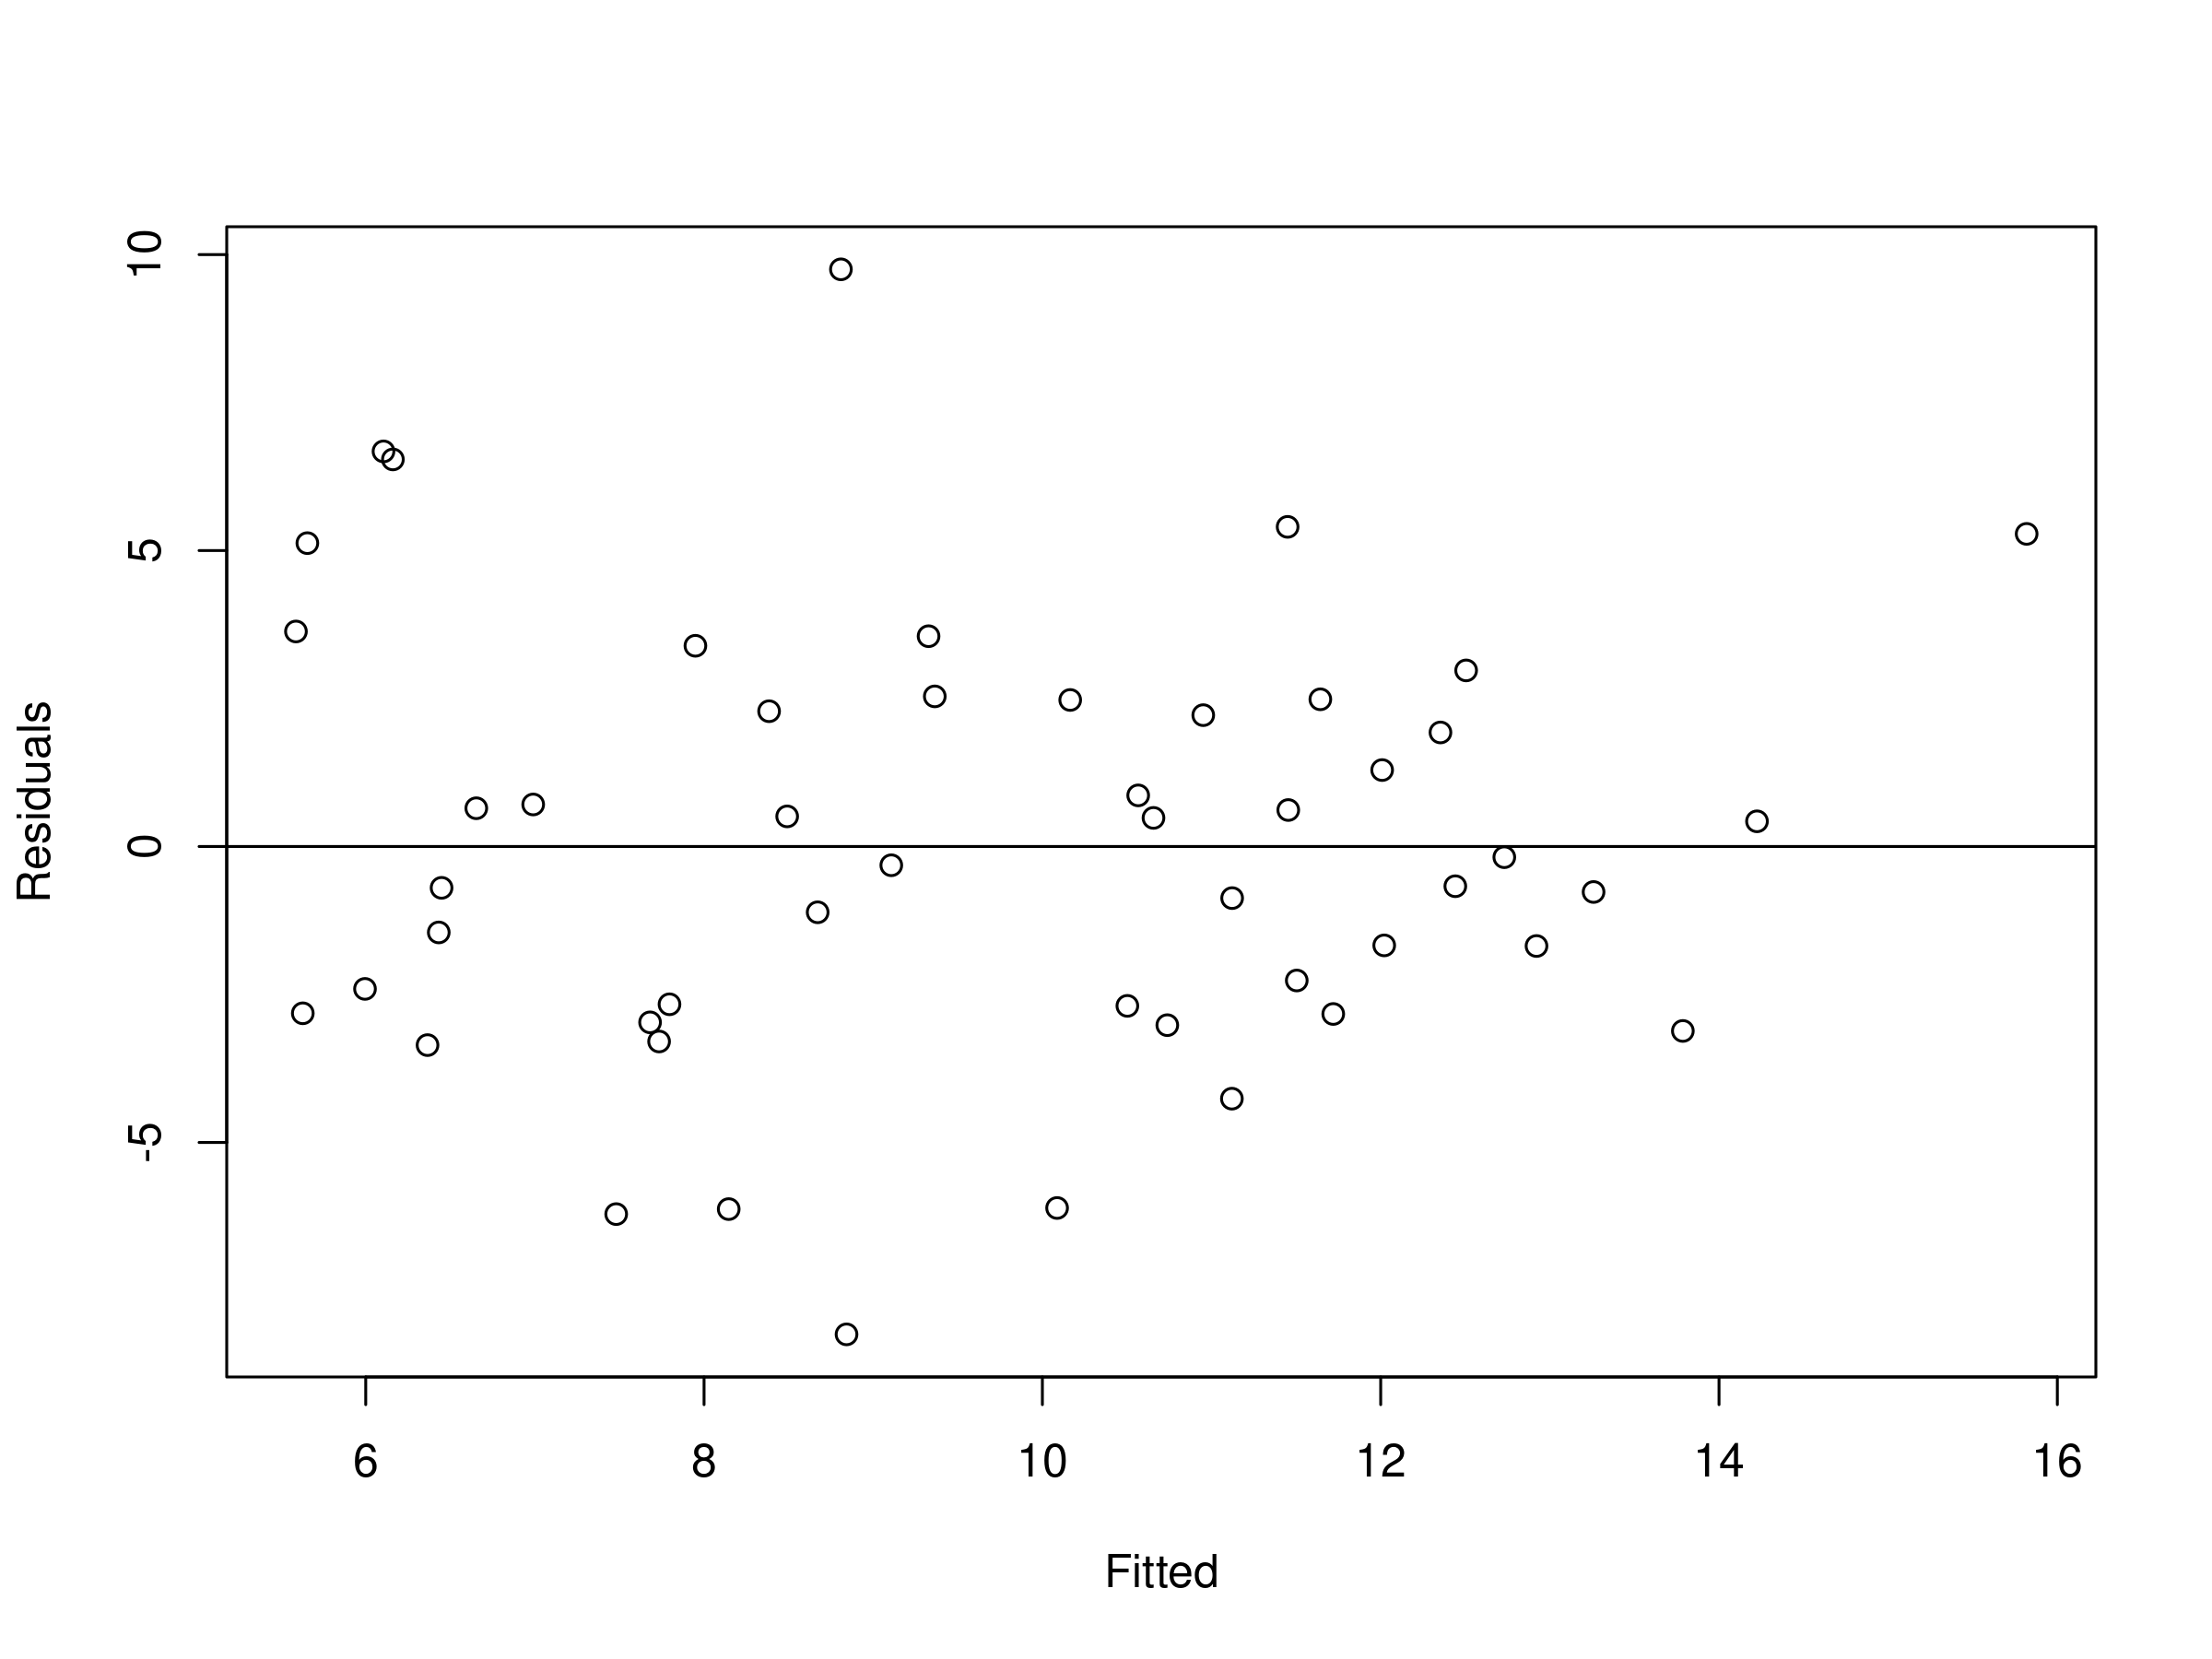

In [4]:
lmod <- lm(sr ~ pop15+pop75+dpi+ddpi,savings)
plot(fitted(lmod),residuals(lmod),xlab="Fitted",ylab="Residuals")
abline(h=0)

Q. What do you see in this plot?
- fitted value 가장 끝(오른)쪽 데이터 갈수록 작아지는 거 아닌가? 의심, 하지만 뒤로 갈수록 데이터가 없으니 모른다..$\rightarrow $ 주관적

In [34]:
library(car)

In [6]:
ncvTest(lmod)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.274365, Df = 1, p = 0.13153

등분산 검정 패키지, 
- $H_0$ : 등분산, $H_1$ : 이분산
- p값을 보니 유의수준 5%에서 기각 못하니, 귀무가설 기각한다는 증거가 없다.
- 따라서 등분산이다.

문제가 발견되었을 때 몇가지 해결책

1. 이분산성과 함께 비선형 추세가 보이는 경우 설명변수에 대한 적절한 변환이 필요할 수 있다.
    - log 등
    - 하지만 해석이 달라지지 않을까?
2. 이분산성만이 순수하게 관측되는 경우 가중최소제곱법 활용가능.
    - 최소제곱법에 비해 추정량 성질이 좋아지고, 모형 가정도 만족한다.
    - 하지만 실제 활용이 어렵다.
        - $\sum \frac{1}{w}(y_i - X\beta)^2$ 이런 식으로..하지만 등분산 가정이 깨진다.
        - $\frac{1}{w} \rightarrow var(y_i) = \sigma^2 w_i$
3. 반응변수에 대한 변환을 통해 등분산을 만족하도록 할 수 있다.
    - $h(y)$ 분산 안정화 변환 $\rightarrow$ 쓰는 분야만 쓰는 경향.. 너무 전통적인 방법이다. 변환하면 해석이 달라져 모델을 세운 의미가 없을 수 있다.

**gala**: Species diversity on the Galapagos Islands
- `Species` : the number of plant species found on the island
- `Endemics` : the number of endemic species
- `Area` : the area of the island (km$^2$)
- `Elevation` : the highest elevation of the island (m)
- `Nearest` : the distance from the nearest island (km)
- `Scruz` : the distance from Santa Cruz island (km)
- `Adjacent` : the area of the adjacent island (square km)

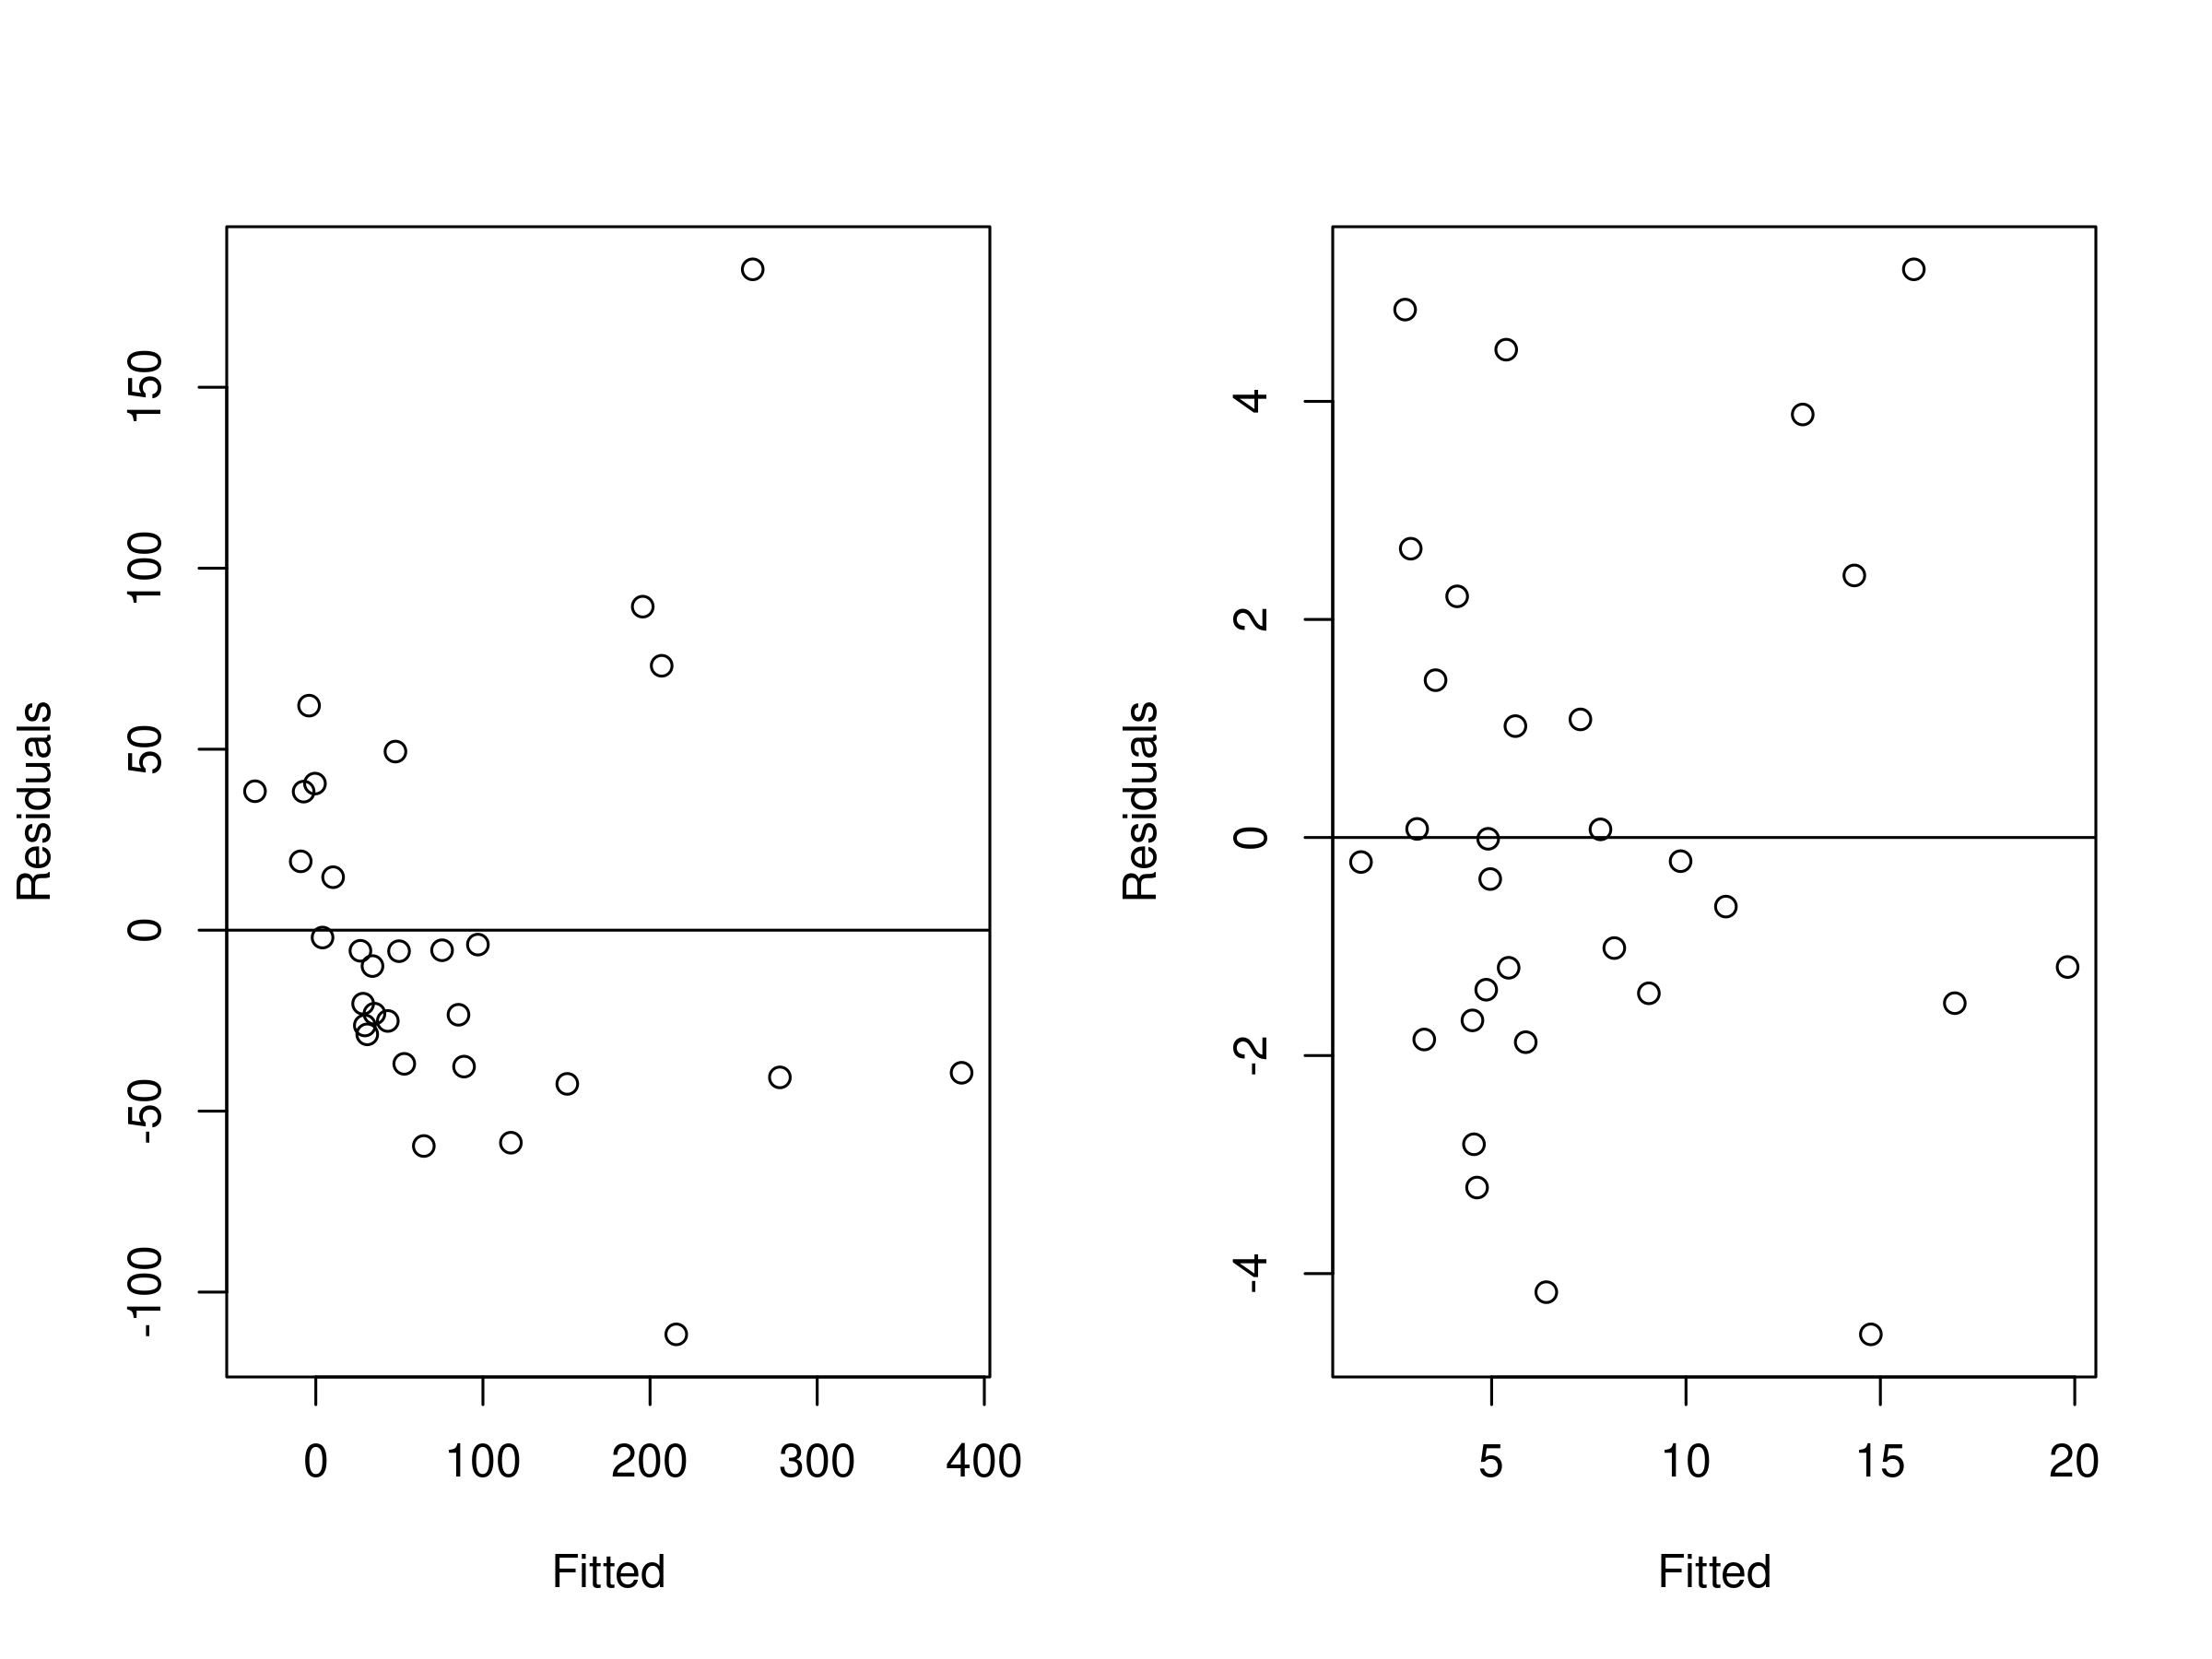

In [7]:
data(gala, package="faraway")
par(mfrow=c(1,2))
lmod <- lm(Species ~ Area + Elevation + Scruz + Nearest  + Adjacent, gala)
plot(fitted(lmod),residuals(lmod),xlab="Fitted",ylab="Residuals")
abline(h=0)
lmod <- lm(sqrt(Species) ~ Area + Elevation + Scruz + Nearest  + Adjacent, gala)
plot(fitted(lmod),residuals(lmod),xlab="Fitted",ylab="Residuals")
abline(h=0)

루트변환에 의한 분산 안정화

Q. 분산안정화가 꼭 필요한가? 가중최소제곱법을 고려함으로써 얻게 되는 이득은 무엇인가?

- (왼쪽 그림) 데이터 그대로 보니 비선형 trend가 있는 것 같다.
- 루트변환을 통해 분산 안정화를 시도했다.
- (오른쪽 그림) trend가 없어졌으니 등분산 만족하나?
    - 모형이 달라지니 해석도 달라지지 않을까?

### Normality (정규성)

검정절차와 구간추정을 위해서는 정규성 가정에 대한 검토가 어느 정도 필요하다 (대표본의 경우 크게 중요하지는 않지만). Q-Q plot에 의해 정규성을 간단히 살펴보거나 잔차에 대한 정규성 검정을 통해 판단한다. Q-Q plot은 관측된 표본분위수가 정규성 가정 하에서의 이상적인 분위수와 일치하는지를 그림으로 나타낸 것이다. 즉, 직선 상에 분포해야 정규성에서 벗어나지 않는 것으로 볼 수 있다.

qqnorm, qqline 에서 qq의 의미 : quantile + theotical quantile + norm or line

qqplot
- 표준 100개 뽑았을때 순서대로 나열하면 가운데 값(50번째)는 0에 가까워야 해, 
- 아니라면?
- 정규분포로 보기 어렵다고 판단.
- x축은 이론적 분위수, y축은 관측 분위수

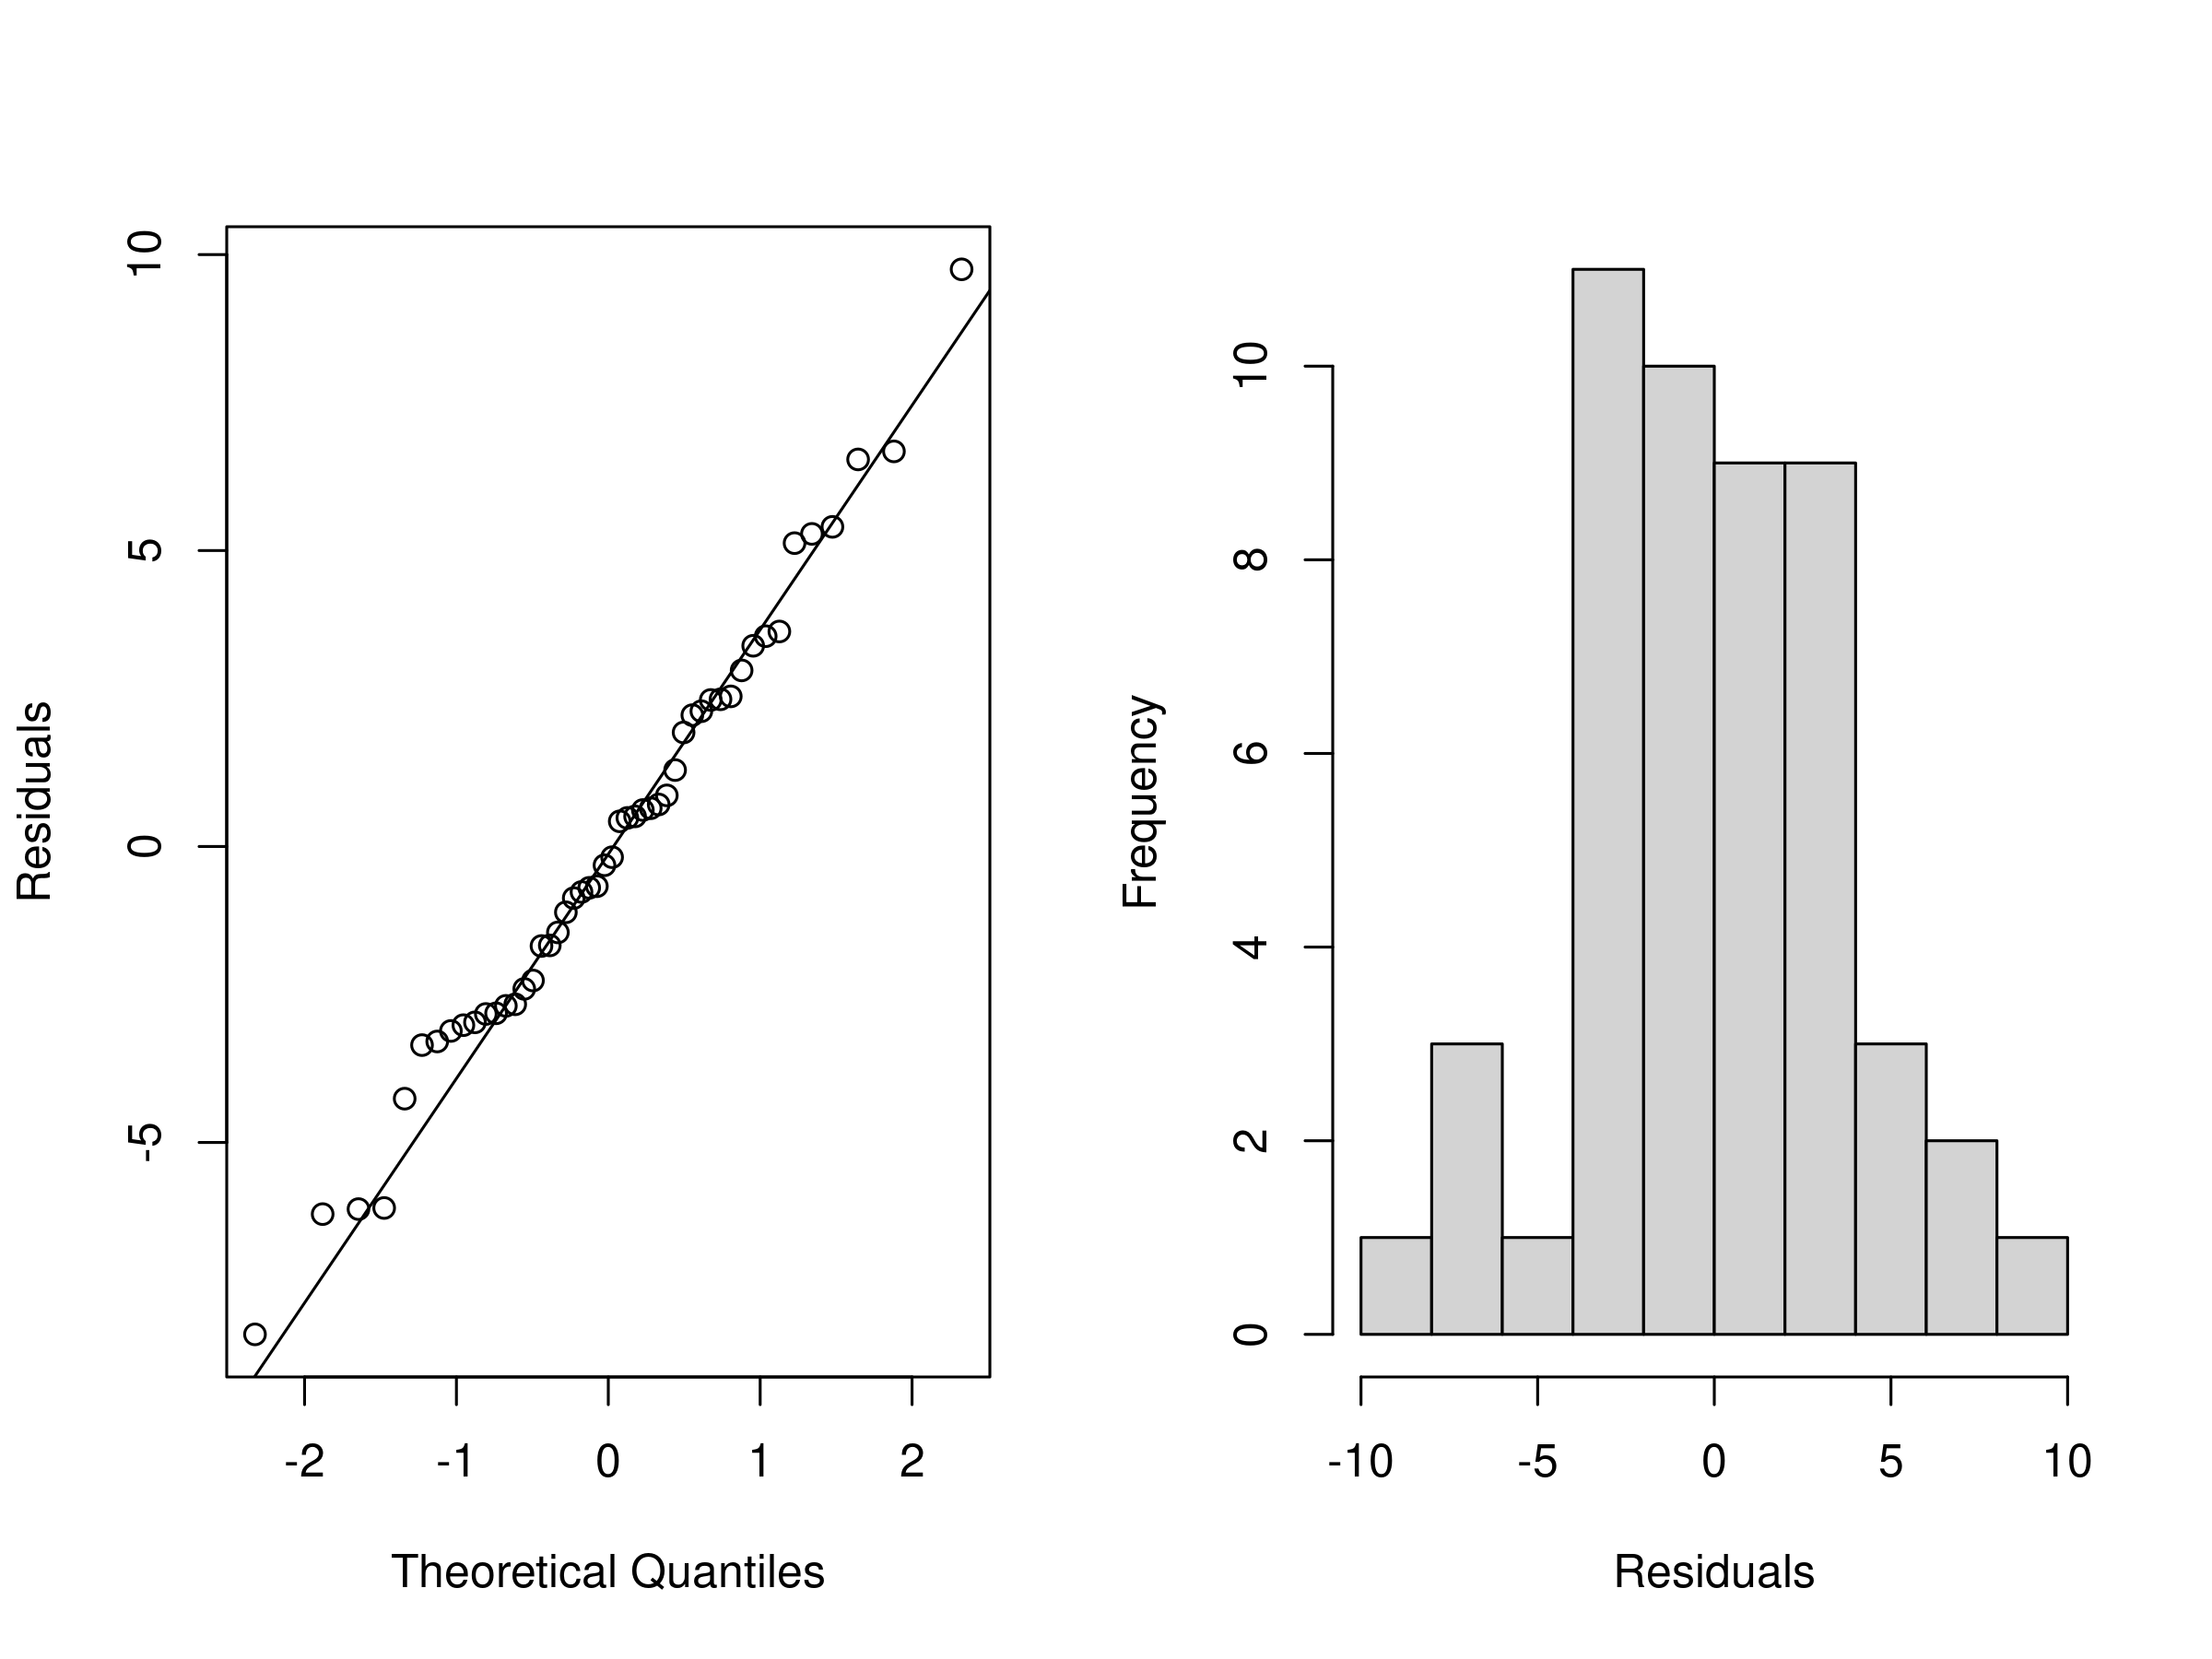

In [8]:
par(mfrow=c(1,2))
lmod <- lm(sr ~ pop15+pop75+dpi+ddpi,savings)
qqnorm(residuals(lmod),ylab="Residuals",main="")
qqline(residuals(lmod))
hist(residuals(lmod),xlab="Residuals",main="")

Q. Do you think it is truely normal?

- (왼쪽 그림) 정규분포의 이상 직선에 가까운가?
- (오른쪽 그림) 히스토그램 그려보니 정규분포 모양에 비해 약간 찌그려져 있는 것 같다
- 모두 주관적...

몇 가지 분포로부터 표본을 생성하여 Q-Q plot의 모양을 살펴보자.

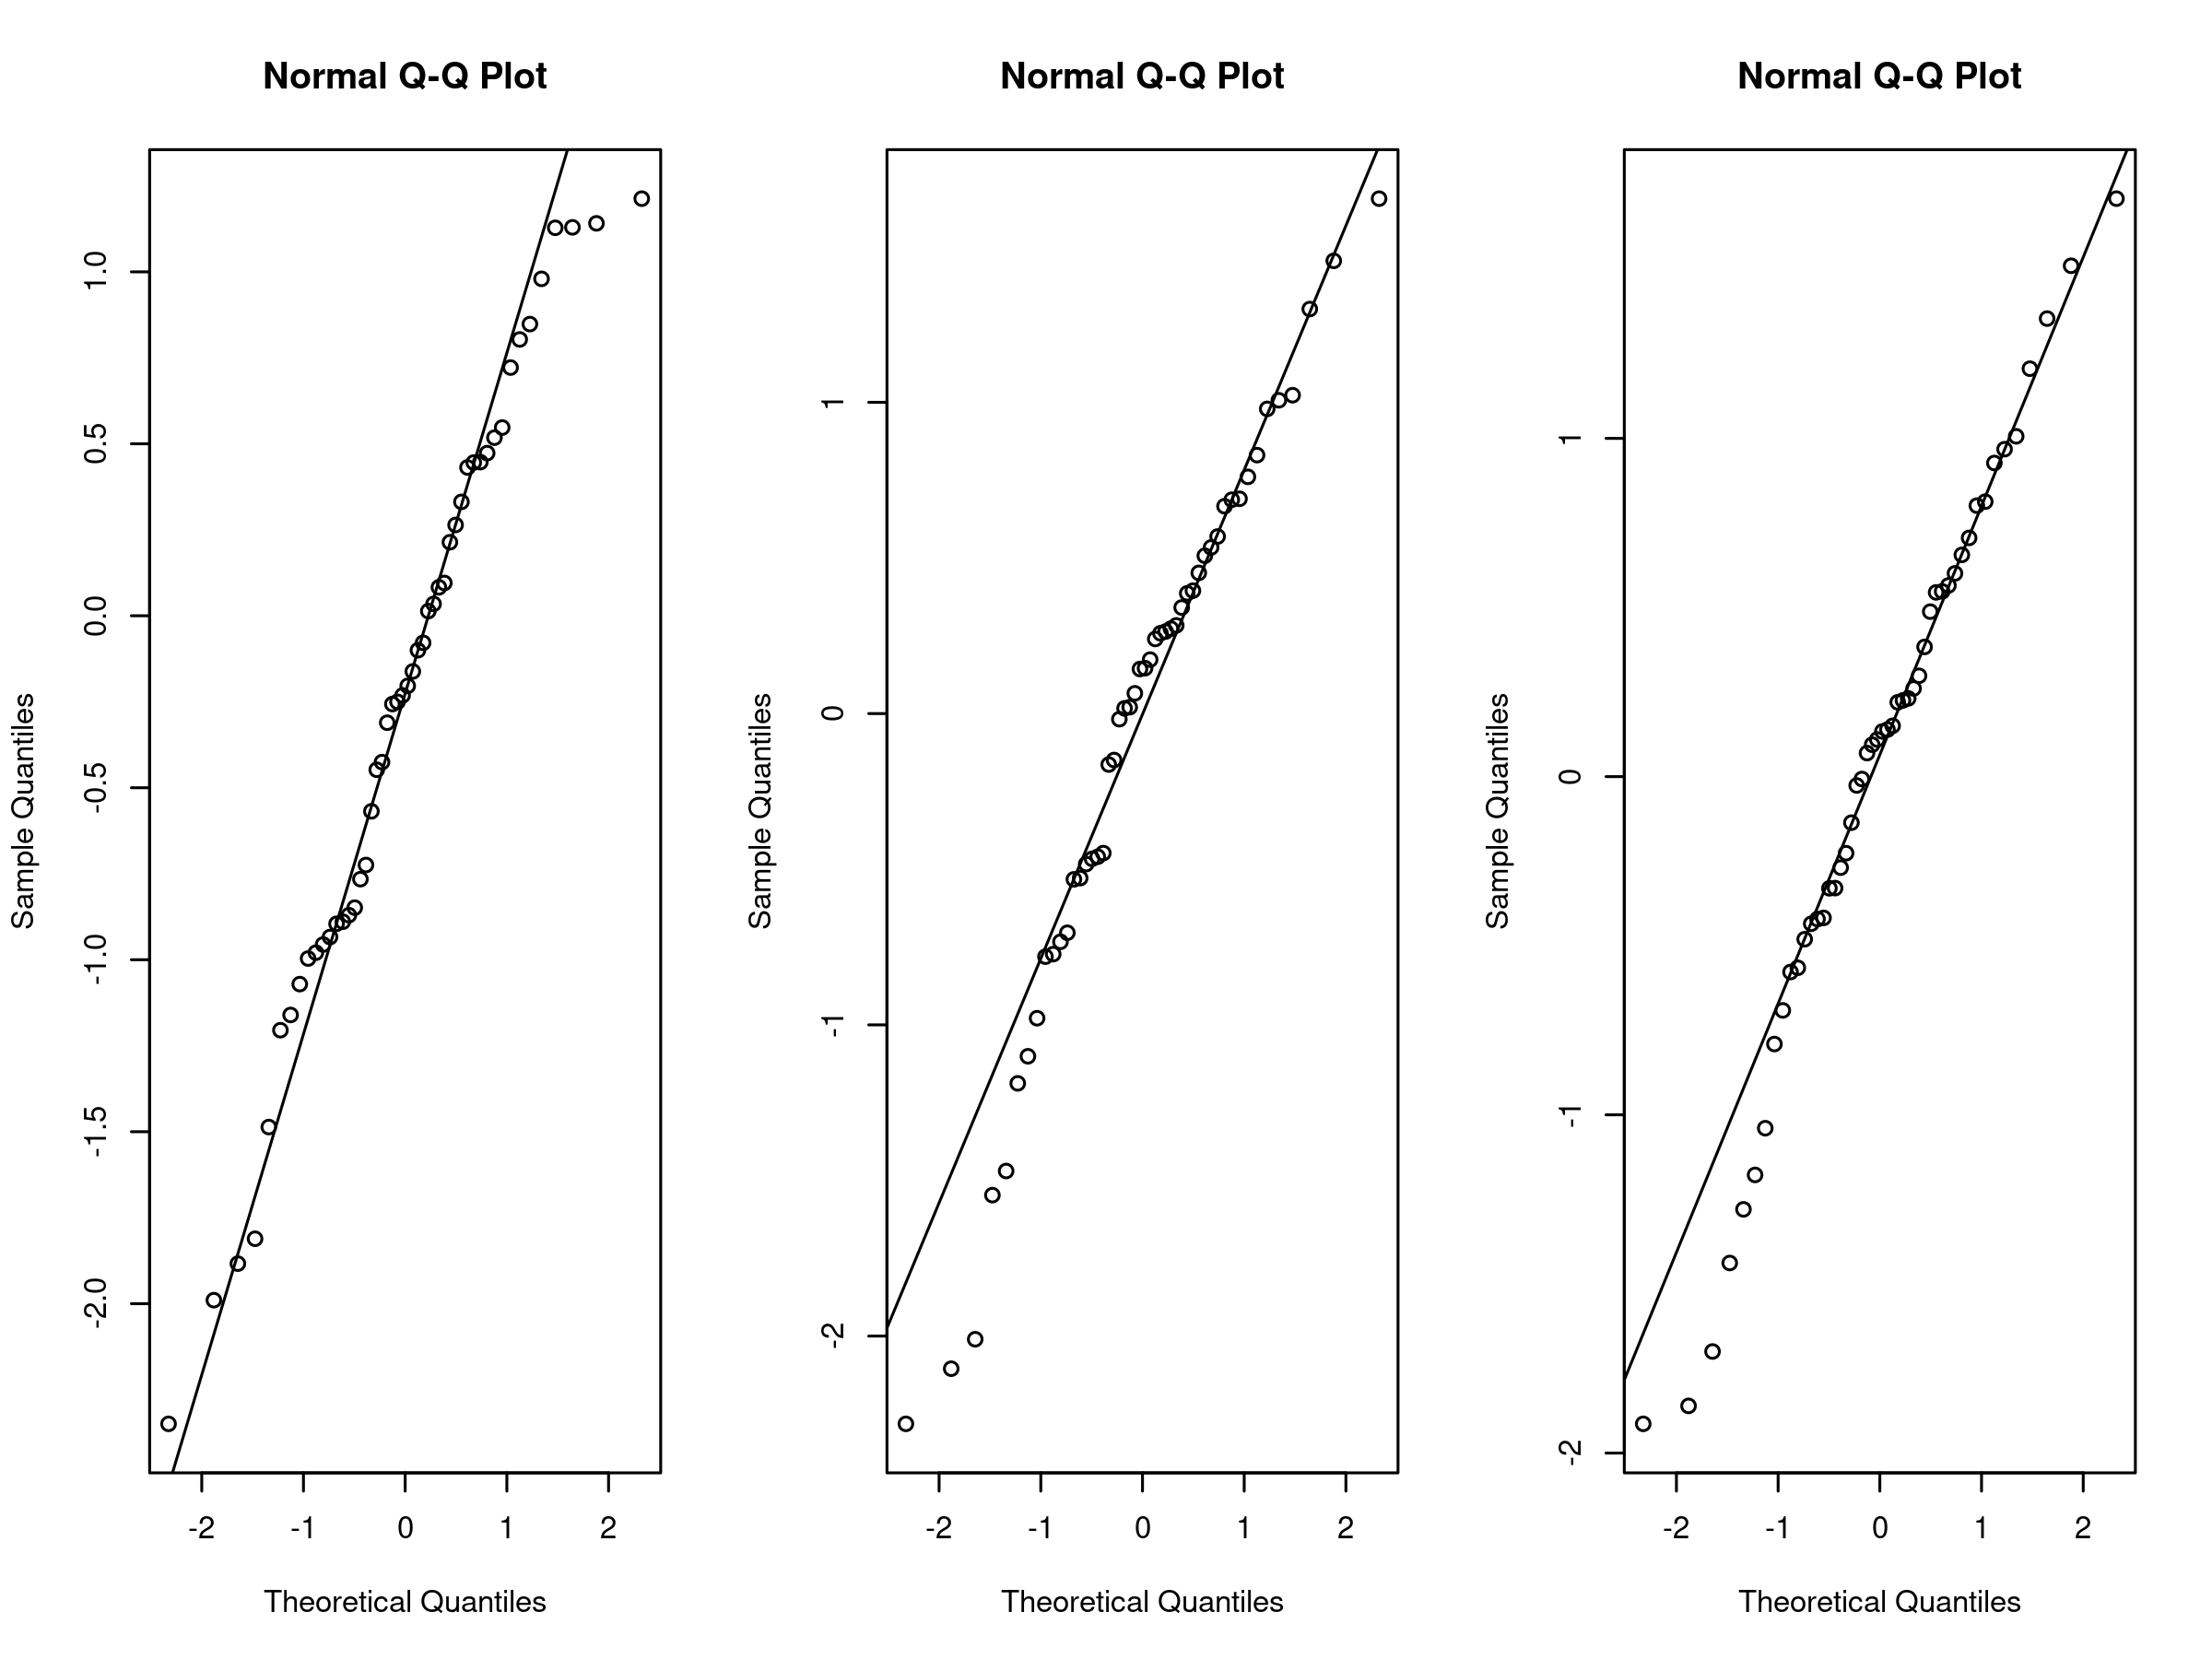

In [9]:
par(mfrow=c(1,3))
n <- 50
for(i in 1:3) {x <- rnorm(n); qqnorm(x); qqline(x)}

- light tail 
- 실제 정규분포를 따라도, qqplot이 안 맞을 수도 있다.
- 심하게 벗어나지 않으면 정규분포 아니라고 안 해도 뭐..

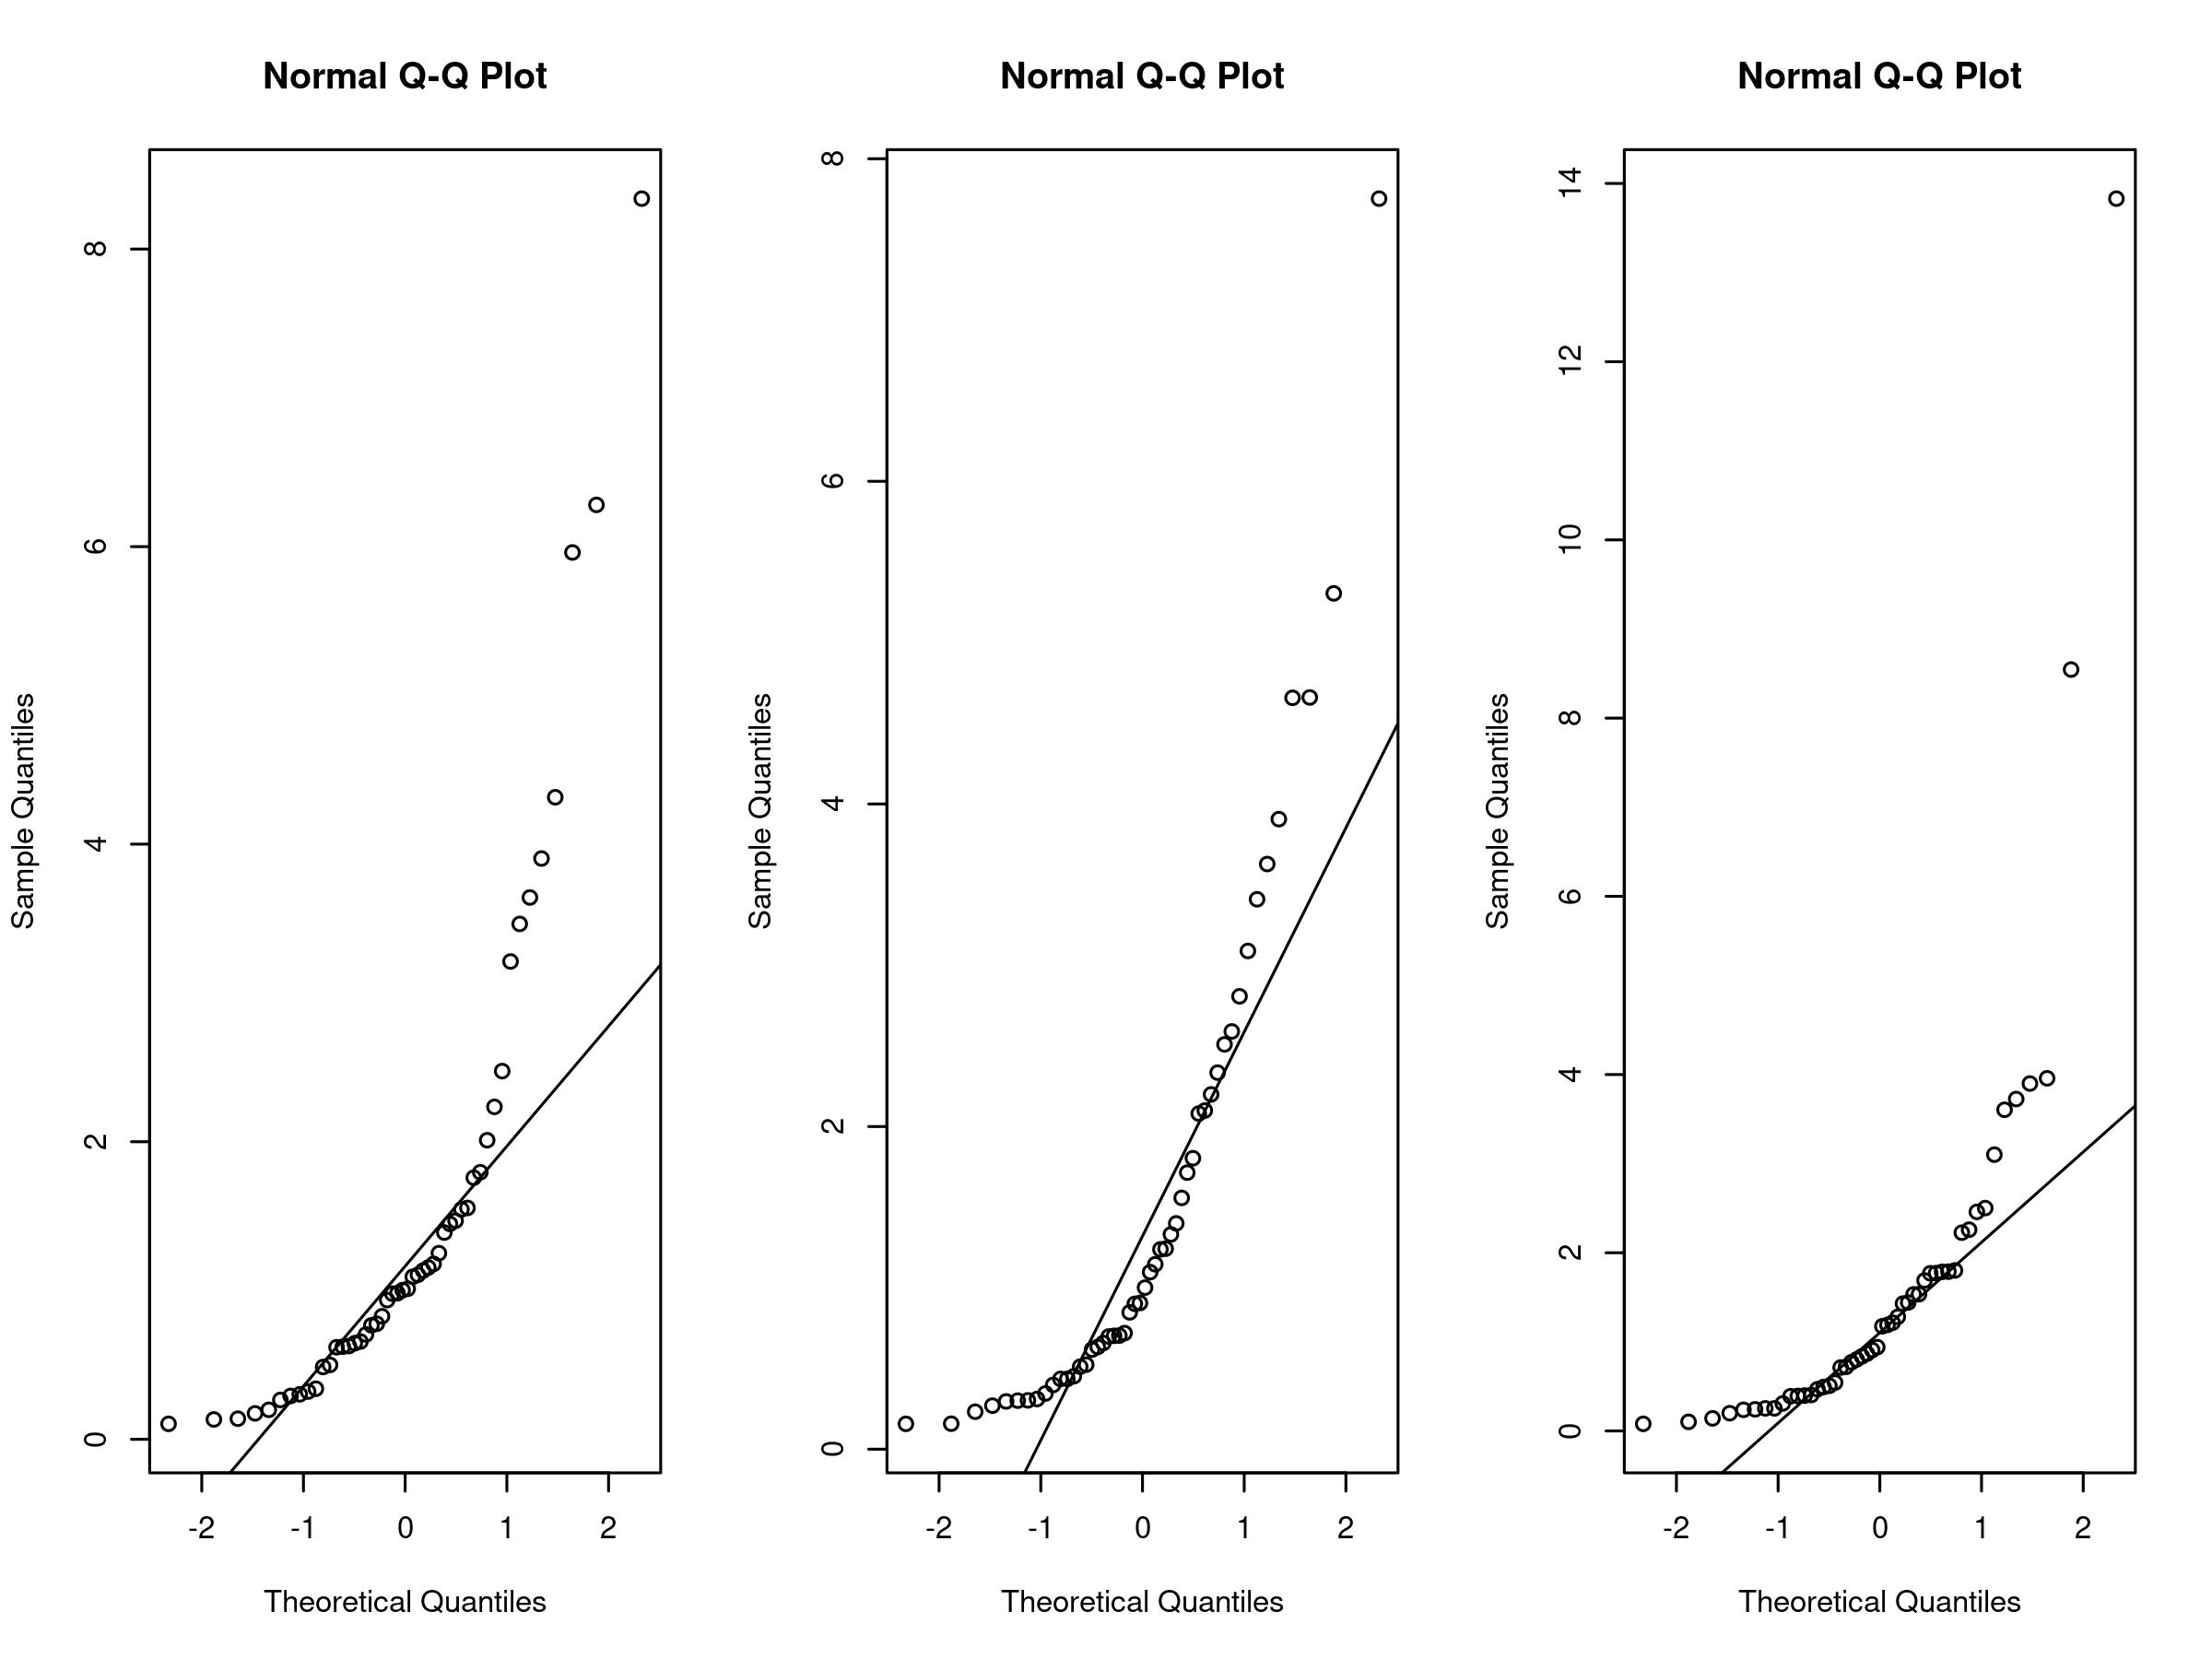

In [10]:
par(mfrow=c(1,3))
for(i in 1:3) {x <- exp(rnorm(n)); qqnorm(x); qqline(x)}

- $log X \sim N$
- $X \sim exp(N)$

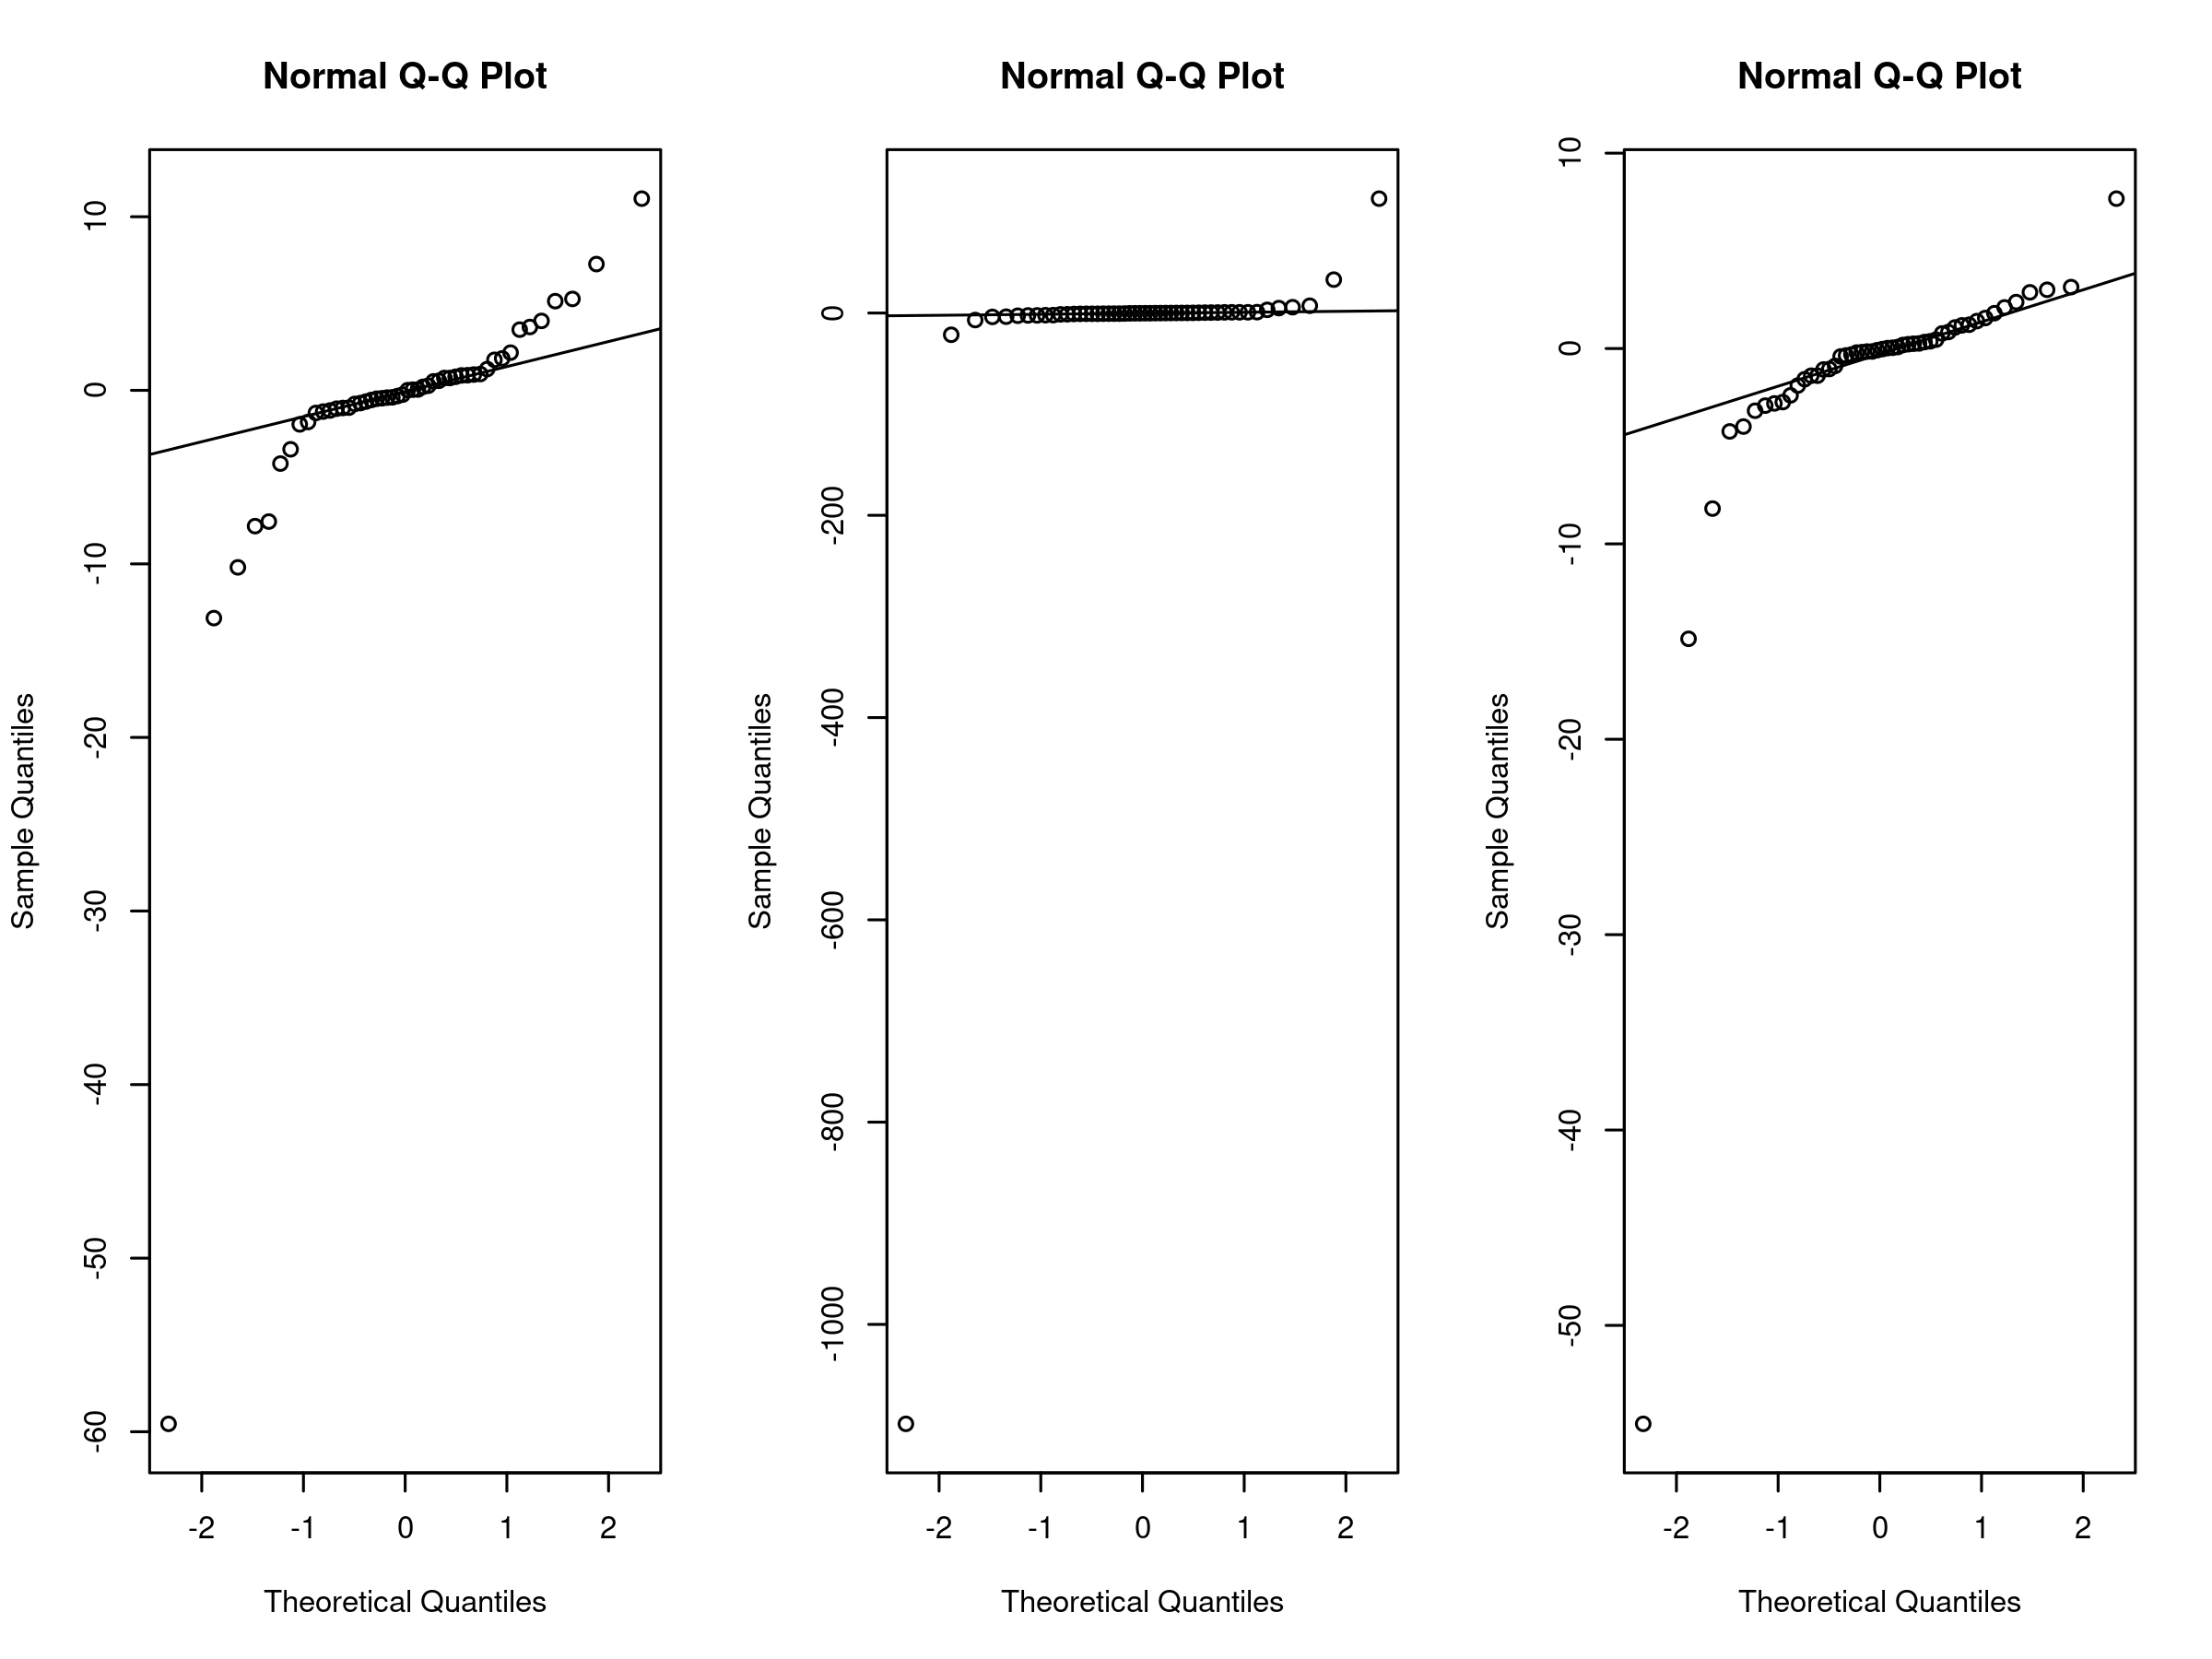

In [11]:
par(mfrow=c(1,3))
for(i in 1:3) {x <- rcauchy(n); qqnorm(x); qqline(x)}

- $-\infty \sim \infty$
- rcauchy - 전형적인 정규분포는 벗어나..
    - 정규분포와 흡사하지만 굉장히 다르다.
    - heavy tail을 가진 cauchy 분포
    - 오차가 +보다 크게, -보다 작게 극단적으로 나타나네?

---

정규분포와 cauchy 분포 비교

In [12]:
n=100

In [13]:
x = rnorm(n)
y = rcauchy(n)

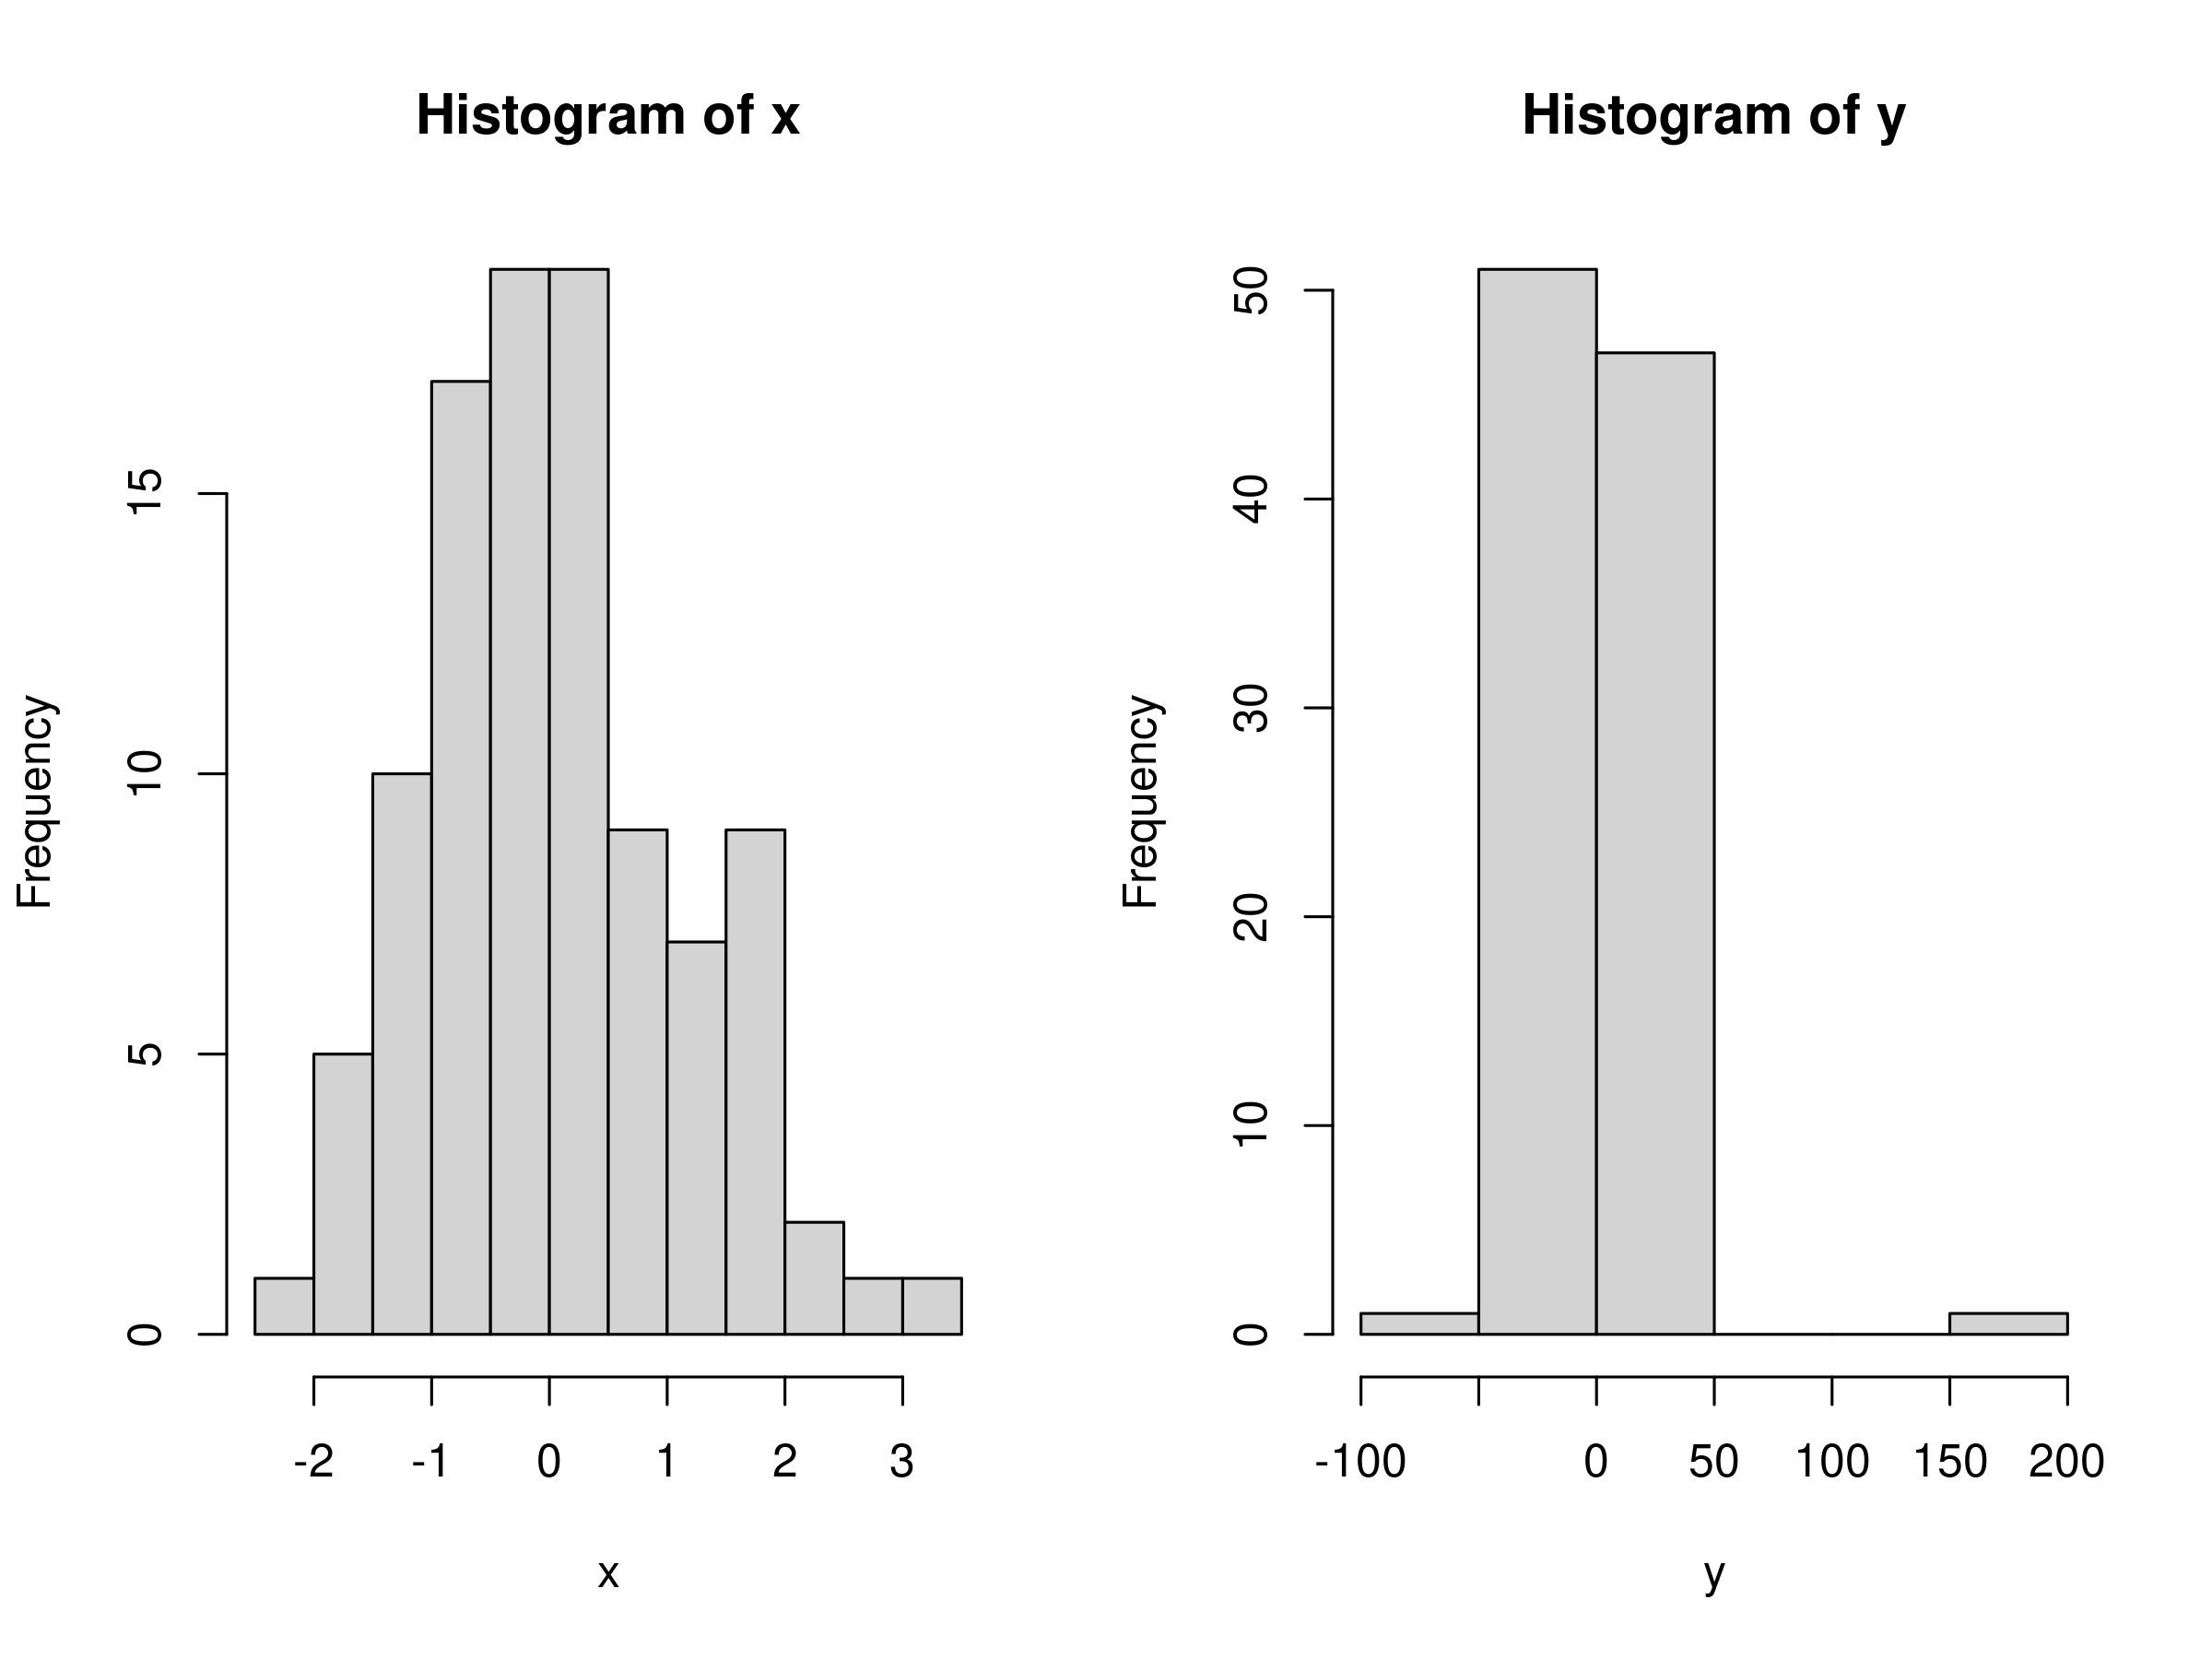

In [14]:
par(mfrow=c(1,2))
hist(x)
hist(y)

In [15]:
sort(y)[1:10]

[1] -56.889045 -21.319160 -10.130316  -9.327290  -4.691392  -2.717740
 [7]  -2.536062  -2.301627  -2.269112  -2.191493

In [16]:
sort(y)[90:100]

[1]   2.556862   2.803909   3.446457   3.606088   3.791231   4.156909
 [7]   4.264952   4.556813   4.927171   6.802134 193.475224

---

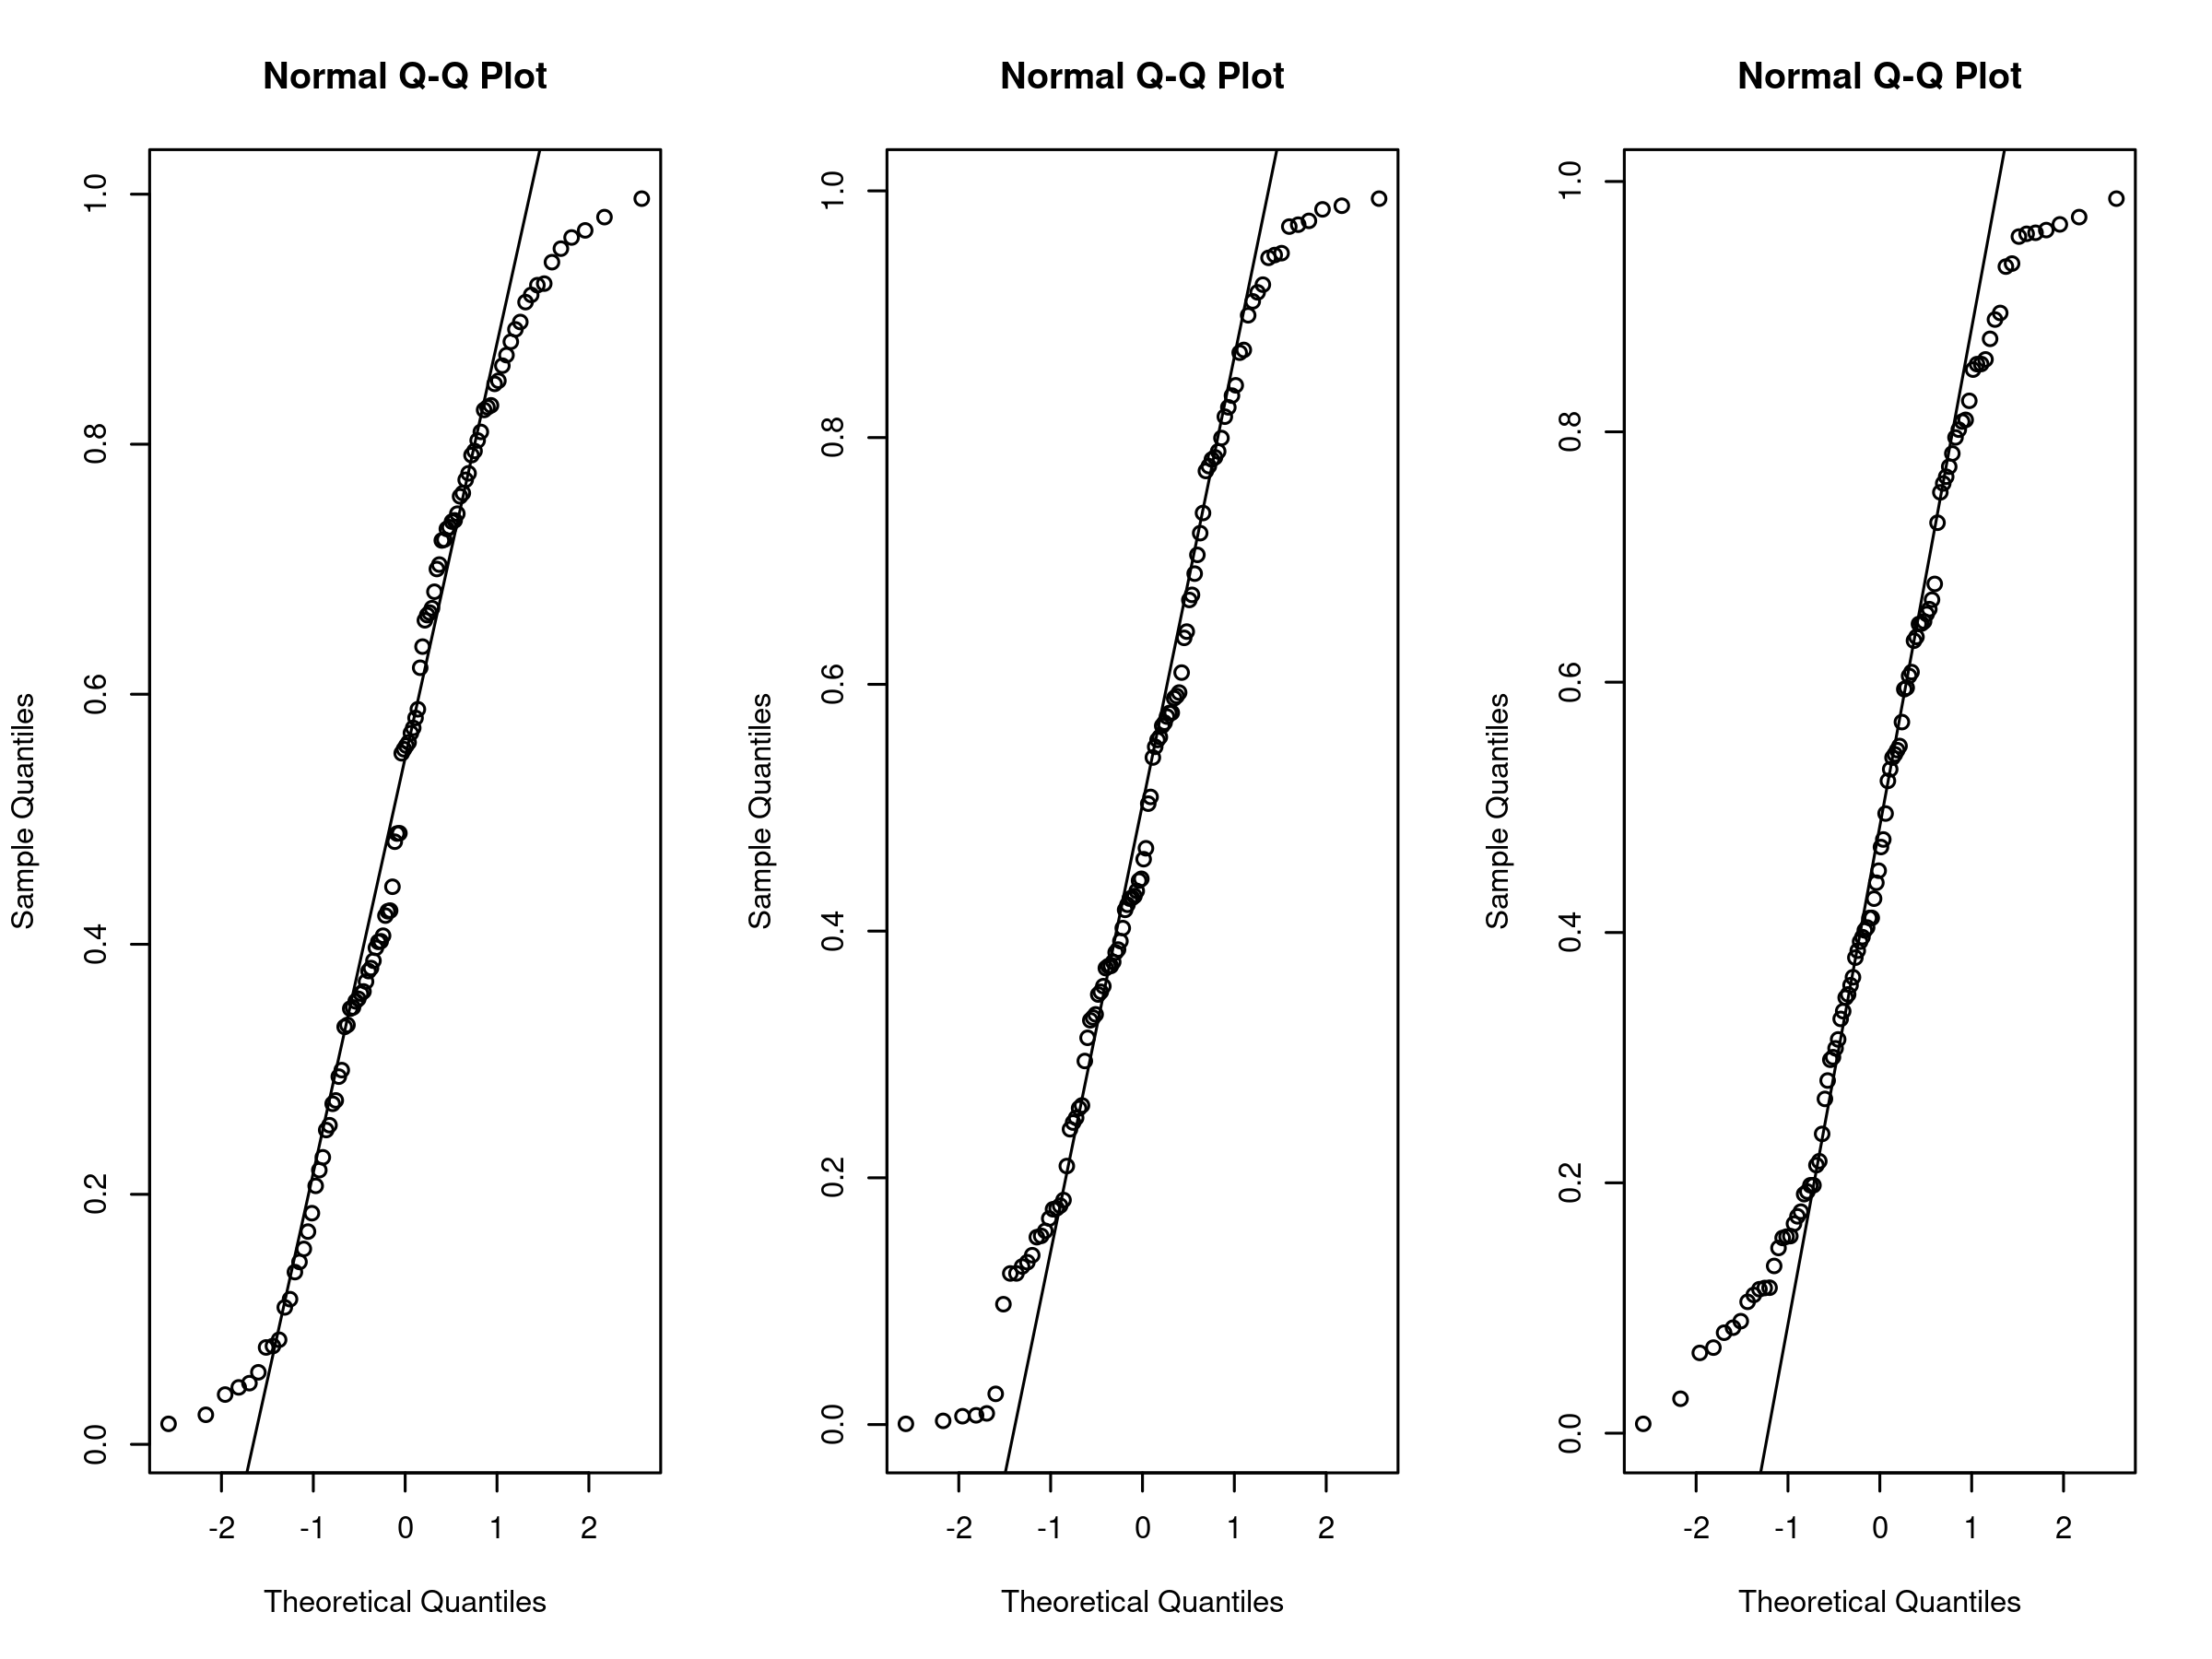

In [17]:
par(mfrow=c(1,3))
for(i in 1:3) {x <- runif(n); qqnorm(x); qqline(x)}

- 상하한이 정해져 있다.
- light tail 오차 발생에 함께 존재
- 0에서 1까지

Q-Q plot에서 나타나는 문제는 보통 heavy-tail 분포에서 기인하는 경우가 많으나 때로는 몇 개의 이상치로 인한 것일 수도 있다. 후자의 경우에는 해당 관측치의 제외여부를 검토할 필요가 있다.
- heavy tail 분포
    - 1. $\epsilon$ 이 heavy tail인가?
    - 2. outlier가 존재하나?
- outlier로 볼때, 해석에 따라 다르게 처리할 수 있다.
- 이상치를 포함할건지, 말건지..

정규성 가정이 위배되더라도 최소제곱추정량은 여전히 BLUE(best linear unbiased estimator)이다. 하지만 최적의 추정량은 아닐 수 있으며 robust 추정량이 더 나은 성질을 나타내기도 한다. 또한 검정이나 구간추정의 부정확성을 초래할 수 있다. 하지만 반복해서 언급하였듯이 대표본의 경우 크게 문제가 되지 않는 경우가 많다.

정규성에 위배가 나타날 경우 몇 가지 해결책은 다음과 같다.

1. Short-tail(=light-tail)의 경우 파급이 크지 않아 크게 신경쓰지 않아도 무방하다.
2. 비대칭 분포의 경우 적절한 변환이 필요할 수 있다.
    - 해석에 영향이 가니까 해석이 중요하면 조심해야 한다.
3. Heavy-tail의 경우 bootstrap이나 permutation test와 같은 방식으로 추론하거나 robust method를 이용한다.
    - bootstrap이나 permutation test는 최소제곱 분포를 사욜하지만 robust method를 이용하면 추정방식 자체를 바꾸겠다는 것.

다음과 같은 정규성 검정도 가능하다.

In [18]:
shapiro.test(residuals(lmod))


	Shapiro-Wilk normality test

data:  residuals(lmod)
W = 0.98698, p-value = 0.8524


$H_0$ : 정규성 가정 만족

$H_1$ : 정규성 가정 만족하지 않음

p값이 유의수준 5%보다 크기 때문에 정규성 가정을 만족한다고 할 수 있다.

### Correlated errors (독립성)

독립성이 위배되는 것은 그 경우의 수가 매우 많아 확인이 매우 어렵다. 만약, 시간 순으로 관측된 자료라면 시간 순으로 일종의 상관성이 존재할 가능성이 있다.

다음은 북반구의 온도와 그에 대한 8가지 proxy에 의한 선형모형 적합결과이다.

A data frame with 1001 observations on the following 10 variables.
- `nhtemp` : Northern hemisphere average temperature (C) provided by the UK Met Office (known as HadCRUT2)
- `wusa` : Tree ring proxy information from the Western USA.
- `jasper` : Tree ring proxy information from Canada.
- `westgreen` : Ice core proxy information from west Greenland
- `chesapeake` : Sea shell proxy information from Chesapeake Bay
- `tornetrask` : Tree ring proxy information from Sweden
- `urals` : Tree ring proxy information from the Urals
- `mongolia` : Tree ring proxy information from Mongolia
- `tasman` : Tree ring proxy information from Tasmania
- `year` : Year 1000-2000AD

각각 동일연도의 관측값들임, 따라서 시간순으로 상관성이 있을 가능성이 존재한다.

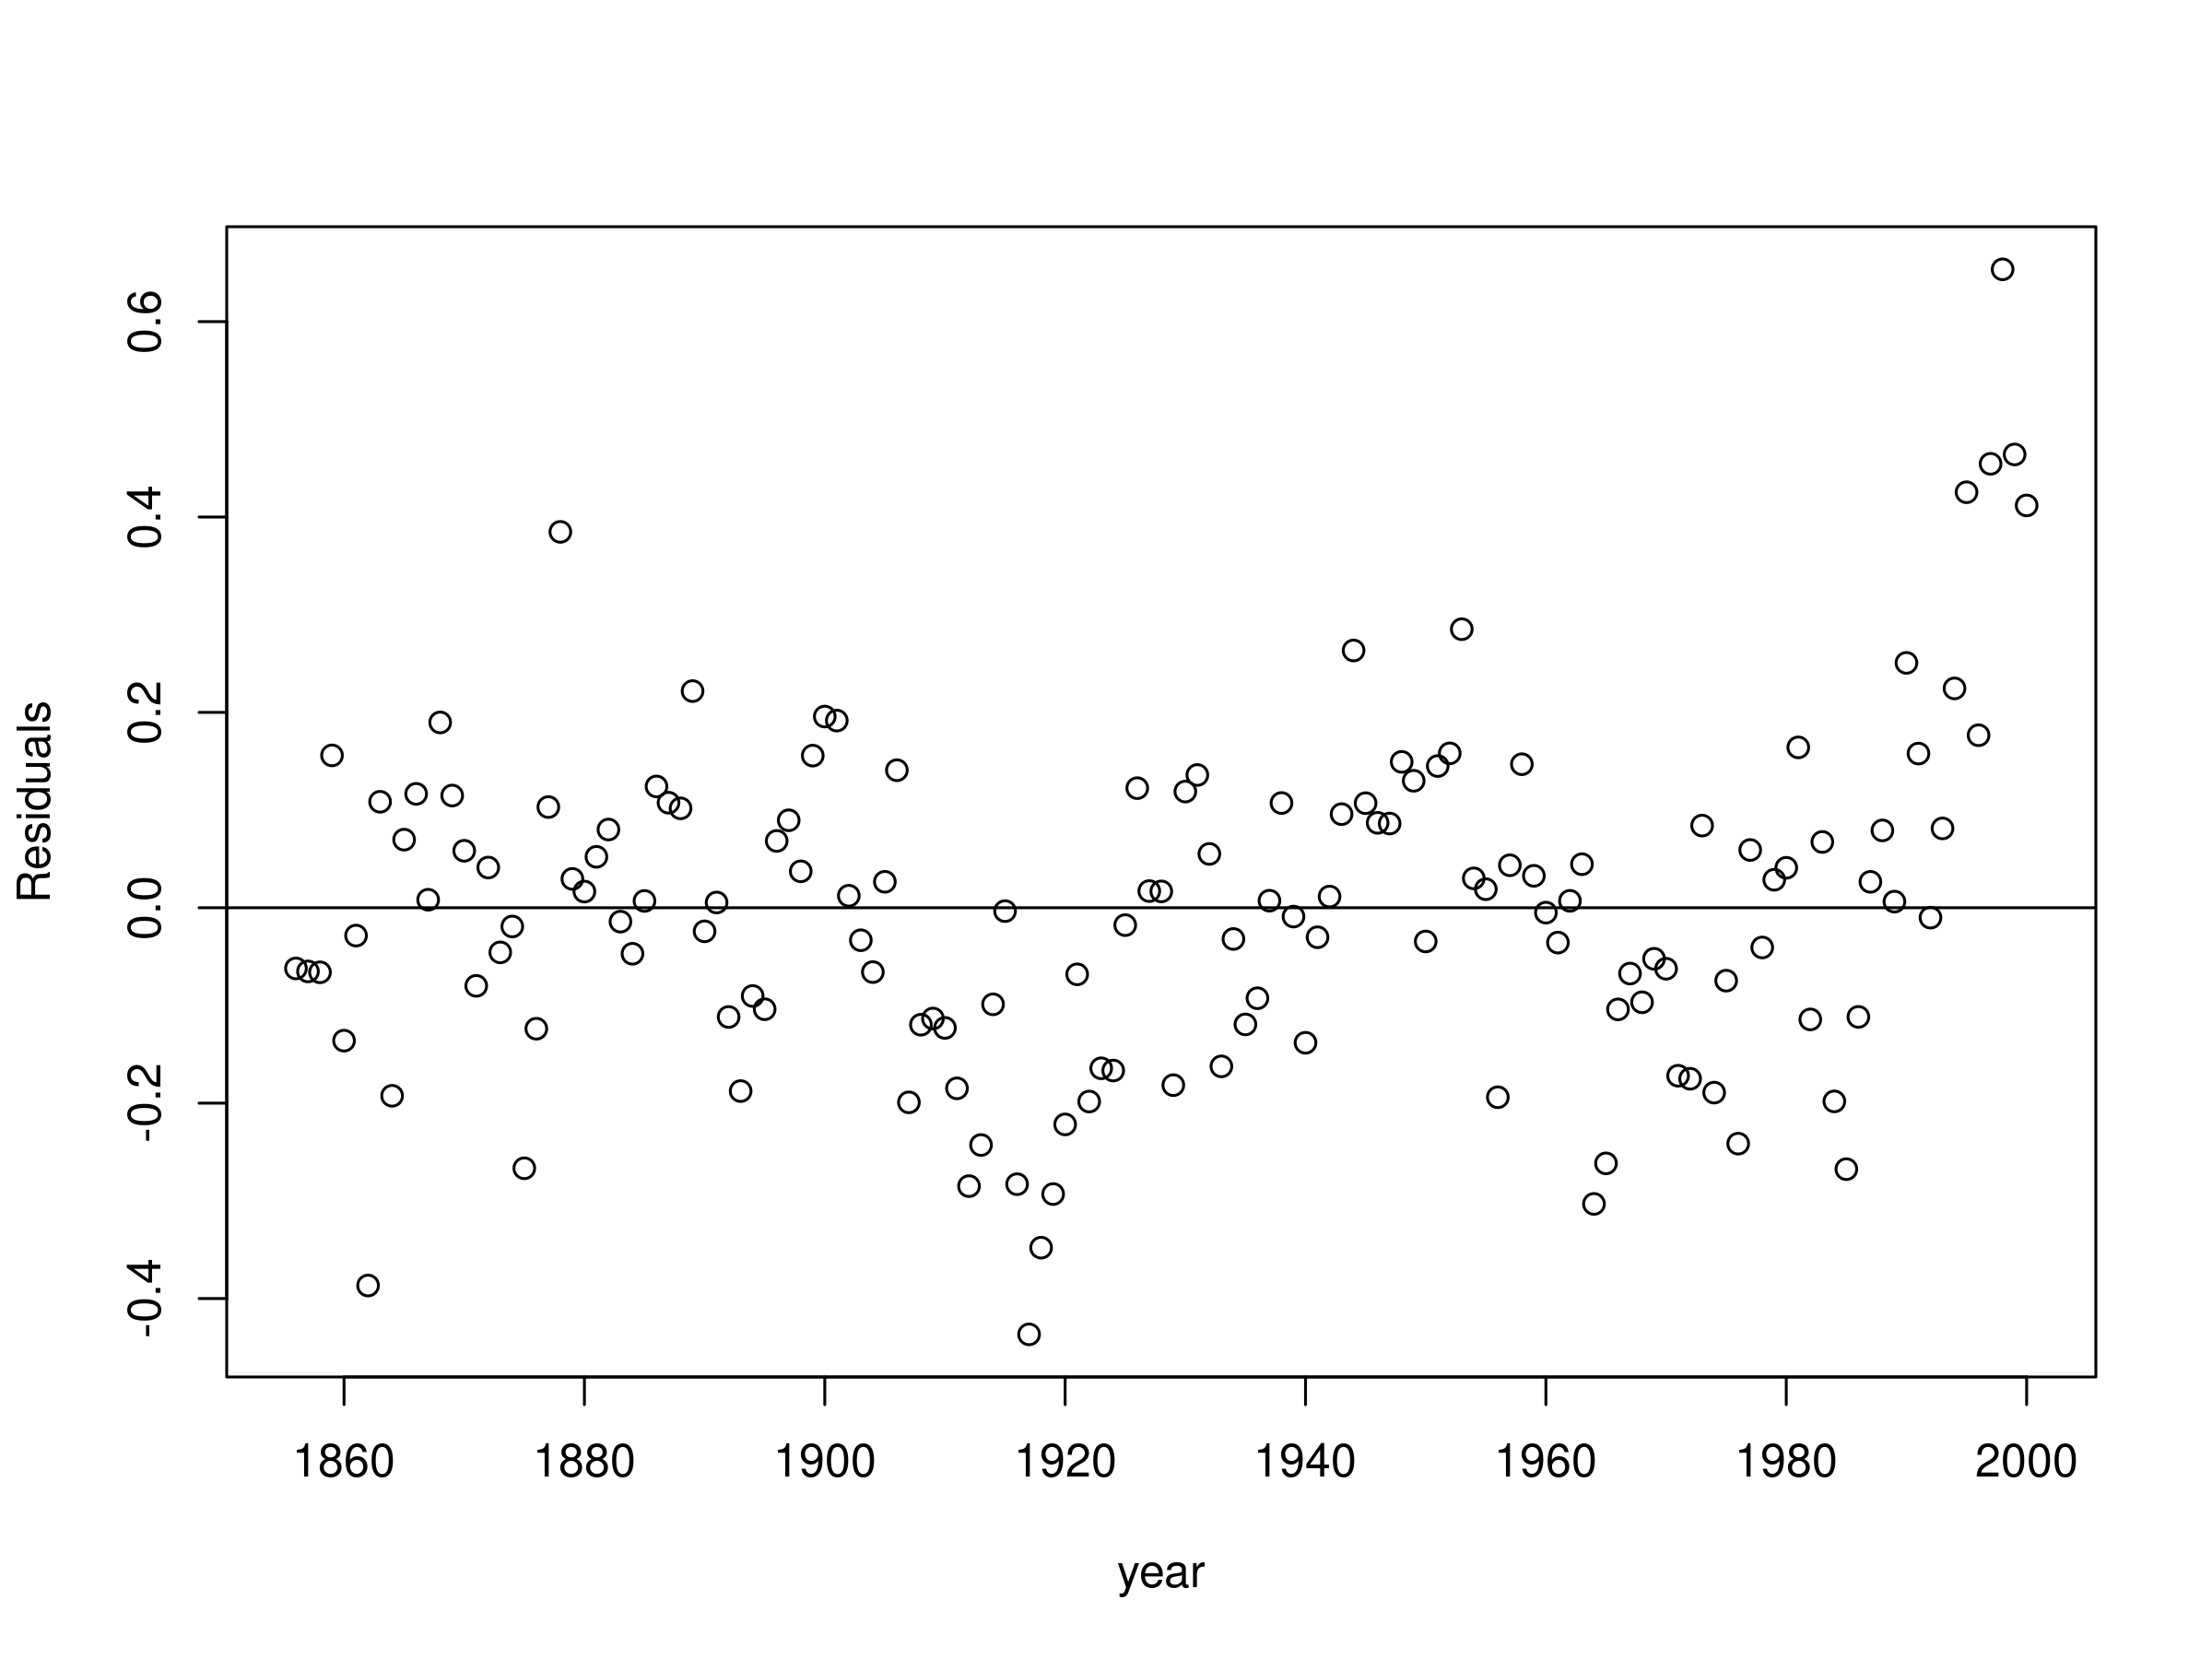

In [19]:
data(globwarm,package="faraway")
lmod <- lm(nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask + urals + mongolia + tasman, globwarm)
plot(residuals(lmod) ~ year, na.omit(globwarm), ylab="Residuals")
abline(h=0)

잔차가 같은 부호가 연속되는 경향이 있음을 알 수 있다. 이런 현상은 오차가 양의 상관성을 띌 때 전형적으로 나타난다.

$$Corr(\epsilon_i,\epsilon_{i+1})>0$$

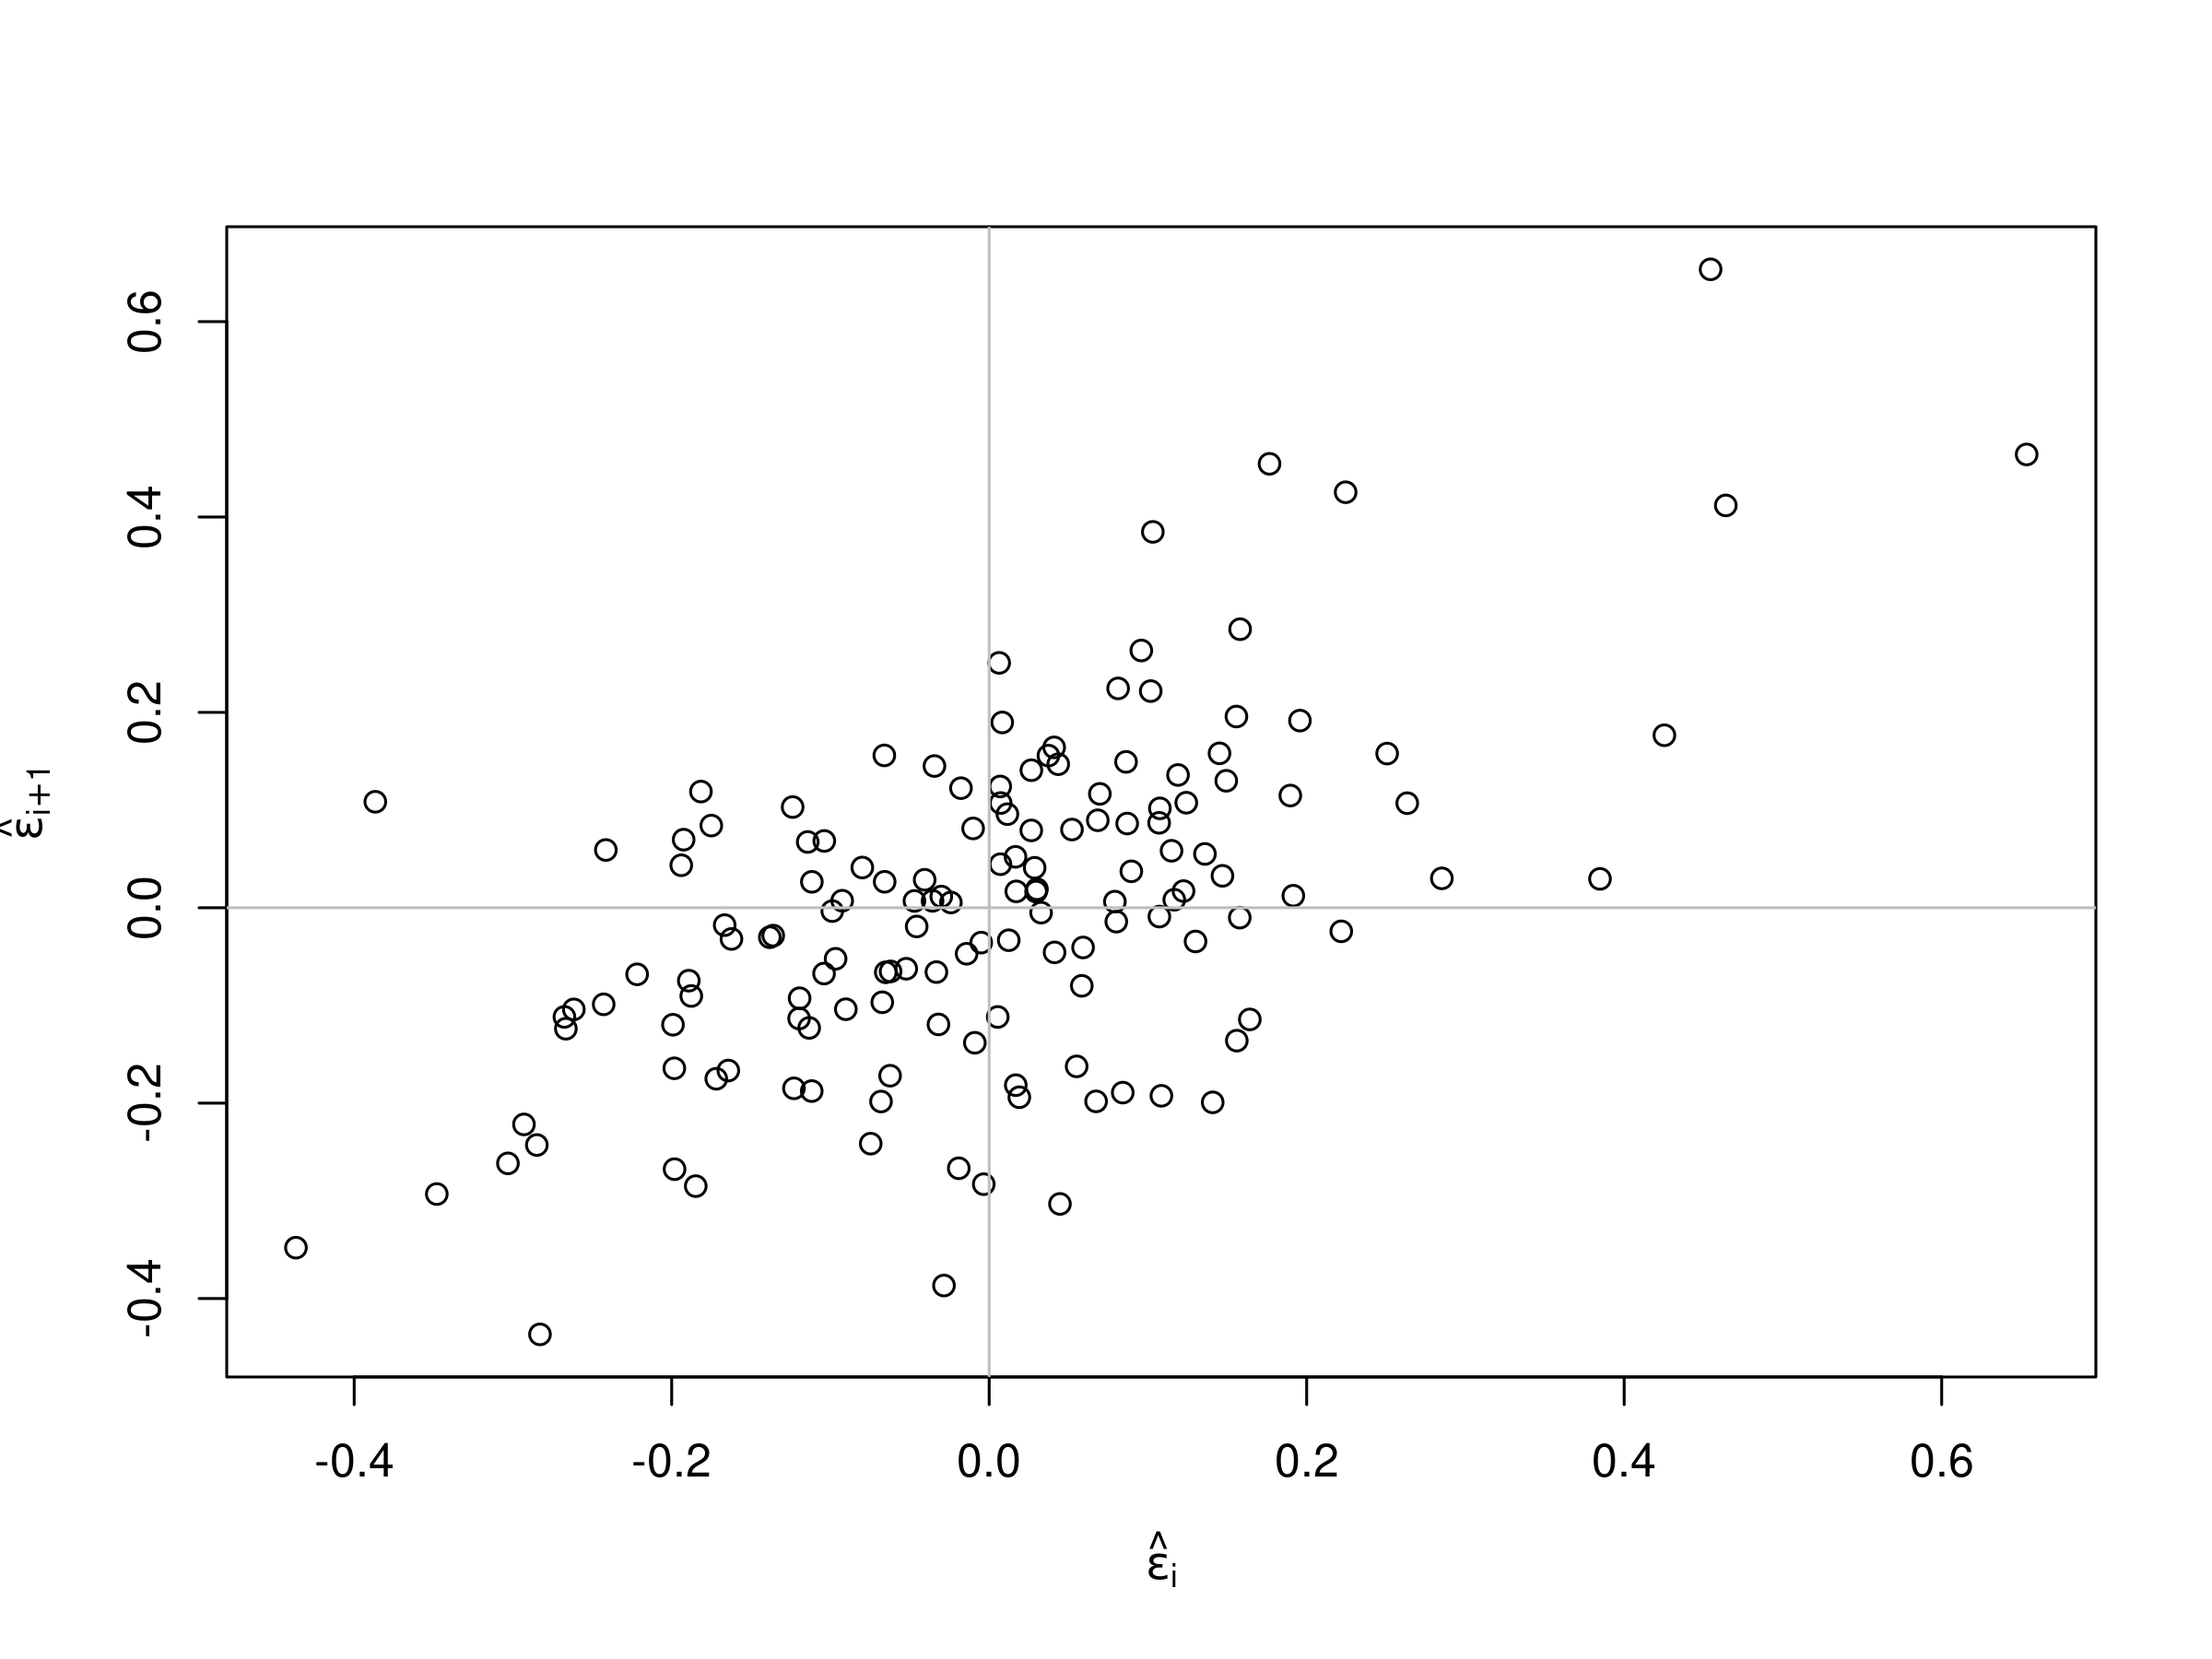

In [20]:
n <- length(residuals(lmod))
plot(tail(residuals(lmod),n-1) ~ head(residuals(lmod),n-1), xlab= expression(hat(epsilon)[i]),ylab=expression(hat(epsilon)[i+1]))
abline(h=0,v=0,col=grey(0.75))

그림만 보면 전형적인 양의 상관관계에 있음, 독립성 깨진 것.

Durbin-Watson test 잔차가 AR(1) 프로세스인지를 검정한다.

$$\epsilon_{t+1} = \rho \epsilon _t + v_t$$
$$H_0:ρ=0   \text{  vs  }   H_1:ρ≠0$$

- $\rho>0$ 이면 양의 자기 상관이 있다.
- $\rho<0$ 이면 음의 자기 상관이 있다.
- $0 < \rho < 1$
- 잔차 $v_t \sim^{iid} N(0,\sigma^2)$
- $H_0$ : 독립성에 문제 없다 정도, 확신은 아냐..
    - but 독립적으로 관찰된 것들이면 독립성에 문제가 없다.
- $H_1$ : 독립성 깨진다.

In [35]:
require(lmtest)

In [22]:
dwtest(nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask + urals + mongolia + tasman, data=globwarm)


	Durbin-Watson test

data:  nhtemp ~ wusa + jasper + westgreen + chesapeake + tornetrask +     urals + mongolia + tasman
DW = 0.81661, p-value = 1.402e-15
alternative hypothesis: true autocorrelation is greater than 0


더빈왓슨 검정의 p값이 유의수준 5%보다 작아서 귀무가설을 기각 시키고 독립성이 성립 안 한다는 결론.
- bootstrap 하거나
- AR(1) 모형에 포함시켜서 가정하거나

## Finding unusual observations

1. outliers
2. influential observations
3. leverage points

위 개념들은 명확하게 구분되지 않는다.

### leverage points

$H$의 대각원소 $h_i$를 **leverage**라 한다. $var(\hat{\epsilon}_i) = \sigma^2( 1 − h_i)$ 로부터 $h_i$가 크면 해당관측치쪽으로 적합된 직선이 당겨지는 효과가 있게 된다. $h_i$는 $X$-space 에서 극단적인 쪽에 위치할 때 발생함이 알려져 있다.
- $0 \le h \le 1$
- $h$ 가 크면 $var(\epsilon)$이 작아지고, $\epsilon$이 0에 가까워진다.

$\sum _i h_i = K$ 이므로 $\frac{K}{N}$의 2배~4배를 넘는 관측치에 대해서 주의가 필요함이 알려져 있다.

In [23]:
lmod <- lm(sr ~ pop15 + pop75 + dpi + ddpi, savings)
hatv <- hatvalues(lmod)
head(hatv)

Australia    Austria    Belgium    Bolivia     Brazil     Canada 
0.06771343 0.12038393 0.08748248 0.08947114 0.06955944 0.15840239

In [24]:
sum(hatv)

[1] 5

- 변수 5개
- 데이터 50개
- $\frac{5}{50} = 0.1 = h_i =$leverage

### outliers

이상치는 데이터의 특성에서 다소 떨어진 관측치를 의미한다. 이상치는 전체 적합 결과에 영향을 미칠 수도 그렇지 않을 수도 있다.

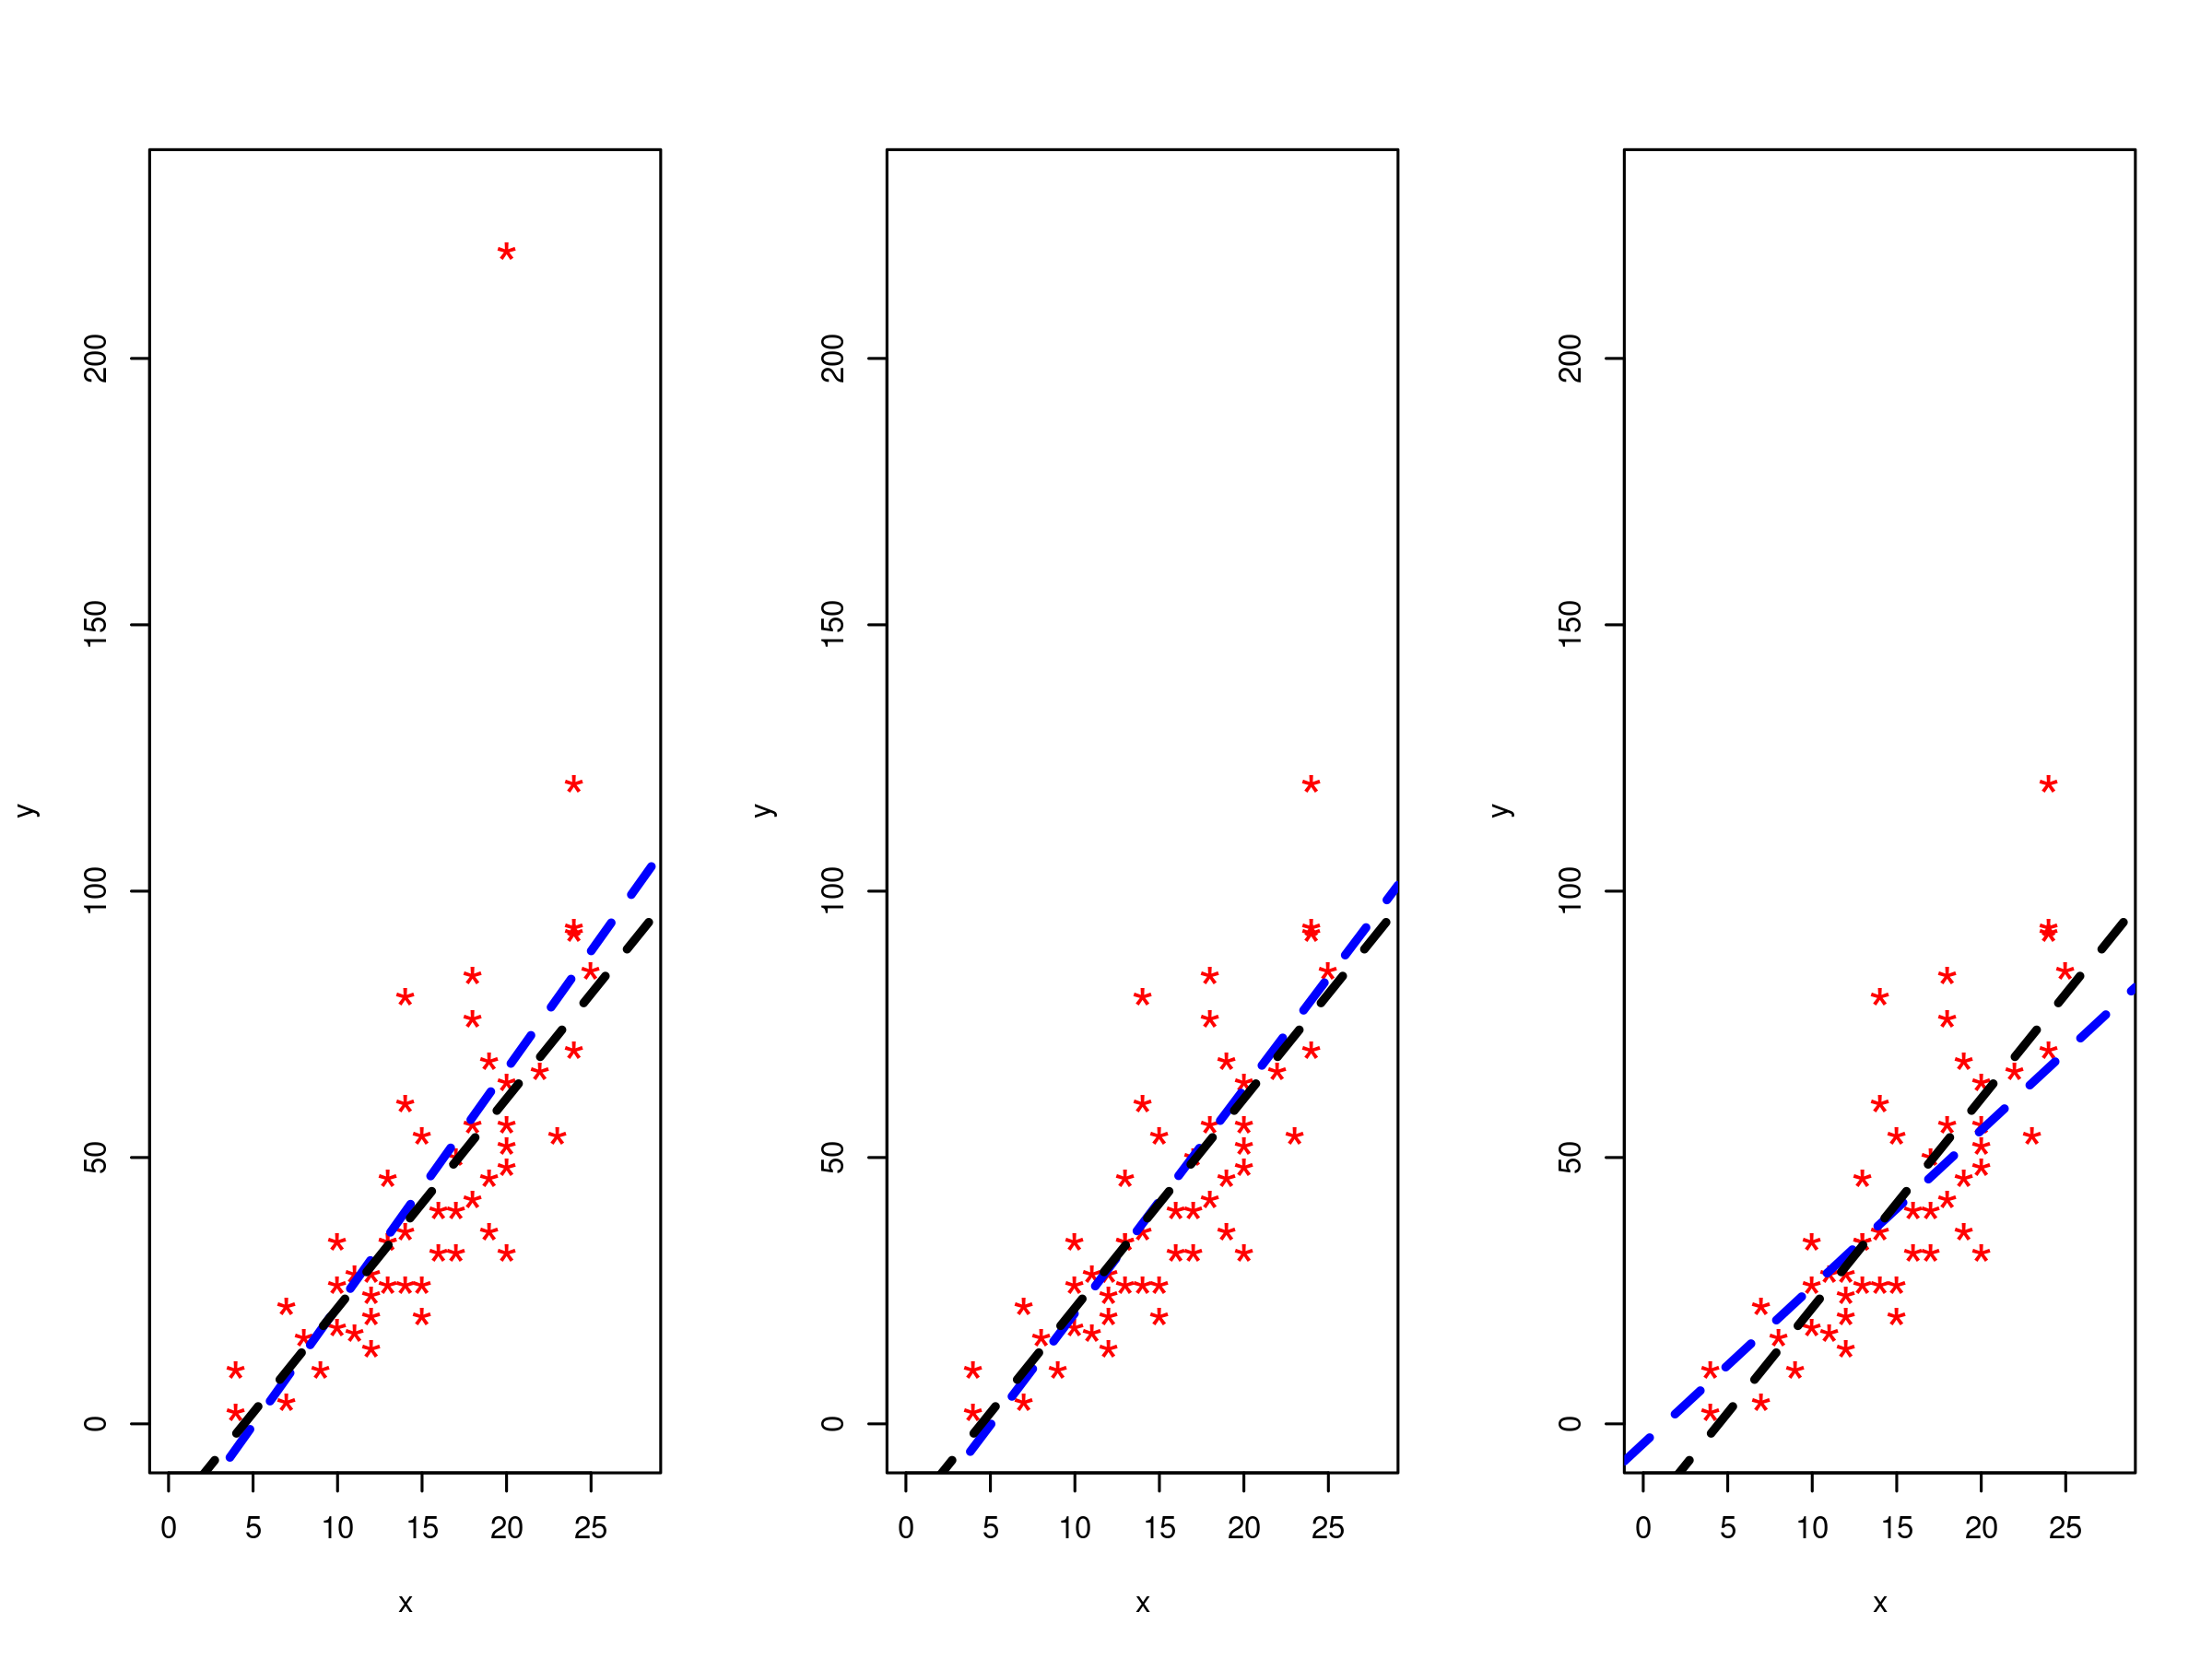

In [25]:
#collaspe
cars_outliers1 <- data.frame(speed=c(20), dist=c(220))
cars_outliers2 <- data.frame(speed=c(30), dist=c(130))
cars_outliers3 <- data.frame(speed=c(35), dist=c(30))

# 기존 데이터에 이상치 데이터를 추가한 데이터 프레임
new_cars1 <- rbind(cars, cars_outliers1)
new_cars2 <- rbind(cars, cars_outliers2)
new_cars3 <- rbind(cars, cars_outliers3)

# plot 창 변환
par(mfrow = c(1, 3))

# 시각화
plot(new_cars1$speed, new_cars1$dist, xlim=c(0, 28), ylim=c(0, 230),xlab="x", ylab="y", pch="*", col="red", cex=2)
abline(lm(dist ~ speed, data=new_cars1), col="blue", lwd=3, lty=2)
abline(lm(dist ~ speed, data=cars), col="black", lwd=3, lty=2)
plot(new_cars2$speed, new_cars2$dist, xlim=c(0, 28), ylim=c(0, 230),xlab="x", ylab="y", pch="*", col="red", cex=2)
abline(lm(dist ~ speed, data=new_cars2), col="blue", lwd=3, lty=2)
abline(lm(dist ~ speed, data=cars), col="black", lwd=3, lty=2)
plot(new_cars3$speed, new_cars3$dist, xlim=c(0, 28), ylim=c(0, 230),xlab="x", ylab="y", pch="*", col="red", cex=2)
abline(lm(dist ~ speed, data=new_cars3), col="blue", lwd=3, lty=2)
abline(lm(dist ~ speed, data=cars), col="black", lwd=3, lty=2)

1. 위로 올라온 그래프
2. 조금 변한 그래프
3. 밑으로 내려온 그래프

소수의 이상치는 큰 자료에서는 큰 문제가 되지 않을 수 있다.

이상치 발견의 경우

1. 데이터 입력 오류를 살펴보아라.
2. 배경을 살펴보아라. 때로는 이상치의 발견이 의미있을 수도 있다.
3. 이상치가 데이터의 특성을 반영하지 않는다고 생각하여 제거하고자 하는 경우 어떤 것을 제거하는지 기록하고 보고한다.
4. 이상치가 자연스러운 데이터 생성과정에서 발생한 것이고 그 수가 적지 않다면 모형 적합과정에서 포함하되 robust method 등을 이용하는 것이 좋다.

> Ex : `star` dataset

In [26]:
data(star, package="faraway")
str(star)

'data.frame':	47 obs. of  3 variables:
 $ index: num  1 2 3 4 5 6 7 8 9 10 ...
 $ temp : num  4.37 4.56 4.26 4.56 4.3 4.46 3.84 4.57 4.26 4.37 ...
 $ light: num  5.23 5.74 4.93 5.74 5.19 5.46 4.65 5.27 5.57 5.12 ...


별 밝기/온도

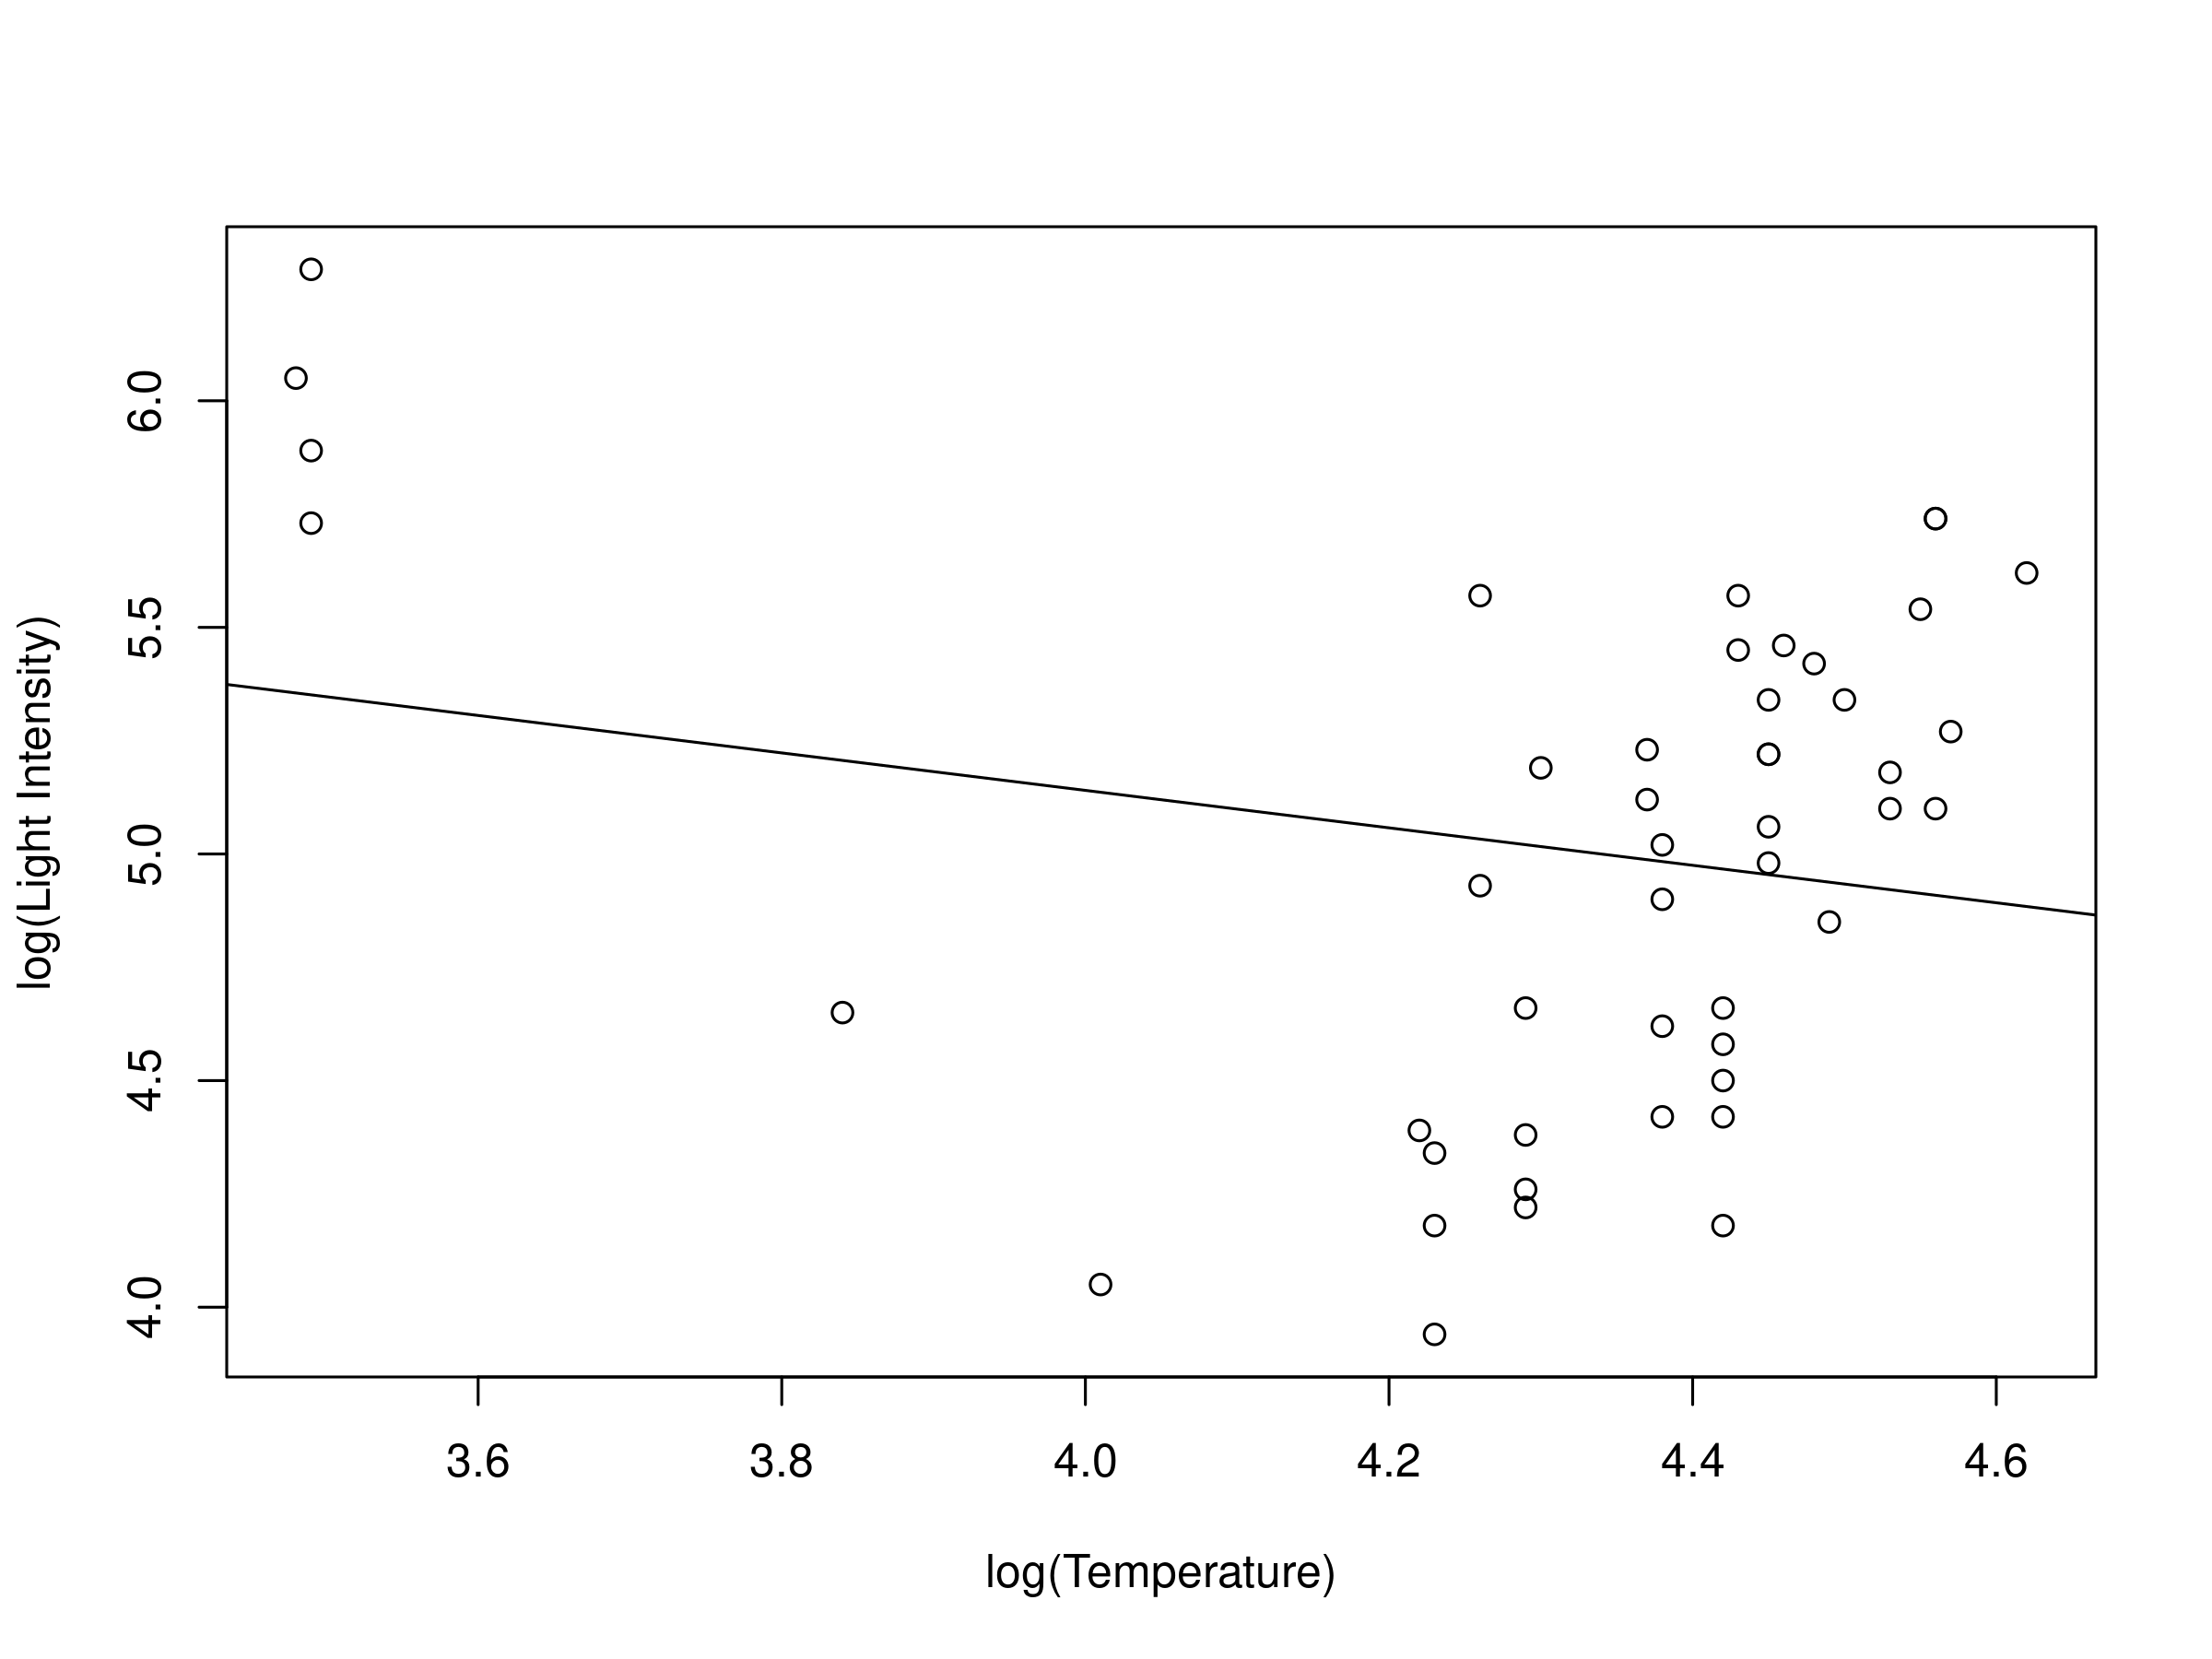

In [27]:
plot(star$temp,star$light,xlab="log(Temperature)",  ylab="log(Light Intensity)")
lmod <- lm(light ~ temp, star)
abline(lmod)

4개의 이상치!

In [28]:
range(rstudent(lmod))  # `rstudent` function computs the studentized residuals distributed as t(n-p)

[1] -2.049393  1.905847

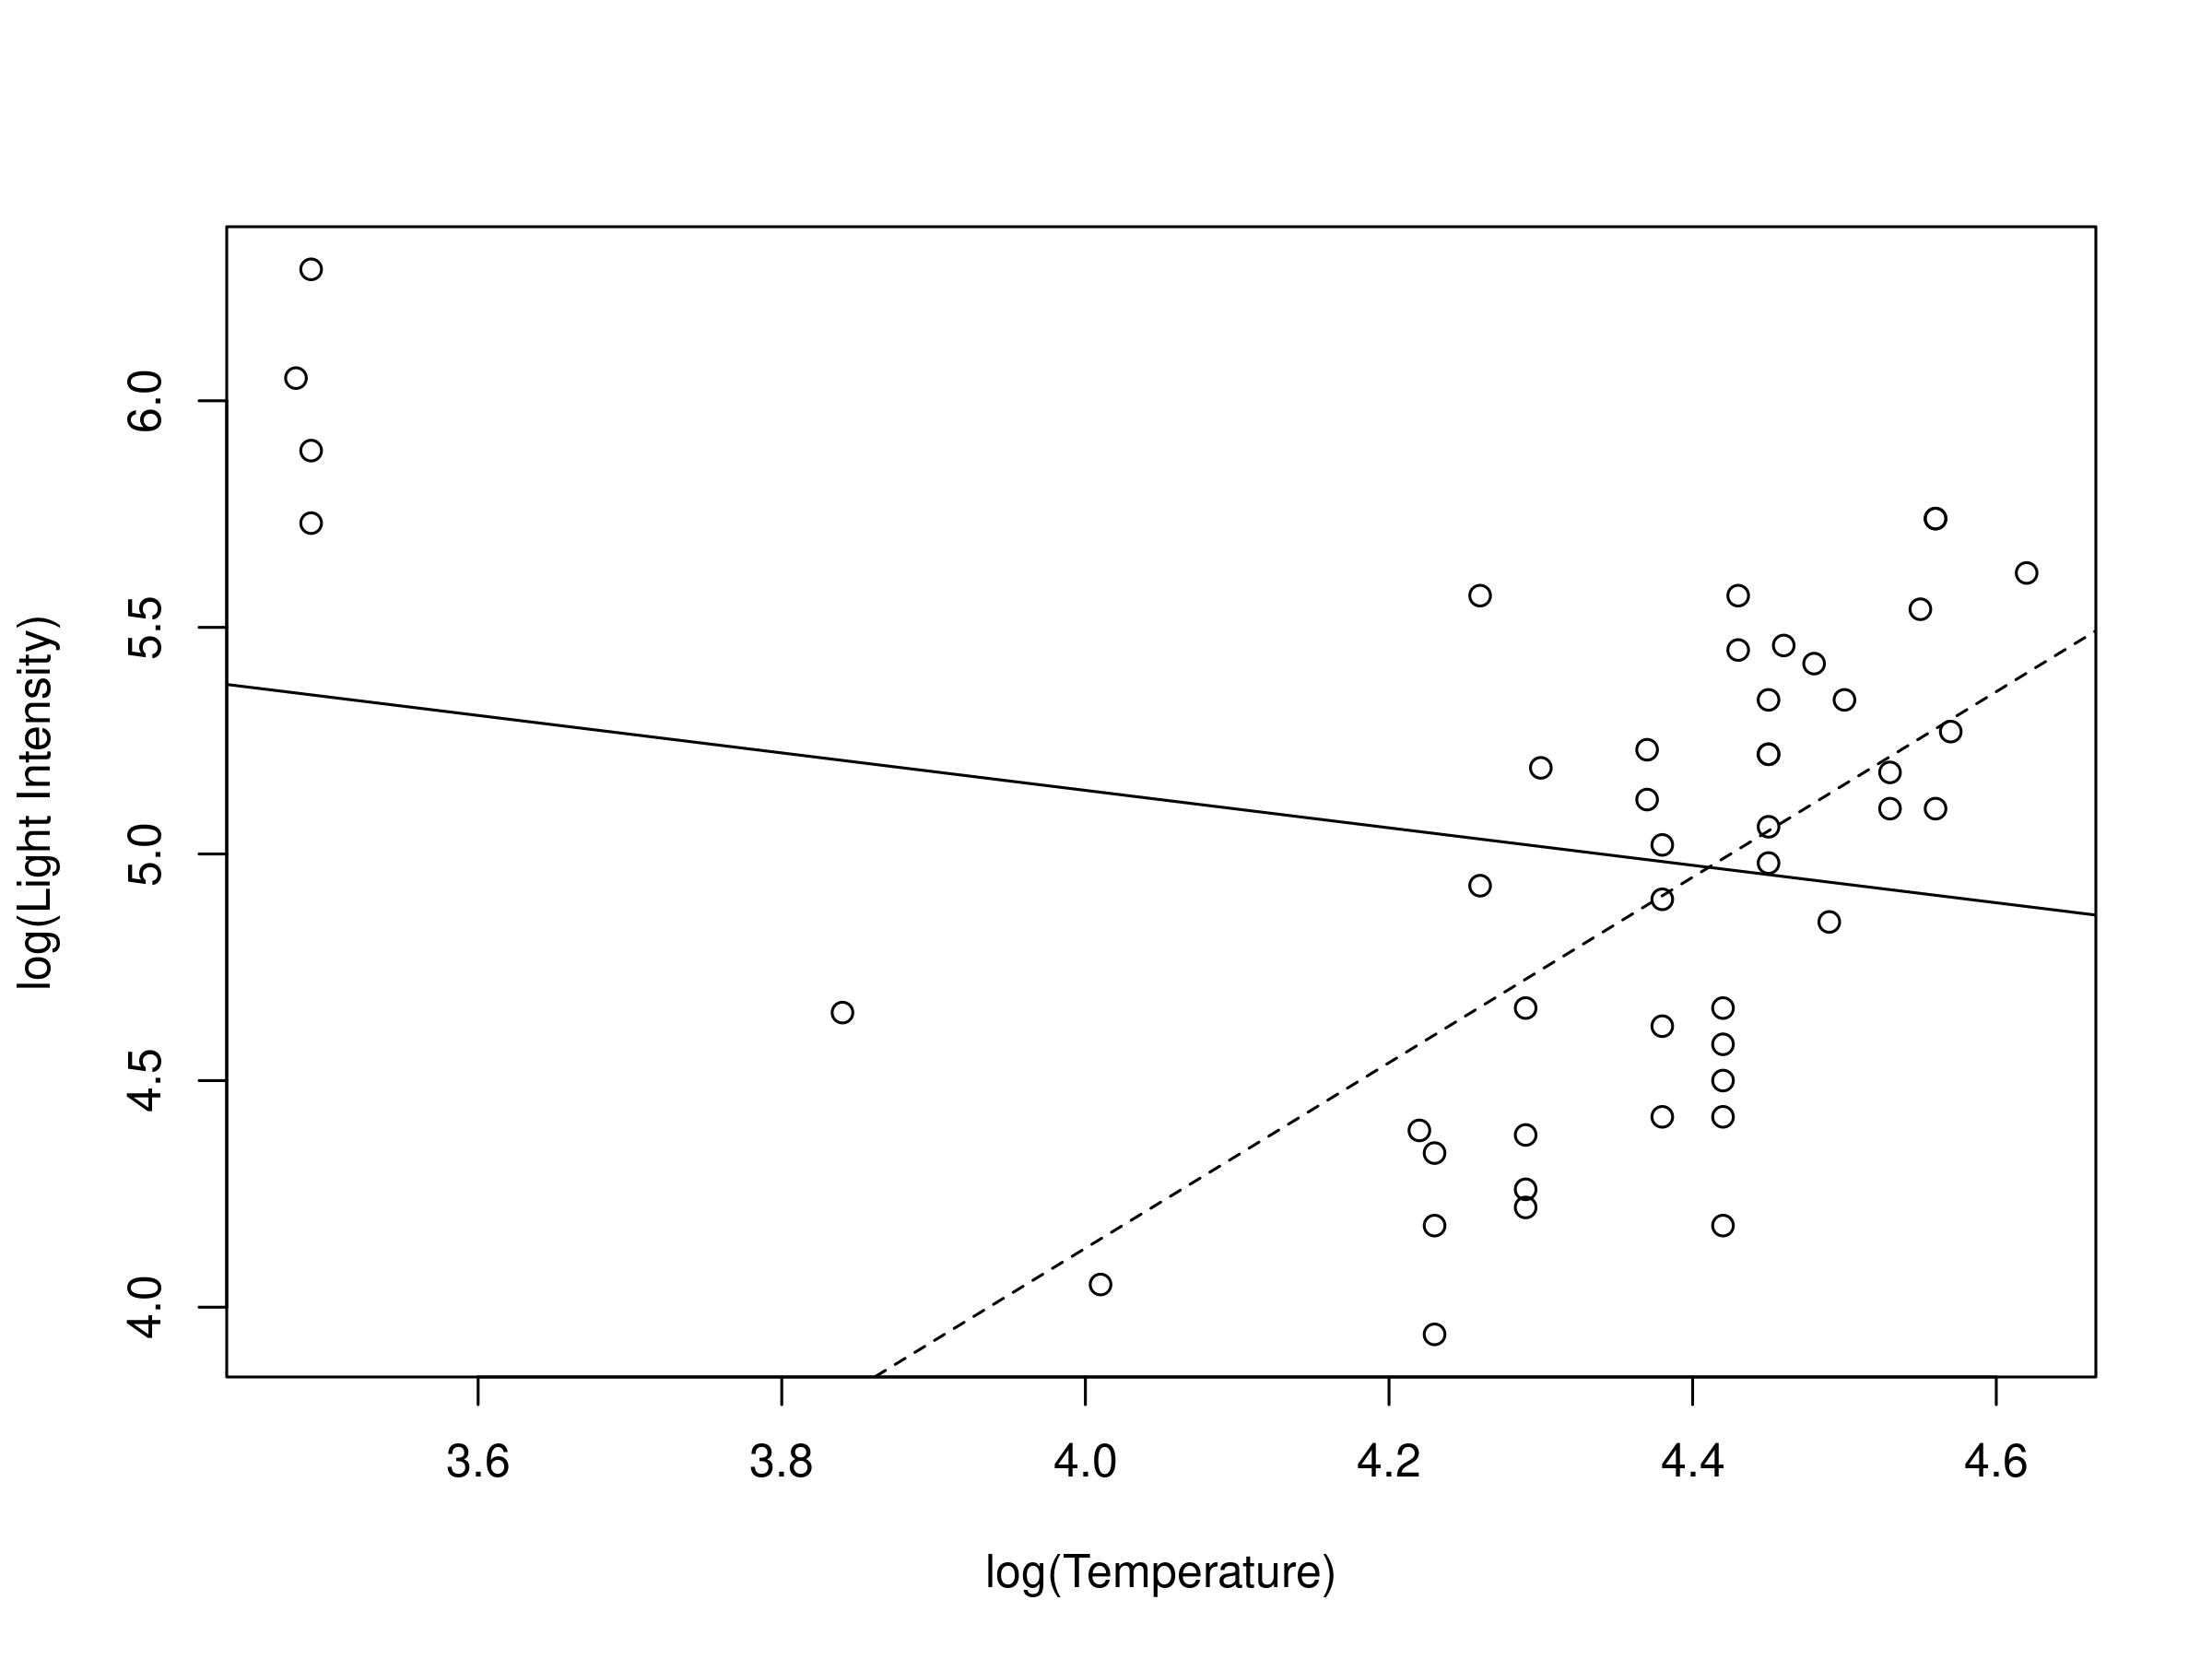

In [29]:
lmodi <- lm(light ~ temp, data=star, subset=(temp>3.6))
plot(star$temp,star$light,xlab="log(Temperature)",  ylab="log(Light Intensity)")
abline(lmod)
abline(lmodi,lty=2)

Big changes!

### Influential points

영향점은 제거여부가 모형의 적합에 큰 변화를 초래하는 것을 말한다. 이상치나 leverage가 영향점이 될 수 있다.

Cook statistics : changes in β with and without ith observation

$$D_i = \frac{1}{K} \epsilon^{2}_{i} \frac{h_i}{1−h_i}$$

$h_i$가 1에 가까우면 $\beta$에 대한 변화가 커진다.
- leverage이지만 영향점일수도, 아닐수도 있다.

$\epsilon$이 커질수록 $\beta$에 대한 변화가 커진다.

*$h_i$가 1에 가깝게 크더라도 $\epsilon$이 굉장히 작으면 영향이 없을 것이다.*

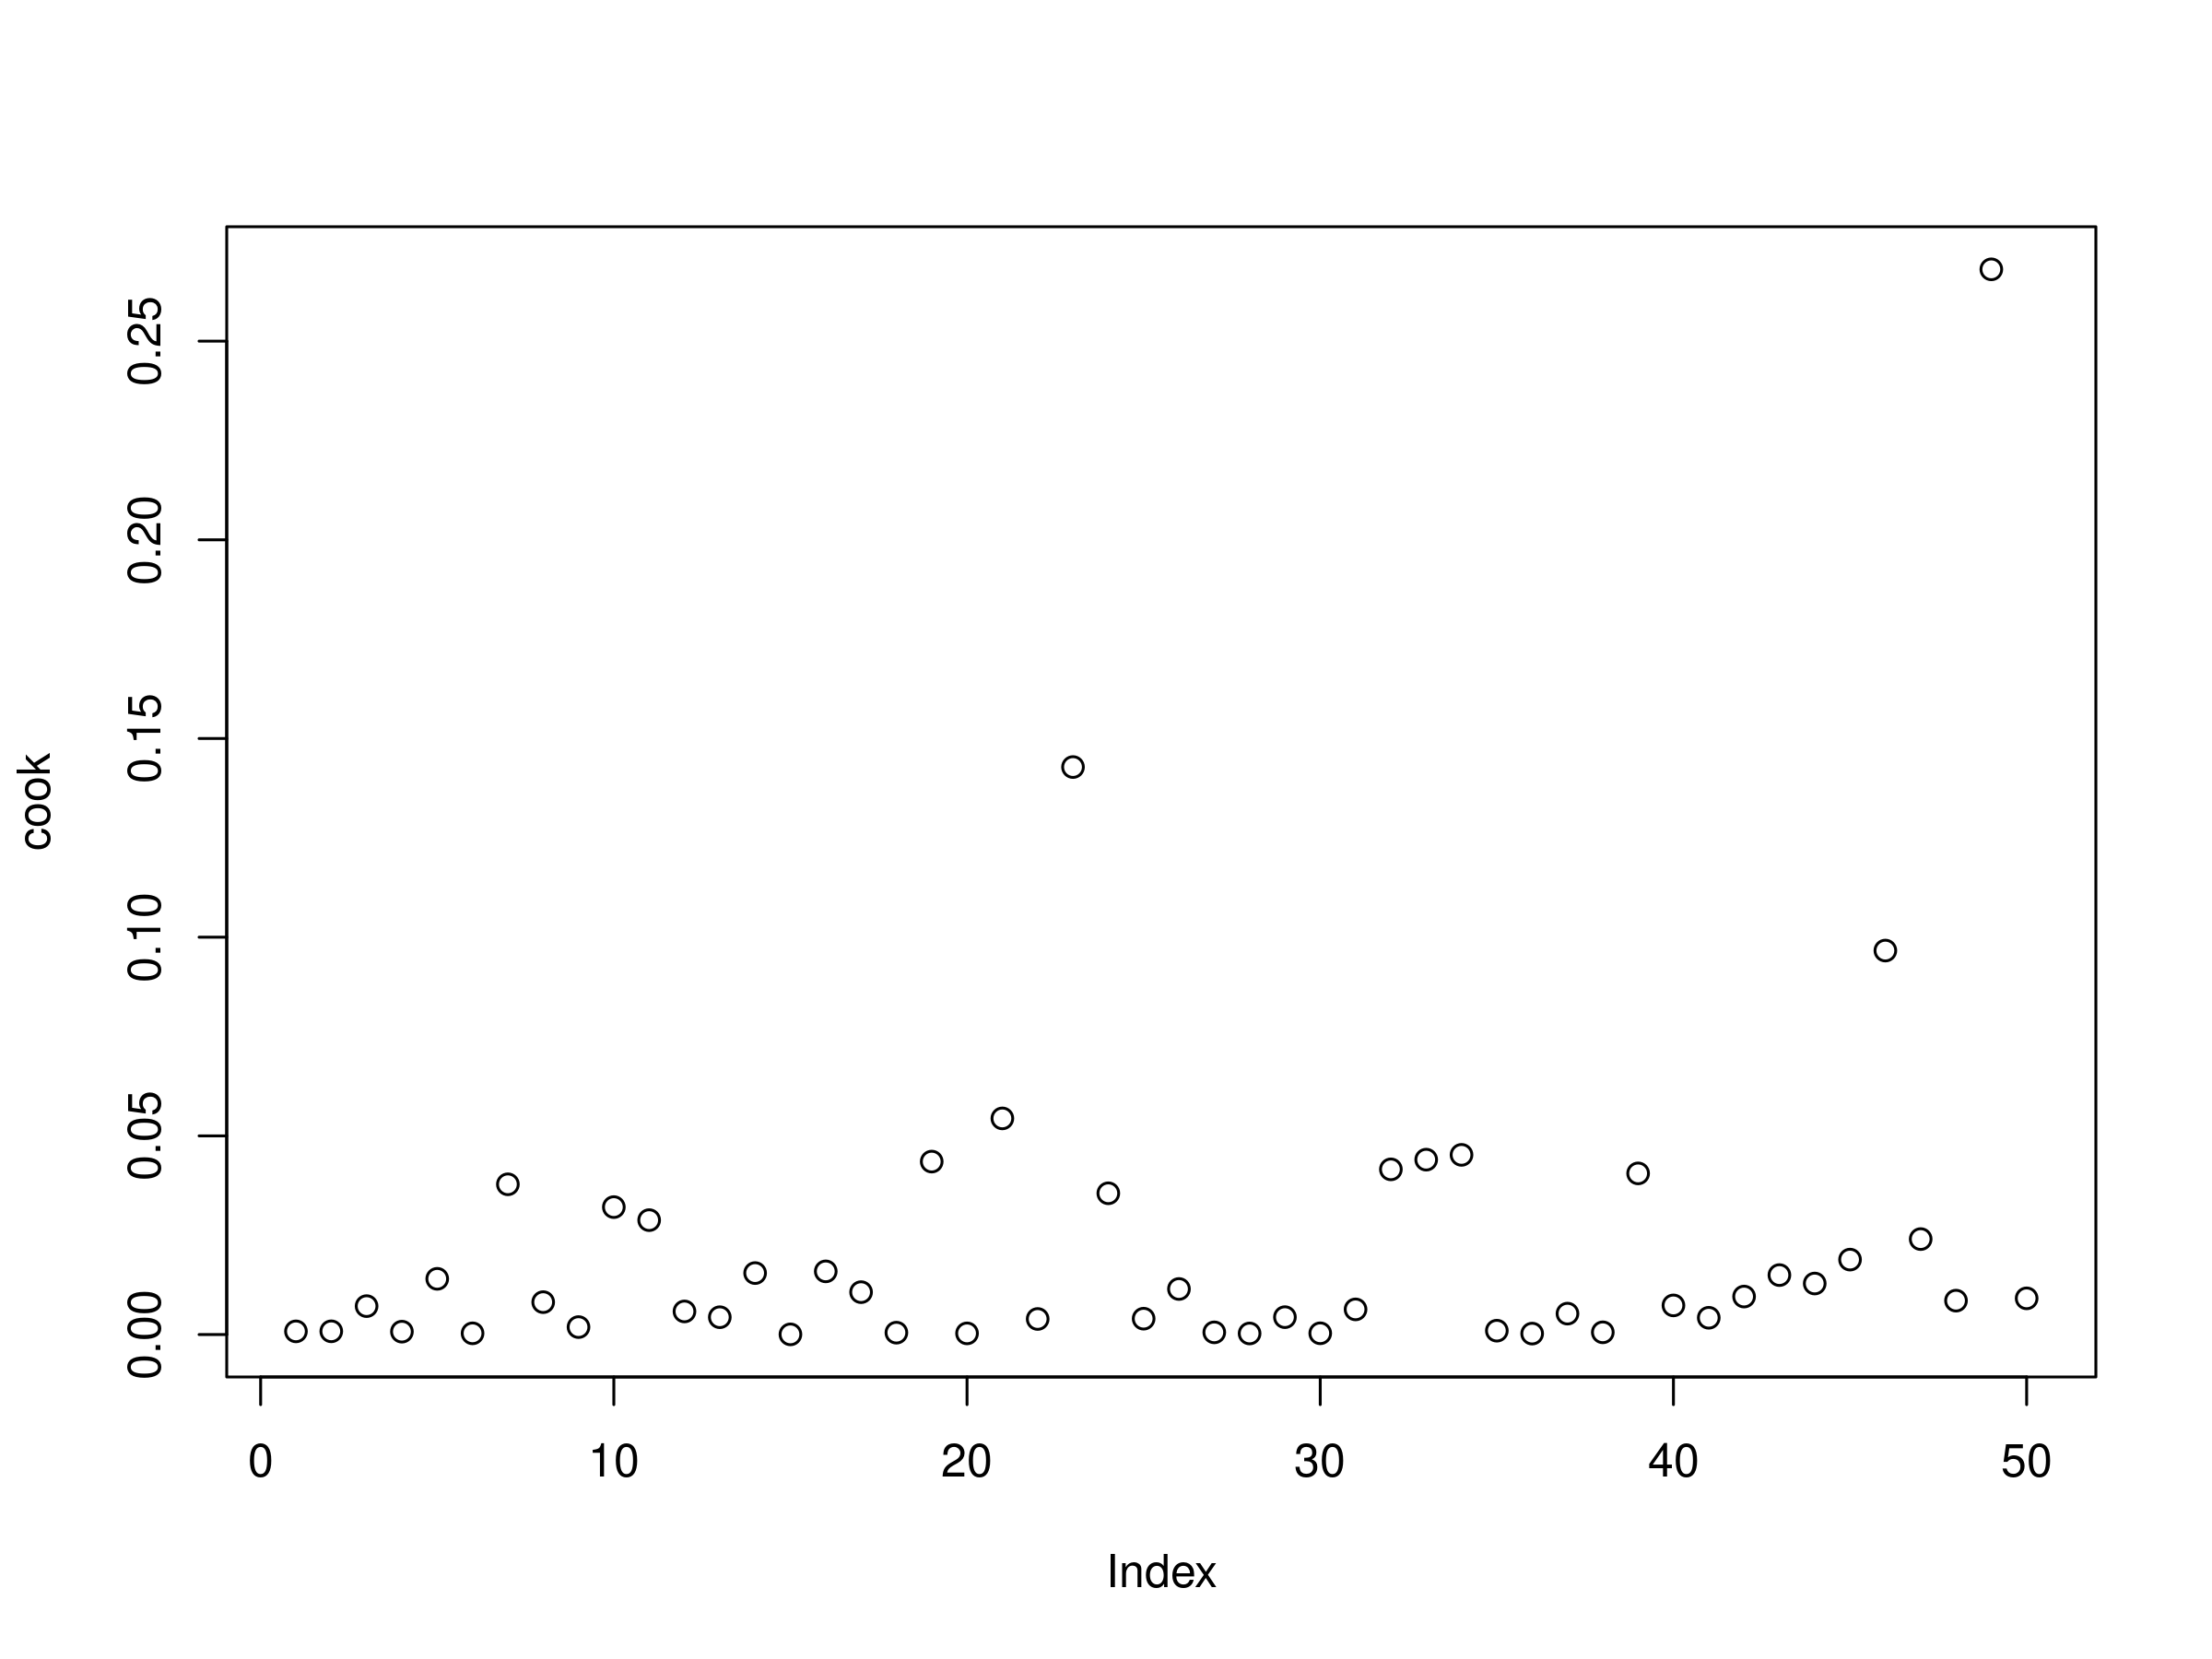

In [30]:
lmod <- lm(sr ~ pop15+pop75+dpi+ddpi,savings)
cook <- cooks.distance(lmod)
plot(cook)

In [31]:
lmodi <- lm(sr ~ pop15+pop75+dpi+ddpi,savings,subset=(cook < max(cook)))
sumary(lmodi) # 50번째쯤에 존재하는 영향치를 제거한 모델

               Estimate  Std. Error t value Pr(>|t|)
(Intercept) 24.52404598  8.22402631  2.9820 0.004655
pop15       -0.39144013  0.15790949 -2.4789 0.017084
pop75       -1.28086692  1.14518206 -1.1185 0.269430
dpi         -0.00031890  0.00092933 -0.3432 0.733119
ddpi         0.61027903  0.26877842  2.2706 0.028122

n = 49, p = 5, Residual SE = 3.79481, R-Squared = 0.36


In [32]:
sumary(lmod) # 원래 모델

               Estimate  Std. Error t value  Pr(>|t|)
(Intercept) 28.56608654  7.35451611  3.8842 0.0003338
pop15       -0.46119315  0.14464222 -3.1885 0.0026030
pop75       -1.69149768  1.08359893 -1.5610 0.1255298
dpi         -0.00033690  0.00093111 -0.3618 0.7191732
ddpi         0.40969493  0.19619713  2.0882 0.0424711

n = 50, p = 5, Residual SE = 3.80267, R-Squared = 0.34


R에서는 기본적인 오차항에 대한 가정 검토를 위한 그림을 제공한다.

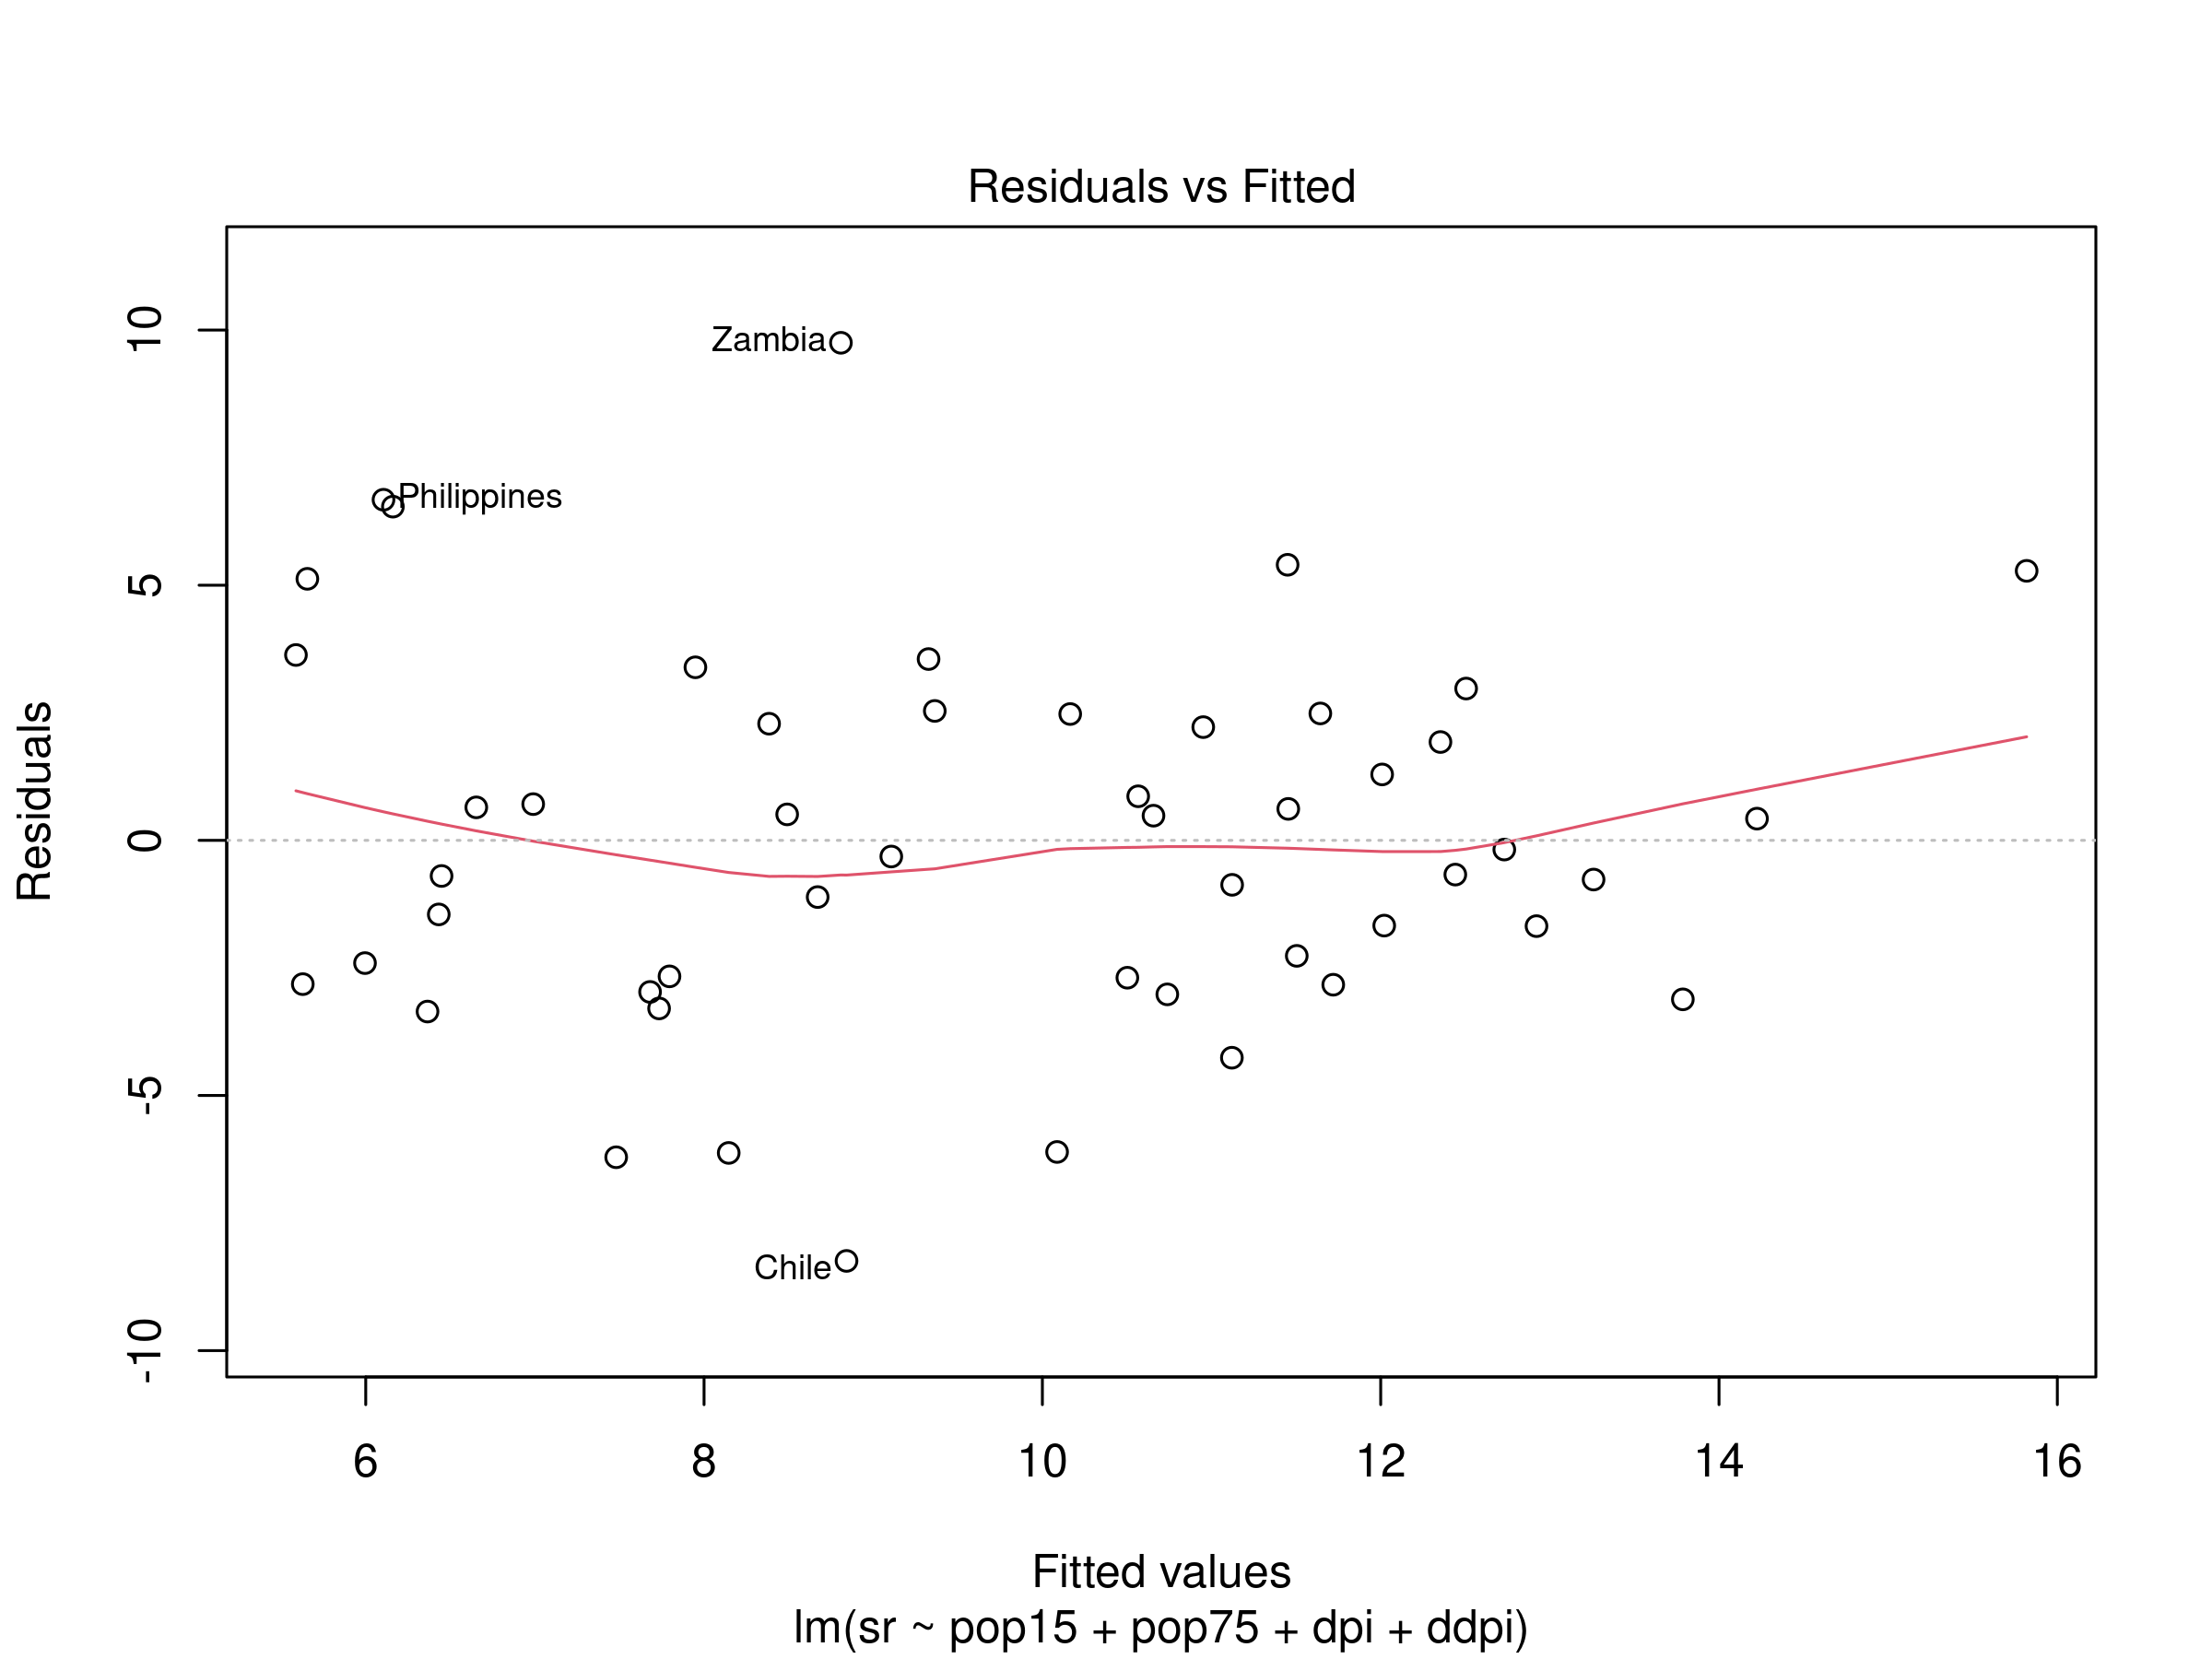

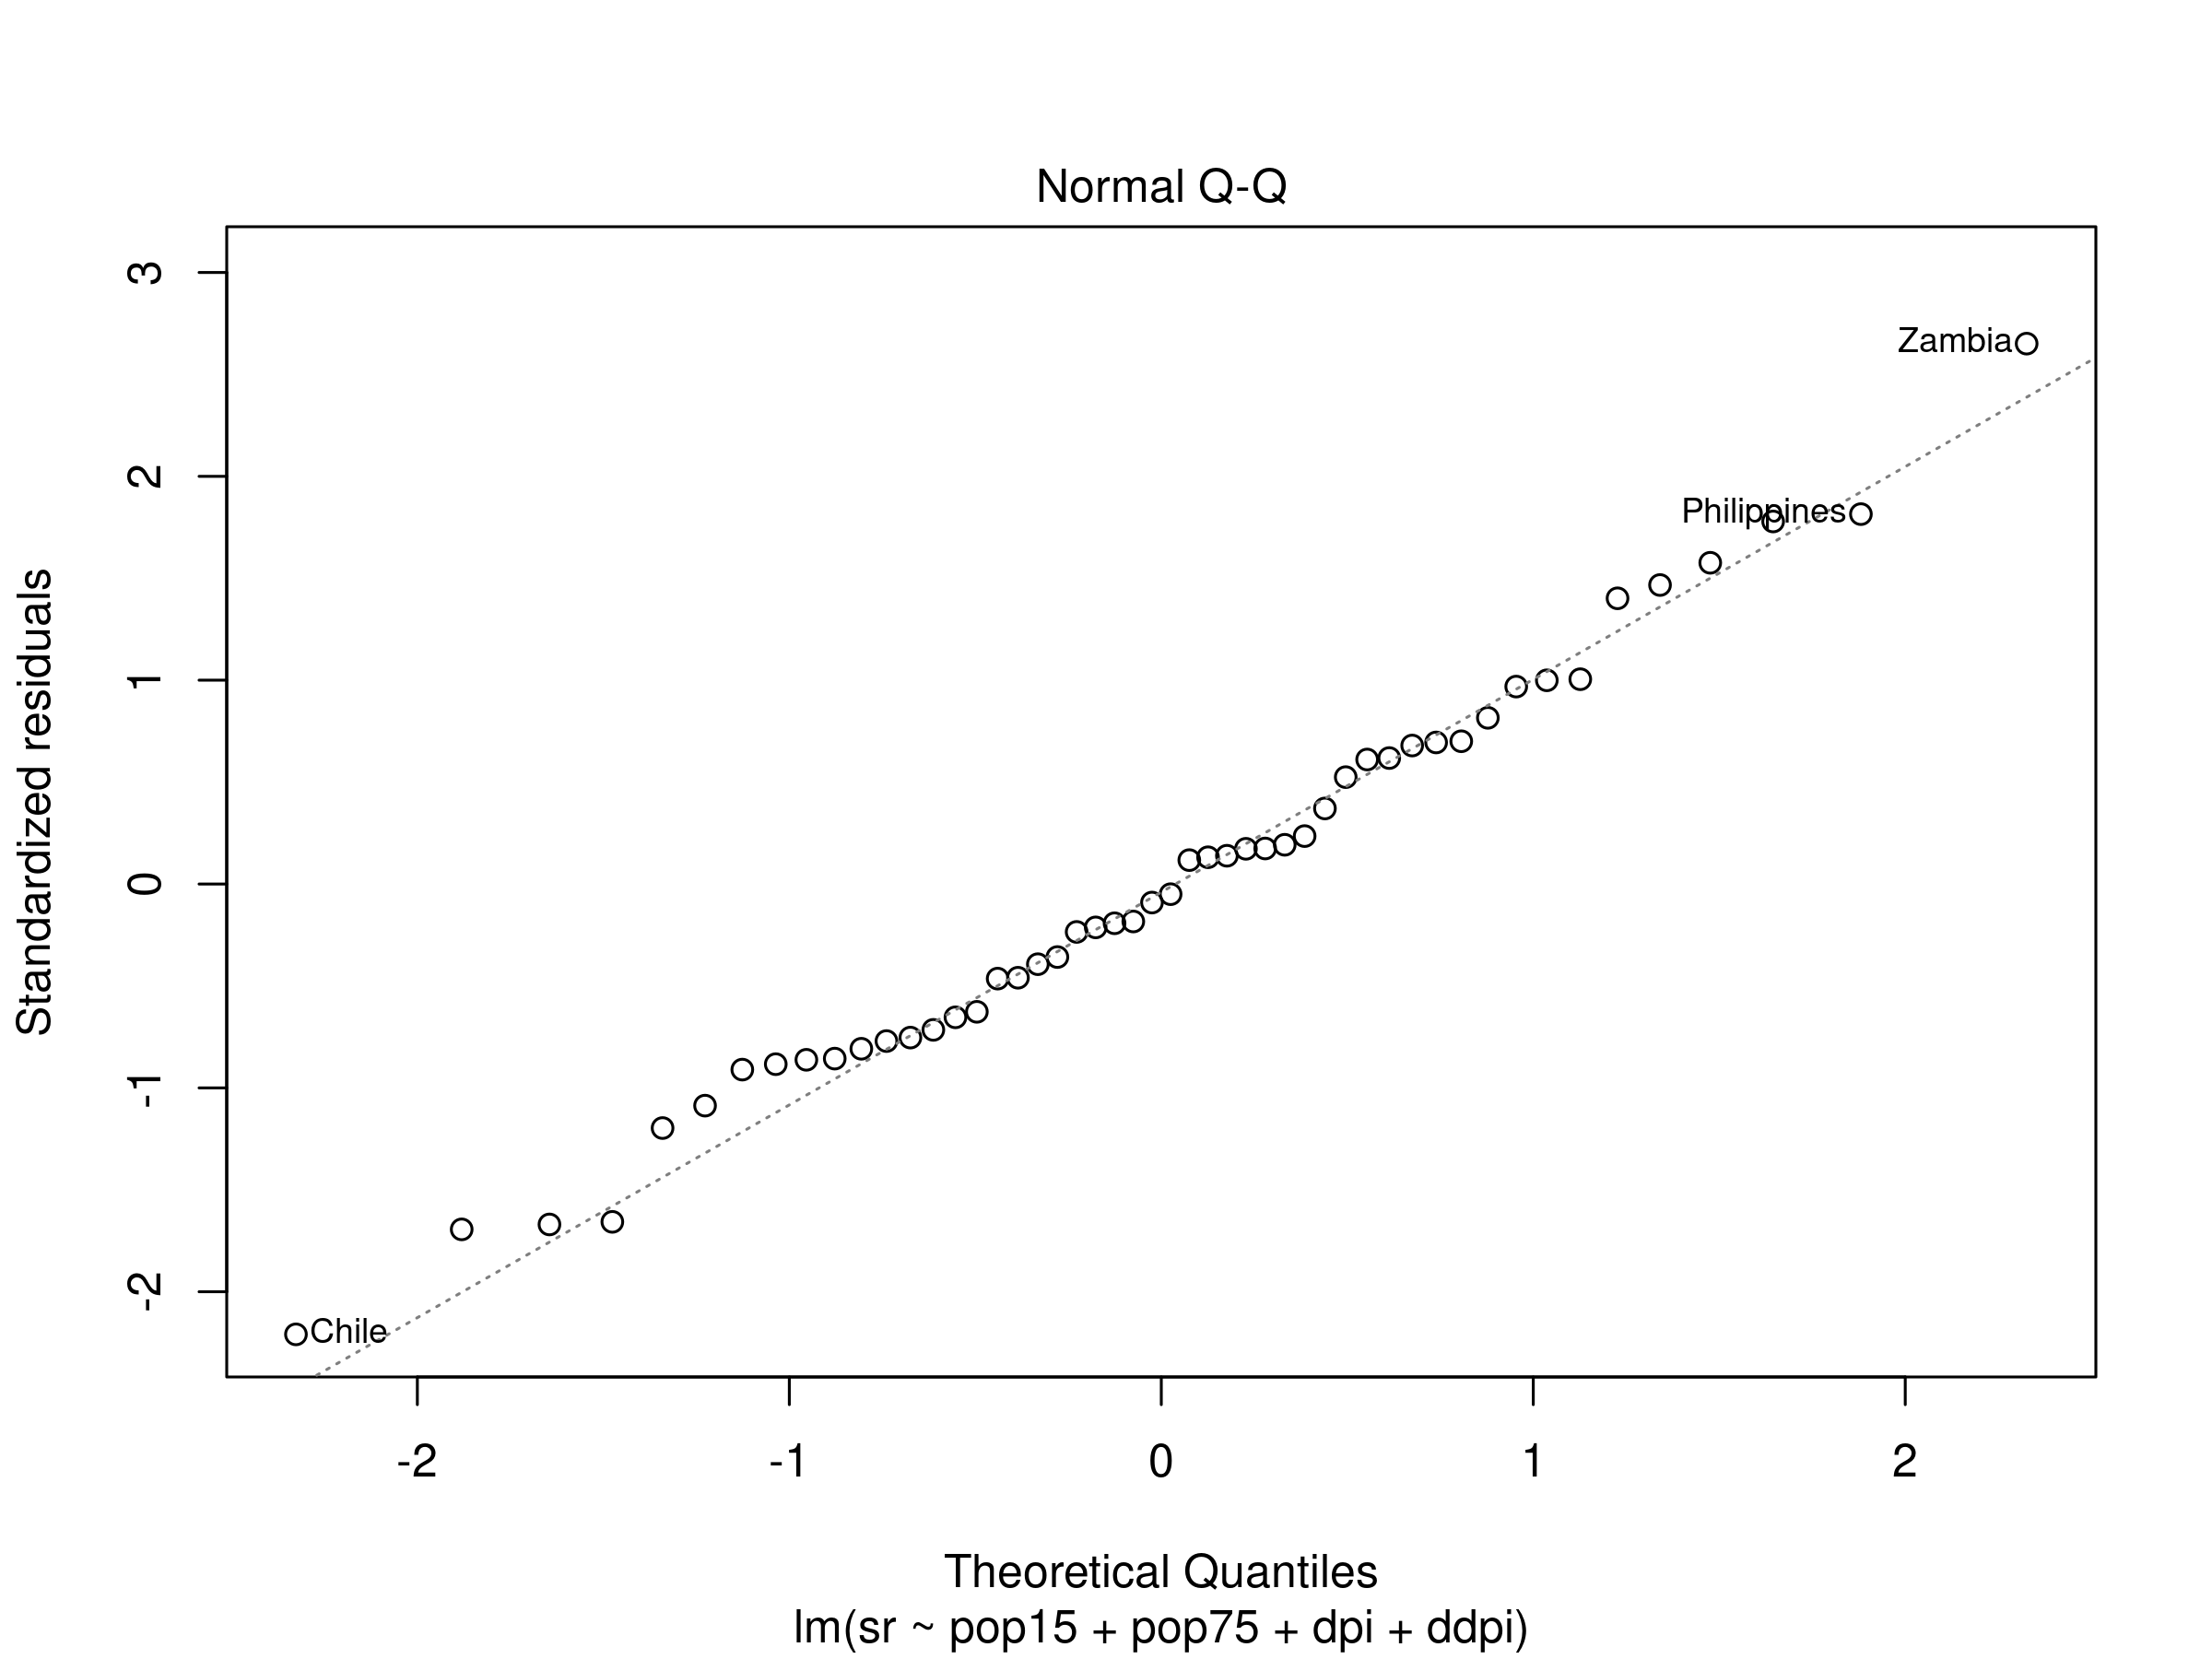

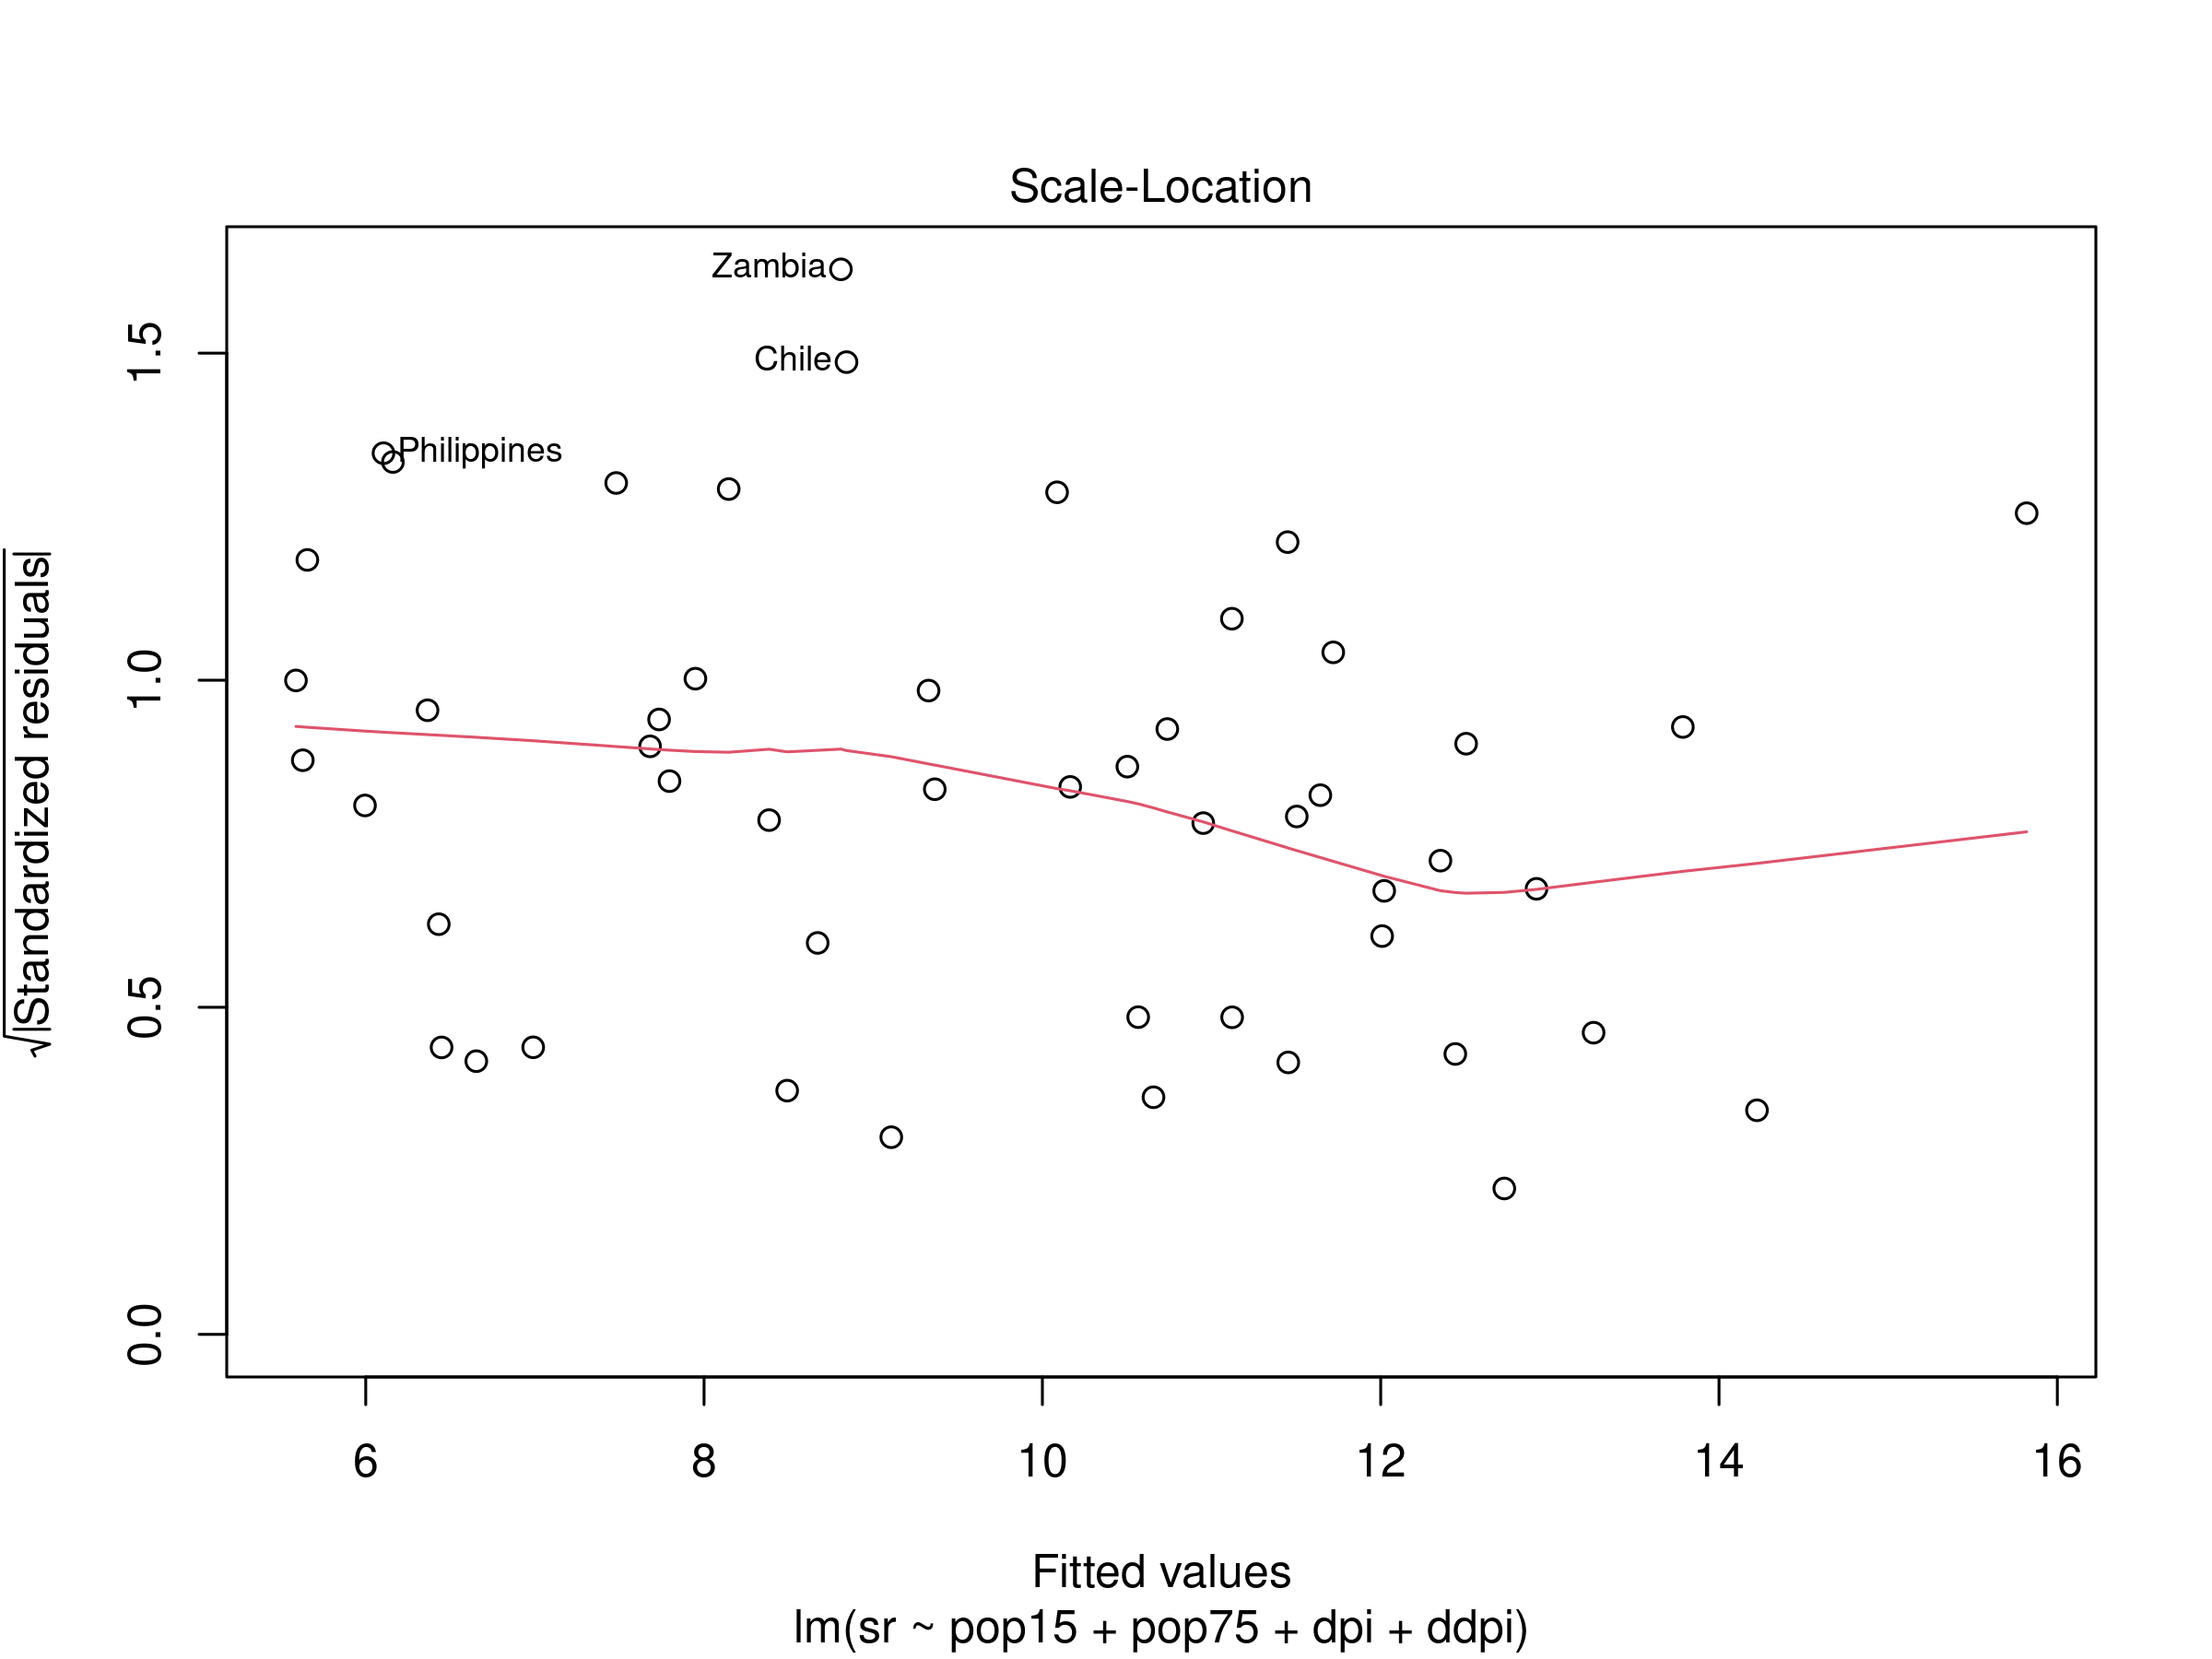

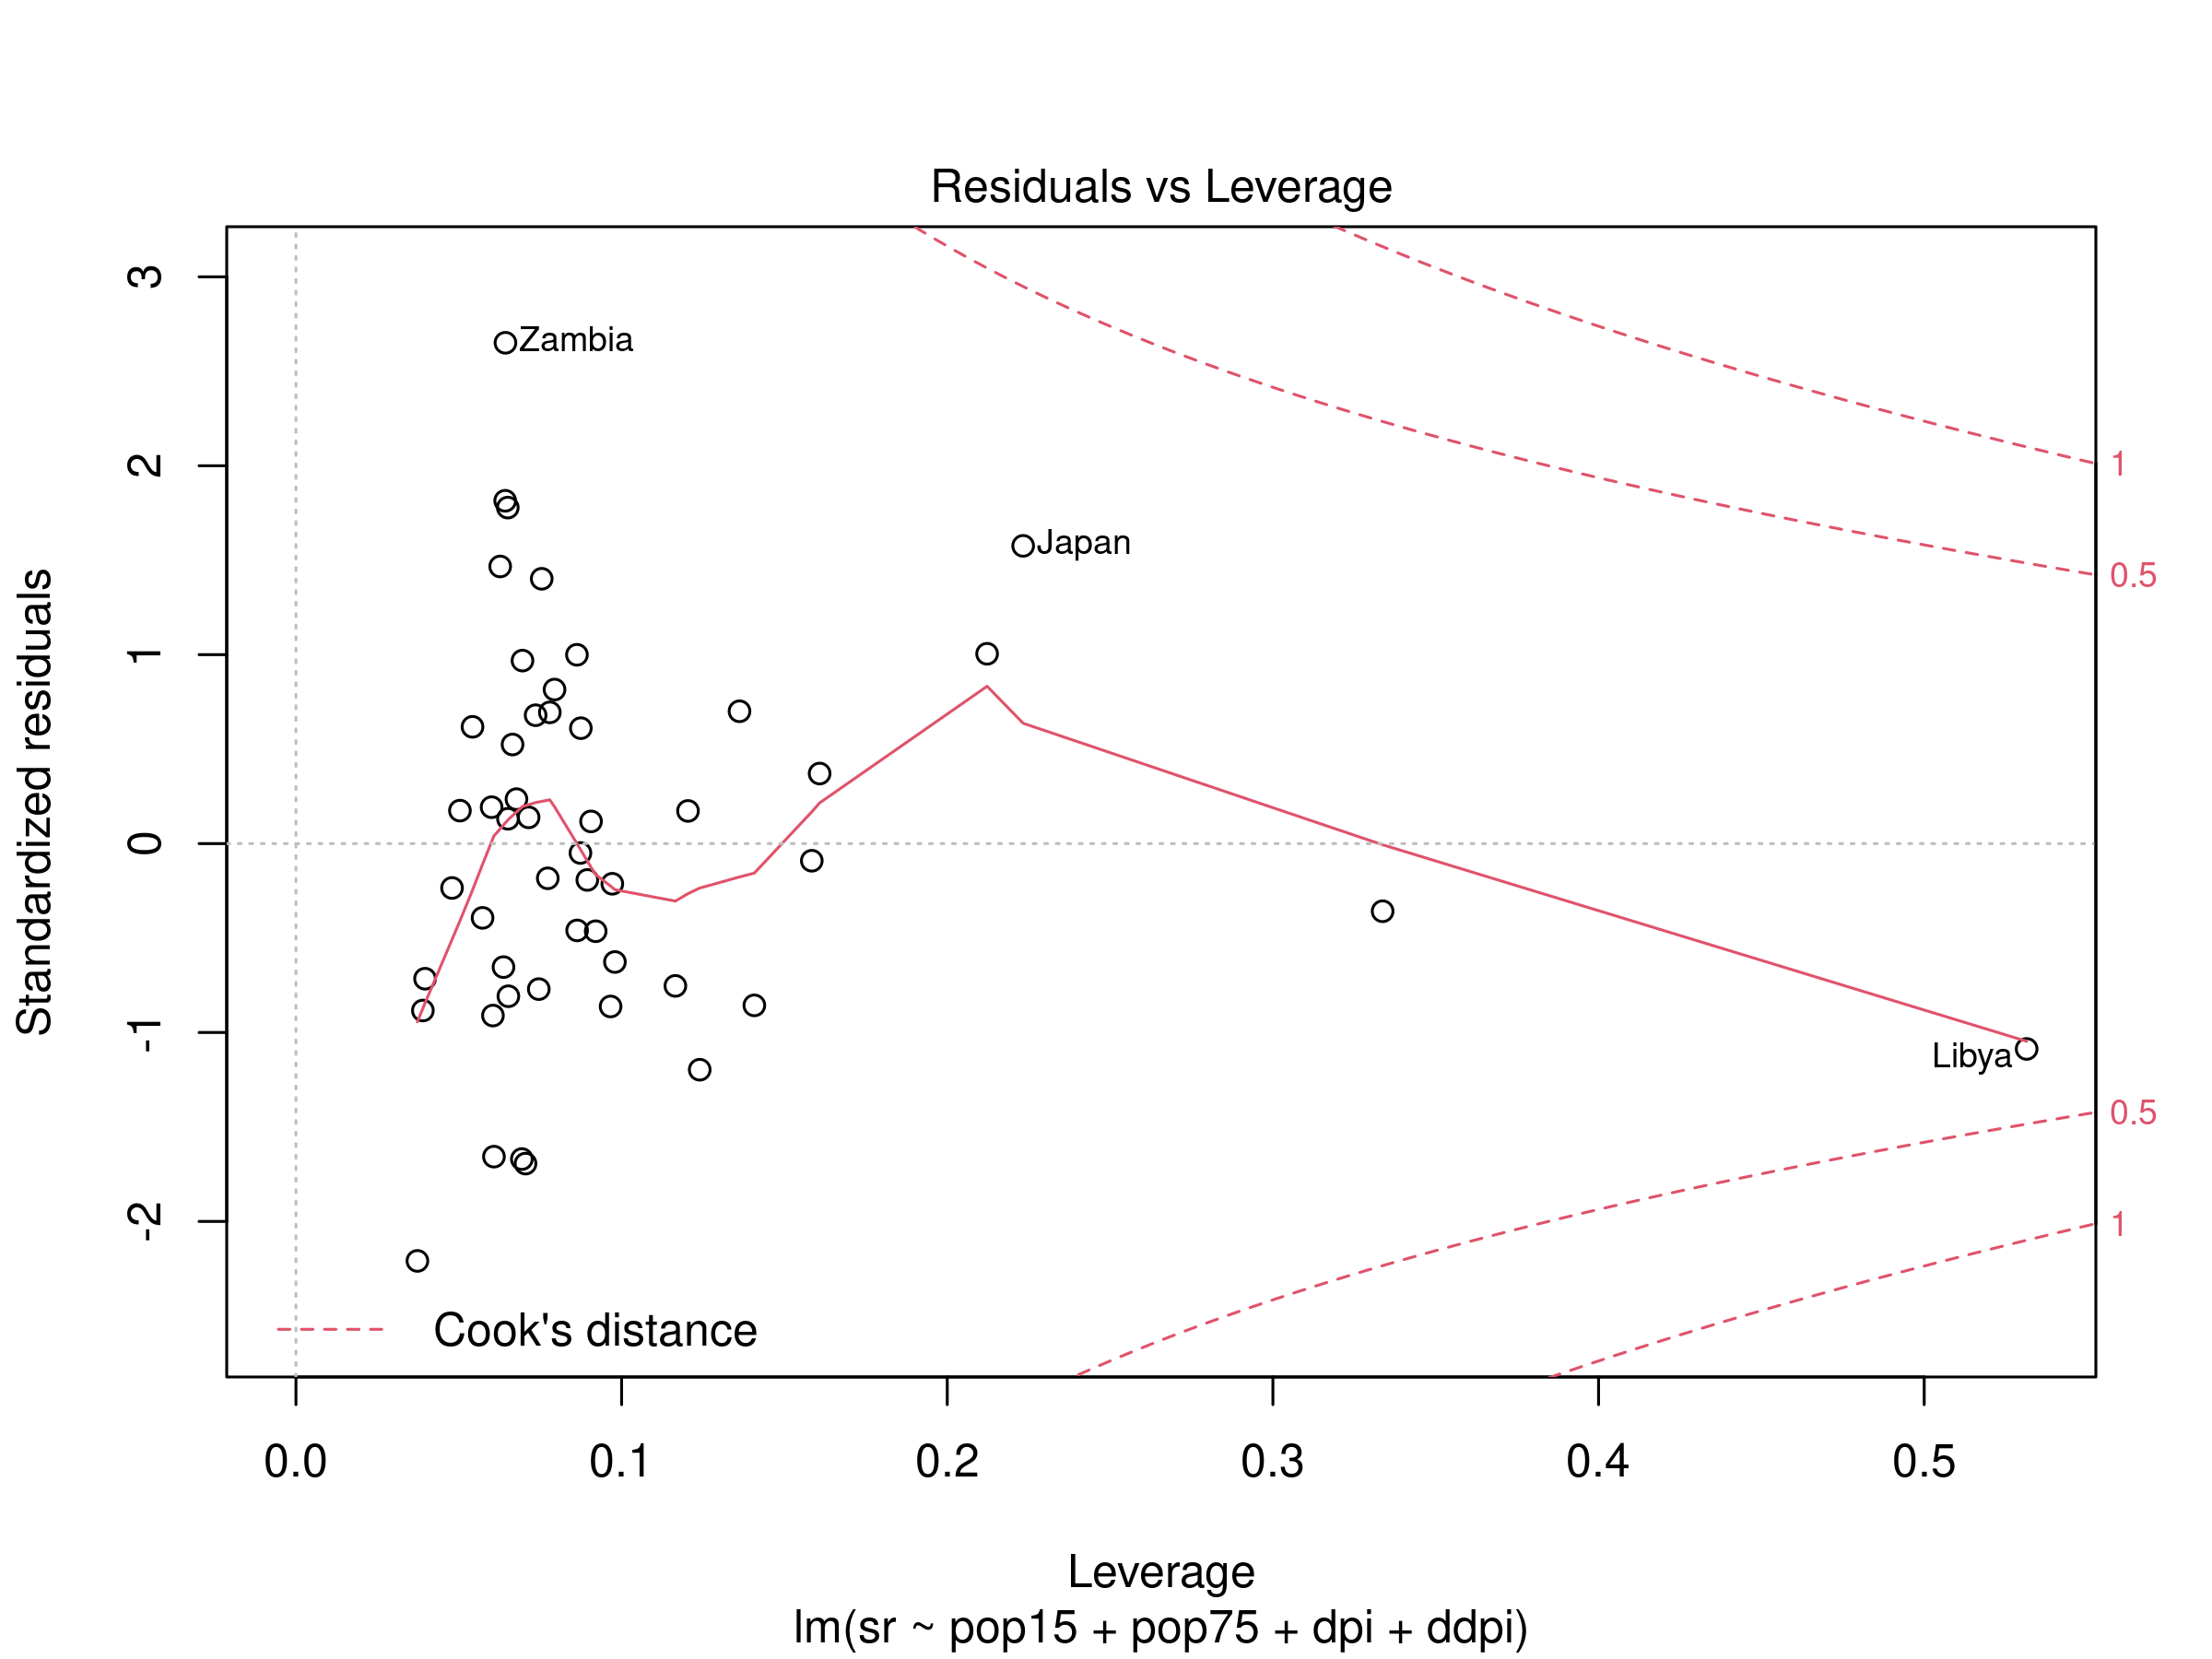

In [33]:
plot(lmod)

1번 그림
- outlier 있지만 등분산에 크게 문제는 없어보인다.

2번 그림
- outlier 의심값들이 존재하지만, 직선에 거의 근접한 모습이다.

3번 그림
- pass..

4번 그림
- Libya 가 가장 큰 통계량을 가지고 있지만 아주 심한 영향은 아니다.
    - cook 통계량은 1이 넘어가면 문제 발생!

---

### checking the structure of the model (선형성가정)

잔차는 선형성을 제외한 다른 체계적인 요소가 남아있는지를 판단할 수 있는 근거가 된다.

## Multicollinearity (다중공선성)

만약 특정 예측변수(설명변수)가 다른 변수들의 선형결합으로 표현되면 $X^\top X$의 역행렬이 존재하지 않아 최소제곱추정량이 정의되지 않는다.

완전히 표현되지 않더라도 $X^\top X$가 singular에 가까울 수 있다. 기 경우 추정량은 정의되지만 분산이 매우 커지는 결과를 초래한다. 보통 변수들간에 상관성이 존재할 때 이런 일이 발행하지만 변수의 개수가 많아지면 거의 필연적으로 이런 현상이 나타남이 알려져 있다.

분산의 증가는 부정확한 추정을 의미할 뿐 아니라 계수에 대한 검정의 검정력을 떨어뜨리게 된다.

이러한 다중공선성은 $X^\top X$의 고유치(eigenvalue)로부터 확인이 가능하다. 고유치가 0인 것이 있으면 exact collinearity를 나타내고 0에 가까운 것이 있으면 다중공선성이 어느 정도 존재하는 것으로 볼 수 있다. 다음과 같은 condition number로 기준을 삼기도 하는데 10 혹은 30이 넘으면 주의를 요하는 것으로 판단한다.



$$\kappa = \sqrt{ \frac{\lambda_{min}} {\lambda_{max}} } $$

다음 식을 살펴보자.

수업 후 작성 예정~

6. 모분포 $N(0,25)$로부터 랜덤표본 $X_1,X_2, \dots, X_5$를 얻었다고 할 때,

(1) $P(\bar{X}_5<c) = 0.90$을 만족하는 상수 $c$ 값을 구하라.

(2) $P(\frac{1}{5}\sum^{5}_{i=1} X^{2}_{i} <c) = 0.90$을 만족하는 상수 $c$ 값을 구하라.

7. $X_1,X_2, \dots, X_n$ 이 $N(\mu, \sigma^2)$로부터 구한 랜덤표본이라고 하자.

이때 $\sum^{n}_{i=1}(X_i - \bar{X}_n^2)/n$ 의 분산을 구하라.

12. $X_1, X_2, \dots, X_{10}$이 $N(\mu, 25)$ 으로부터 구한 랜덤표본이라고 하자. 

이때 $P(4<\sum^{10}_{i=1} (X_i - \bar{X}_{10} )^2 /10 <14 )$

13. $X_1,X_2 \dots, X_{16}$이 $N(5,25)$ 으로부터 구한 랜덤표본이라고 하자.

이때 $P(0<\bar{X}_{16}<6, 20< \sum^{16}_{i=1} (X_i - \bar{X}_{16})^2 /16 <30)$을 계산하라.

14. $X_1, X_2, \dots, X_{16}$과 $Y_1,Y_2,\dots,Y_{25}$이 각각 $N(0,9)$와 $N(2,16)$으로부터 구한 서로 독립인 랜덤표본이라고 하자. 이때

(1) $\bar{X}_{16} - \bar{Y}_{25}$ 의 분포를 구하라.

(2) $P(\bar{X}_{16} - \bar{Y}_{25} > 0)$ 를 계산하라.

17. 모분포 $N(0,1)$ 로부터 랜덤표본 $X_1, X_2,\dots , X_{50}$을 얻었다고 할 때,

(1) $P(X_1 - X_2 < 2)$ 을 계산하라.

(2) $P(X_1 + X_2 < 2)$ 을 계산하라.

(3) $P(X^{2}_{1} + \dots + X^{2}_{50} < 60))$ 을 계산하라.

(4) $P(40 < X^{2}_{1} + \dots + X^{2}_{50} < 60)$ 을 계산하라.

(5) $P(X^{2}_{1} + \dots + X^{2}_{50} < 50 + c) = 0.9$ 를 만족하는 상수 $c$ 를 구하라.